In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
features = pd.read_csv('/content/drive/MyDrive/학교/Dissertation/Features/all_features.csv')
features

title  page_id  char_count  word_count  \
0                      Mayan languages   182013       37370        6527   
1                           Mu'awiya I   207068       67665       12267   
2                     The Fountainhead   180464       36772        6647   
3                     Northern pintail   218361       13230        2453   
4                    Manhattan Project    19603      101197       18039   
...                                ...      ...         ...         ...   
5195     Party of Democratic Kampuchea   265468        1927         323   
5196             Minawara and Multultu    95240         421          83   
5197  Theophylline/ephedra/hydroxyzine   262652         282          54   
5198            Channel Lake, Illinois   111450        2336         499   
5199                  Politics of Guam    12151        3271         550   

      sentence_count  syllable_count  complex_word_count  section_count  \
0                181            9294                 957             12   
1                338           16816                1571             14   
2                243            9321                 924             11   
3                 66            3181                 226              8   
4                582           26102                2908             25   
...              ...             ...                 ...            ...   
5195               8             515                  65              2   
5196               4             101                   6              1   
5197               3              66                   4              1   
5198              15             571                  37              3   
5199              17             905                 123              7   

      subsection_count  paragraph_count  ...  num_edits  num_editors  \
0                   25               81  ...       2533          832   
1                   17               75  ...       3947         1377   
2                   21               54  ...       2318         1104   
3                    2               27  ...        763          376   
4                   31              148  ...       6417         2647   
...                ...              ...  ...        ...          ...   
5195                 0                7  ...         89           53   
5196                 0                1  ...         34           29   
5197                 0                1  ...         45           34   
5198                 2                7  ...         72           47   
5199                 3                9  ...        151           99   

      num_registered_editors  num_anonymous_editors  num_occasional_editors  \
0                        466                    366                     719   
1                        657                    720                    1136   
2                        486                    618                     971   
3                        282                     94                     334   
4                       1281                   1366                    2296   
...                      ...                    ...                     ...   
5195                      41                     12                      46   
5196                      27                      2                      29   
5197                      30                      4                      32   
5198                      44                      3                      42   
5199                      68                     31                      86   

      edit_per_day  edit_per_editor  revert_count  discussion_count  quality  
0         0.324452         3.044471           415               472        1  
1         0.509159         2.866376           721               970        1  
2         0.296761         2.099638           228               218        1  
3         0.098706         2.029255            86                54        1  
4         0.766850    

In [10]:
features['quality'].value_counts()

quality
1    2600
0    2600
Name: count, dtype: int64

In [15]:
df_length = features.iloc[:, list(range(2, 7)) + [-1]]
df_structure = features.iloc[:, list(range(7, 24)) + [-1]]
df_style = features.iloc[:, list(range(24, 31)) + [-1]]
df_readability = features.iloc[:, list(range(31, 38)) + [-1]]
df_edit = features.iloc[:, 38:]

### Distribution

__length features__

In [16]:
df_length

char_count  word_count  sentence_count  syllable_count  \
0          37370        6527             181            9294   
1          67665       12267             338           16816   
2          36772        6647             243            9321   
3          13230        2453              66            3181   
4         101197       18039             582           26102   
...          ...         ...             ...             ...   
5195        1927         323               8             515   
5196         421          83               4             101   
5197         282          54               3              66   
5198        2336         499              15             571   
5199        3271         550              17             905   

      complex_word_count  quality  
0                    957        1  
1                   1571        1  
2                    924        1  
3                    226        1  
4                   2908        1  
...                  ...      ...  
5195                  65        0  
5196                   6        0  
5197                   4        0  
5198                  37        0  
5199                 123        0  

[5200 rows x 6 columns]

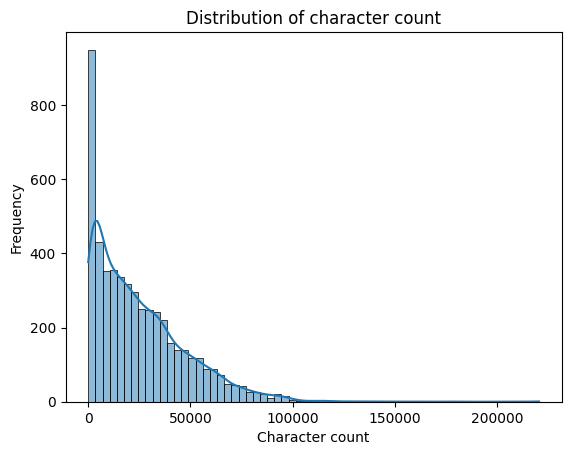

In [19]:
# Character count
sns.histplot(df_length['char_count'], kde=True)

plt.title('Distribution of character count')
plt.xlabel('Character count')
plt.ylabel('Frequency')
plt.show()

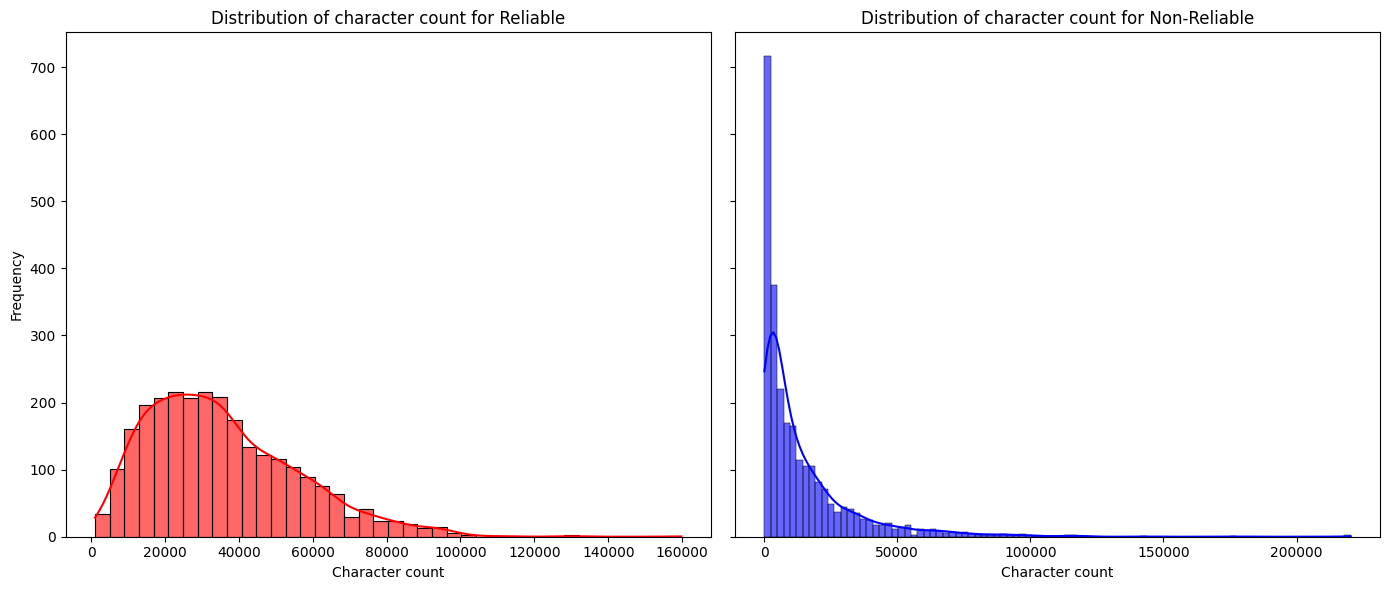

In [26]:
# Character count: Reliable vs. Non-Reliable
reliable = df_length[df_length['quality'] == 1]
non_reliable = df_length[df_length['quality'] == 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(reliable['char_count'], kde=True, color='red', ax=axs[0], alpha=0.6)
axs[0].set_title('Distribution of character count for Reliable')
axs[0].set_xlabel('Character count')
axs[0].set_ylabel('Frequency')

sns.histplot(non_reliable['char_count'], kde=True, color='blue', ax=axs[1], alpha=0.6)
axs[1].set_title('Distribution of character count for Non-Reliable')
axs[1].set_xlabel('Character count')

plt.tight_layout()
plt.show()

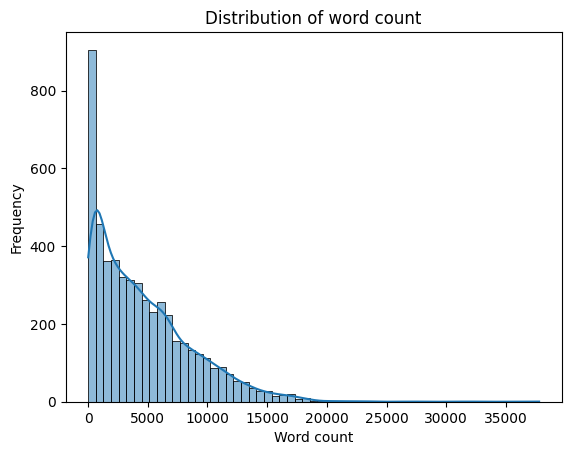

In [27]:
# Word count
sns.histplot(df_length['word_count'], kde=True)

plt.title('Distribution of word count')
plt.xlabel('Word count')
plt.ylabel('Frequency')
plt.show()

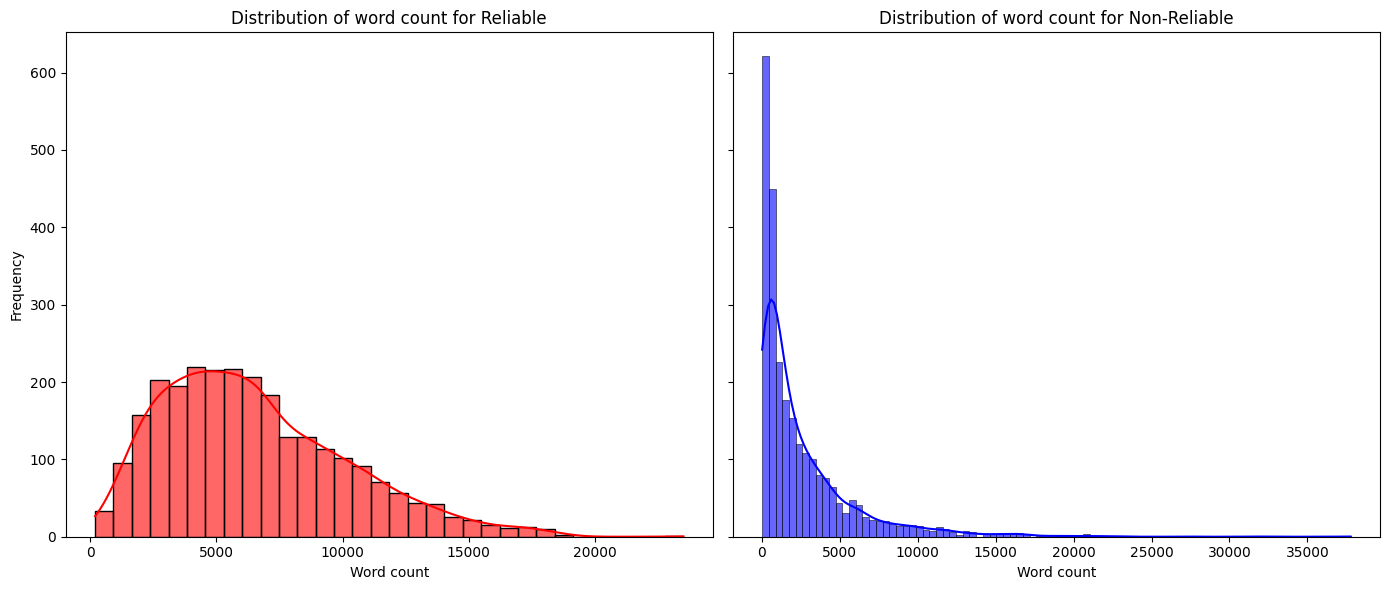

In [28]:
# Word count: Reliable vs. Non-Reliable
reliable = df_length[df_length['quality'] == 1]
non_reliable = df_length[df_length['quality'] == 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(reliable['word_count'], kde=True, color='red', ax=axs[0], alpha=0.6)
axs[0].set_title('Distribution of word count for Reliable')
axs[0].set_xlabel('Word count')
axs[0].set_ylabel('Frequency')

sns.histplot(non_reliable['word_count'], kde=True, color='blue', ax=axs[1], alpha=0.6)
axs[1].set_title('Distribution of word count for Non-Reliable')
axs[1].set_xlabel('Word count')

plt.tight_layout()
plt.show()

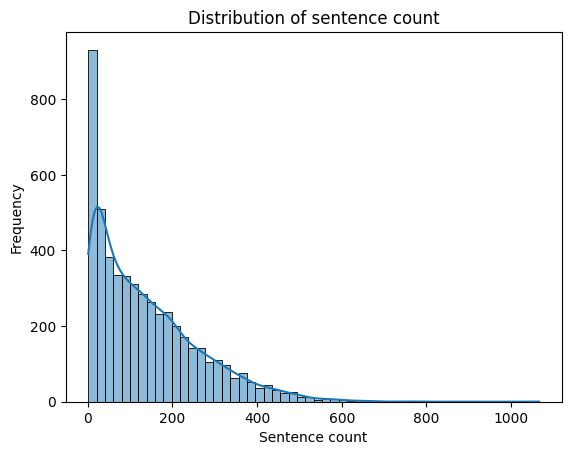

In [29]:
# Sentence count
sns.histplot(df_length['sentence_count'], kde=True)

plt.title('Distribution of sentence count')
plt.xlabel('Sentence count')
plt.ylabel('Frequency')
plt.show()

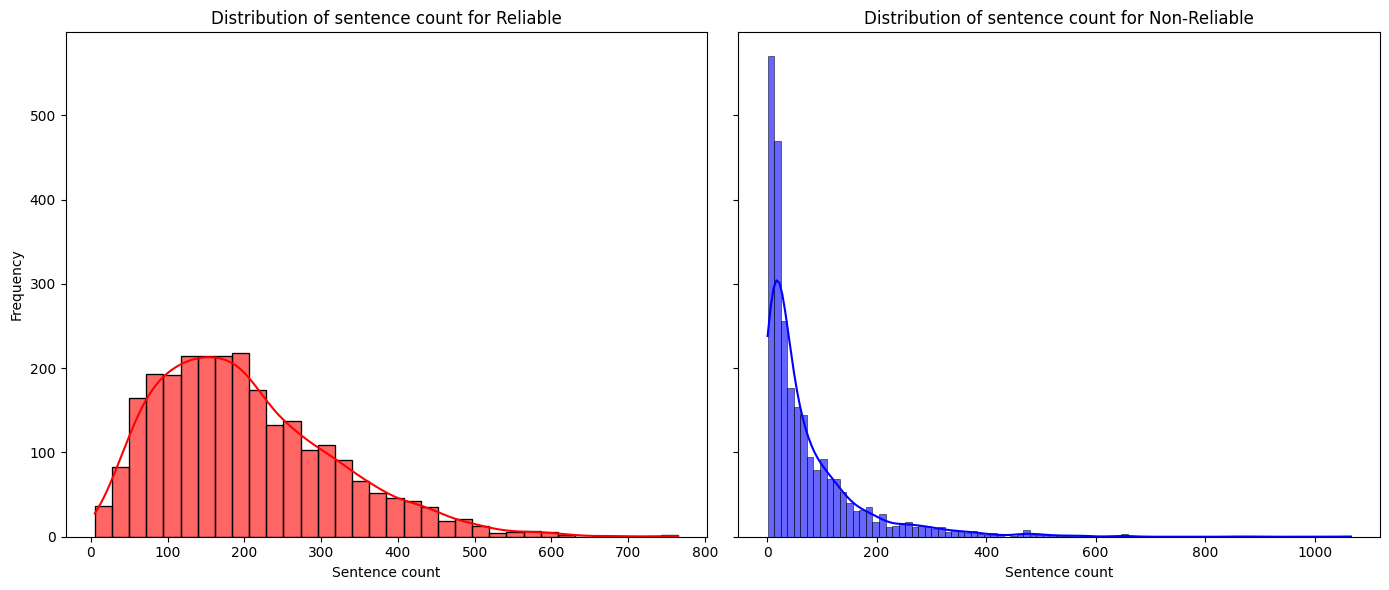

In [30]:
# Sentence count: Reliable vs. Non-Reliable
reliable = df_length[df_length['quality'] == 1]
non_reliable = df_length[df_length['quality'] == 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(reliable['sentence_count'], kde=True, color='red', ax=axs[0], alpha=0.6)
axs[0].set_title('Distribution of sentence count for Reliable')
axs[0].set_xlabel('Sentence count')
axs[0].set_ylabel('Frequency')

sns.histplot(non_reliable['sentence_count'], kde=True, color='blue', ax=axs[1], alpha=0.6)
axs[1].set_title('Distribution of sentence count for Non-Reliable')
axs[1].set_xlabel('Sentence count')

plt.tight_layout()
plt.show()

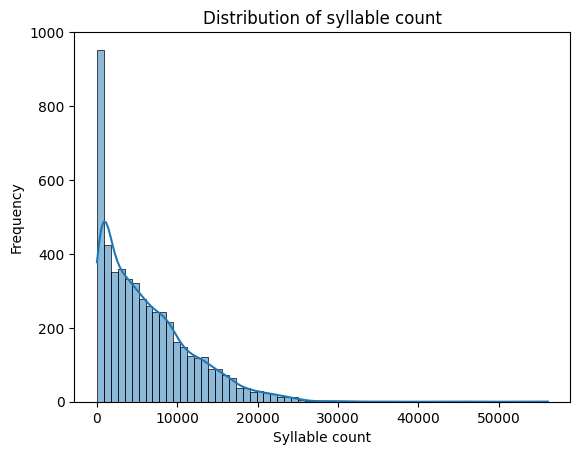

In [31]:
# Syllable count
sns.histplot(df_length['syllable_count'], kde=True)

plt.title('Distribution of syllable count')
plt.xlabel('Syllable count')
plt.ylabel('Frequency')
plt.show()

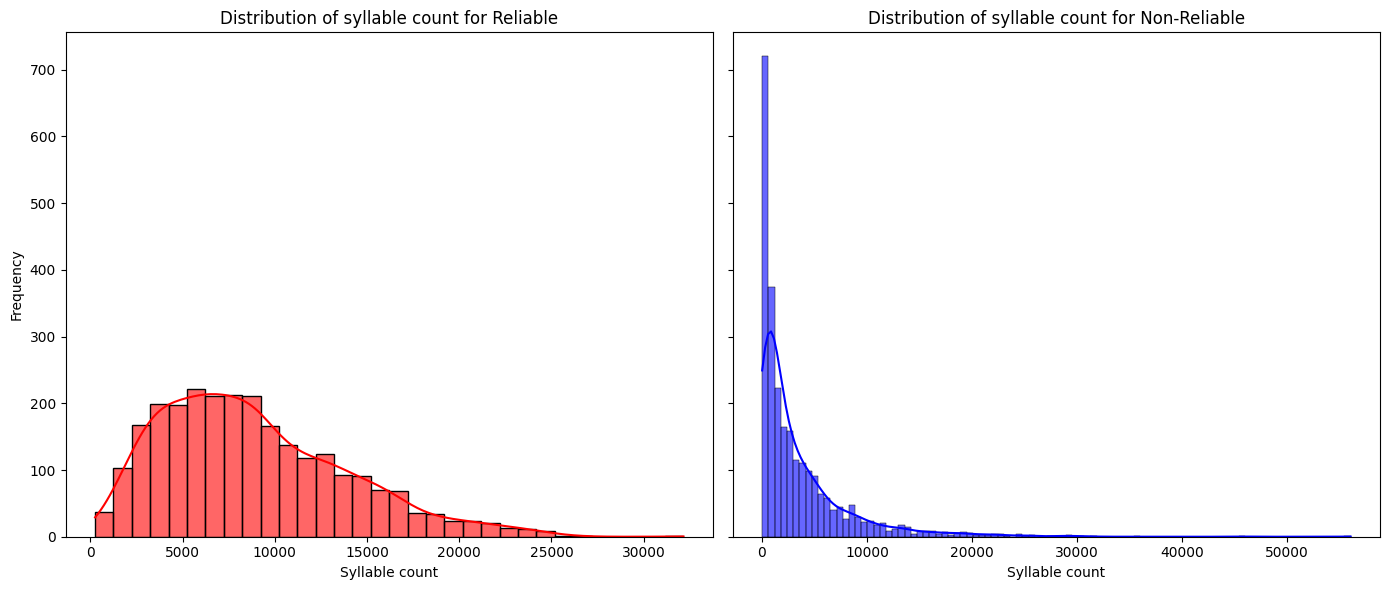

In [32]:
# Syllable count: Reliable vs. Non-Reliable
reliable = df_length[df_length['quality'] == 1]
non_reliable = df_length[df_length['quality'] == 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(reliable['syllable_count'], kde=True, color='red', ax=axs[0], alpha=0.6)
axs[0].set_title('Distribution of syllable count for Reliable')
axs[0].set_xlabel('Syllable count')
axs[0].set_ylabel('Frequency')

sns.histplot(non_reliable['syllable_count'], kde=True, color='blue', ax=axs[1], alpha=0.6)
axs[1].set_title('Distribution of syllable count for Non-Reliable')
axs[1].set_xlabel('Syllable count')

plt.tight_layout()
plt.show()

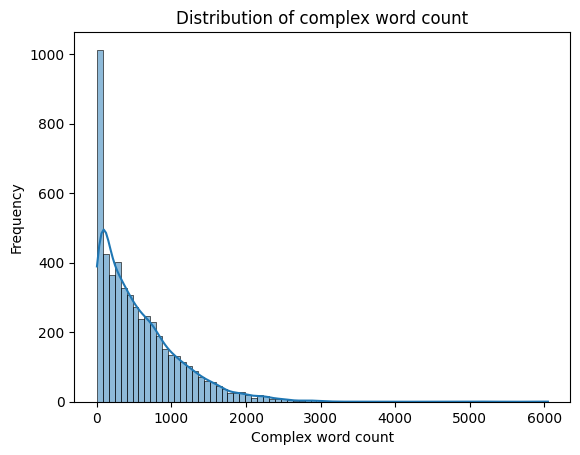

In [33]:
# Complex word count
sns.histplot(df_length['complex_word_count'], kde=True)

plt.title('Distribution of complex word count')
plt.xlabel('Complex word count')
plt.ylabel('Frequency')
plt.show()

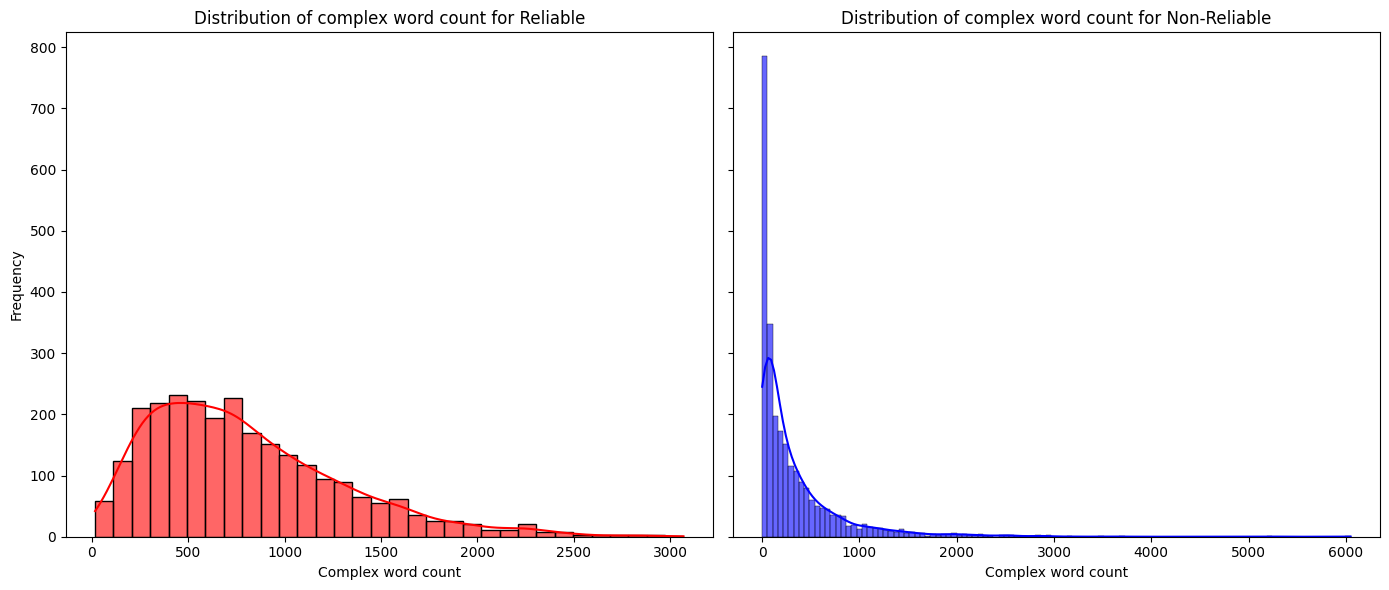

In [35]:
# Complex word count: Reliable vs. Non-Reliable
reliable = df_length[df_length['quality'] == 1]
non_reliable = df_length[df_length['quality'] == 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(reliable['complex_word_count'], kde=True, color='red', ax=axs[0], alpha=0.6)
axs[0].set_title('Distribution of complex word count for Reliable')
axs[0].set_xlabel('Complex word count')
axs[0].set_ylabel('Frequency')

sns.histplot(non_reliable['complex_word_count'], kde=True, color='blue', ax=axs[1], alpha=0.6)
axs[1].set_title('Distribution of complex word count for Non-Reliable')
axs[1].set_xlabel('Complex word count')

plt.tight_layout()
plt.show()

- All of them show a similar distribution patter
- For Reliable articles, a normal distribution is shown (relatively close to the normal distribution)
- For Non-Reliable articles, a highly skewed distribution is shown
- The Non-Reliable articles have small number of words overall

__structure features__

In [36]:
df_structure

section_count  subsection_count  paragraph_count  mean_section_size  \
0                12                25               81        3021.500000   
1                14                17               75        4640.857143   
2                11                21               54        3185.000000   
3                 8                 2               27        1476.000000   
4                25                31              148        3970.640000   
...             ...               ...              ...                ...   
5195              2                 0                7           0.000000   
5196              1                 0                1           0.000000   
5197              1                 0                1           0.000000   
5198              3                 2                7         746.666667   
5199              7                 3                9         452.285714   

      mean_paragraph_size  longest_section_size  shortest_section_size  \
0              462.851852                  7835                    685   
1              903.333333                 12983                   1476   
2              682.574074                  8464                    305   
3              492.222222                  2448                   1196   
4              684.979730                 19122                    904   
...                   ...                   ...                    ...   
5195           275.714286                     0                      0   
5196           424.000000                     0                      0   
5197           285.000000                     0                      0   
5198           335.857143                  1668                    572   
5199           366.333333                  1497                     39   

      abstract_size  abstract_text_ratio  citation_count  citation_per_text  \
0              2041             0.054616              82           0.002194   
1              3563             0.052656               0           0.000000   
2              2399             0.065240             164           0.004460   
3              1630             0.123205              69           0.005215   
4              3144             0.031068             352           0.003478   
...             ...                  ...             ...                ...   
5195           1933             1.003114               8           0.004152   
5196            421             1.000000               1           0.002375   
5197            282             1.000000               3           0.010638   
5198            183             0.078339              10           0.004281   
5199            361             0.110364               2           0.000611   

      external_link_count  internal_link_count  link_per_text  image_count  \
0                      30                  365       0.010570            9   
1                       0                  523       0.007729            8   
2                       1                  188       0.005140            7   
3                       1                  105       0.008012            6   
4                       1                  669       0.006621           37   
...                   ...                  ...            ...          ...   
5195                    3                   24       0.014011            0   
5196                    0                   11       0.026128            0   
5197                    0                    9       0.031915            0   
5198                    0                   49       0.020976            0   
5199                    0                   30       0.009172            0   

      image_per_text  infobox  quality  
0           0.000241        1        1  
1           0.000118        1        1  
2           0.000190        1        1  
3           0.000454        0        1  
4           0.000366        1        1  
...              ...      ...      ...  
5195        0.00000

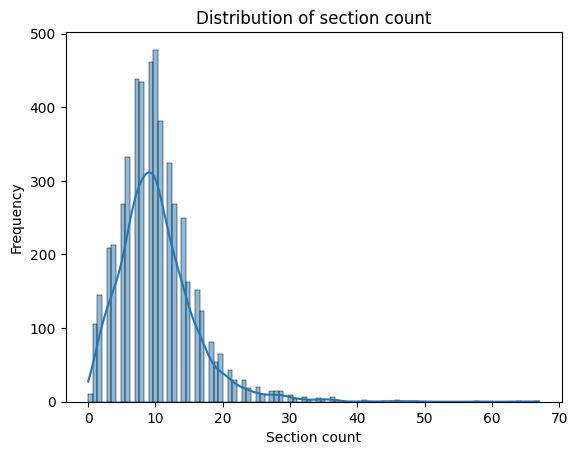

In [38]:
# Section count
sns.histplot(df_structure['section_count'], kde=True)

plt.title('Distribution of section count')
plt.xlabel('Section count')
plt.ylabel('Frequency')
plt.show()

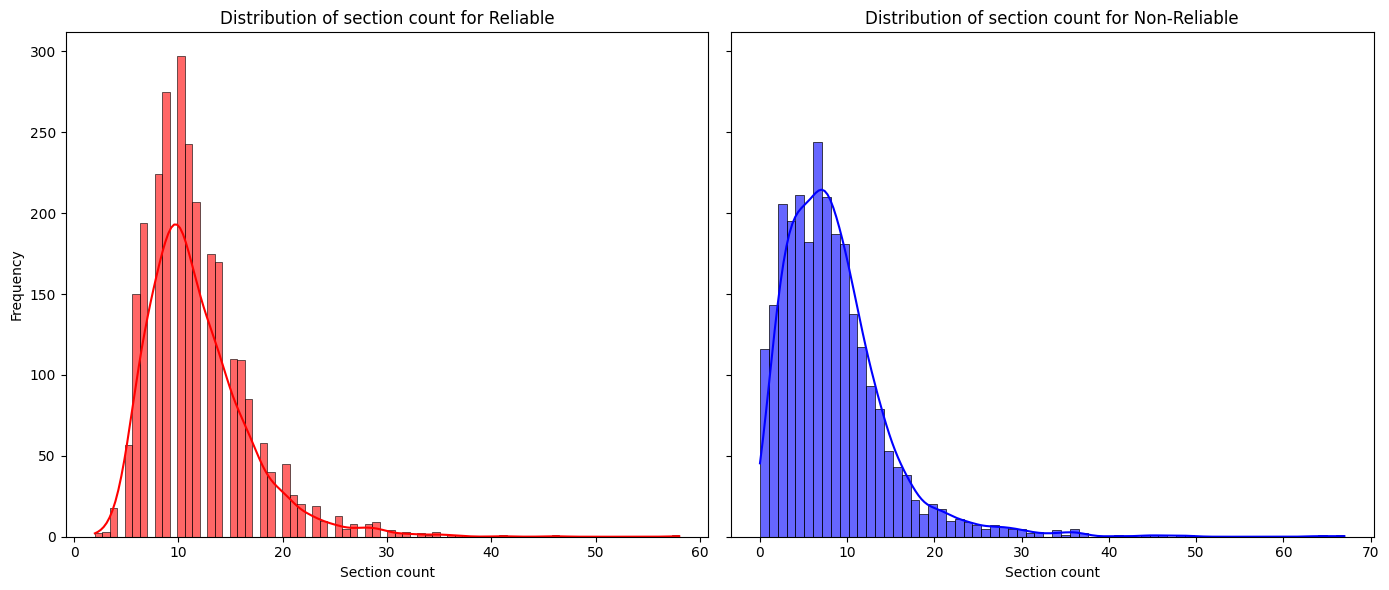

In [39]:
# Section count: Reliable vs. Non-Reliable
reliable = df_structure[df_structure['quality'] == 1]
non_reliable = df_structure[df_structure['quality'] == 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(reliable['section_count'], kde=True, color='red', ax=axs[0], alpha=0.6)
axs[0].set_title('Distribution of section count for Reliable')
axs[0].set_xlabel('Section count')
axs[0].set_ylabel('Frequency')

sns.histplot(non_reliable['section_count'], kde=True, color='blue', ax=axs[1], alpha=0.6)
axs[1].set_title('Distribution of section count for Non-Reliable')
axs[1].set_xlabel('Section count')

plt.tight_layout()
plt.show()

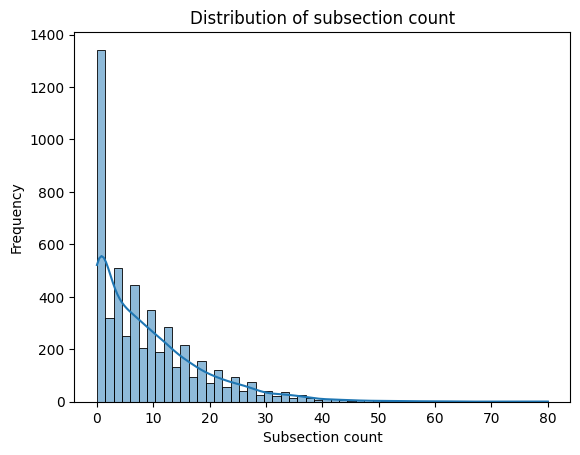

In [40]:
# Subsection count
sns.histplot(df_structure['subsection_count'], kde=True)

plt.title('Distribution of subsection count')
plt.xlabel('Subsection count')
plt.ylabel('Frequency')
plt.show()

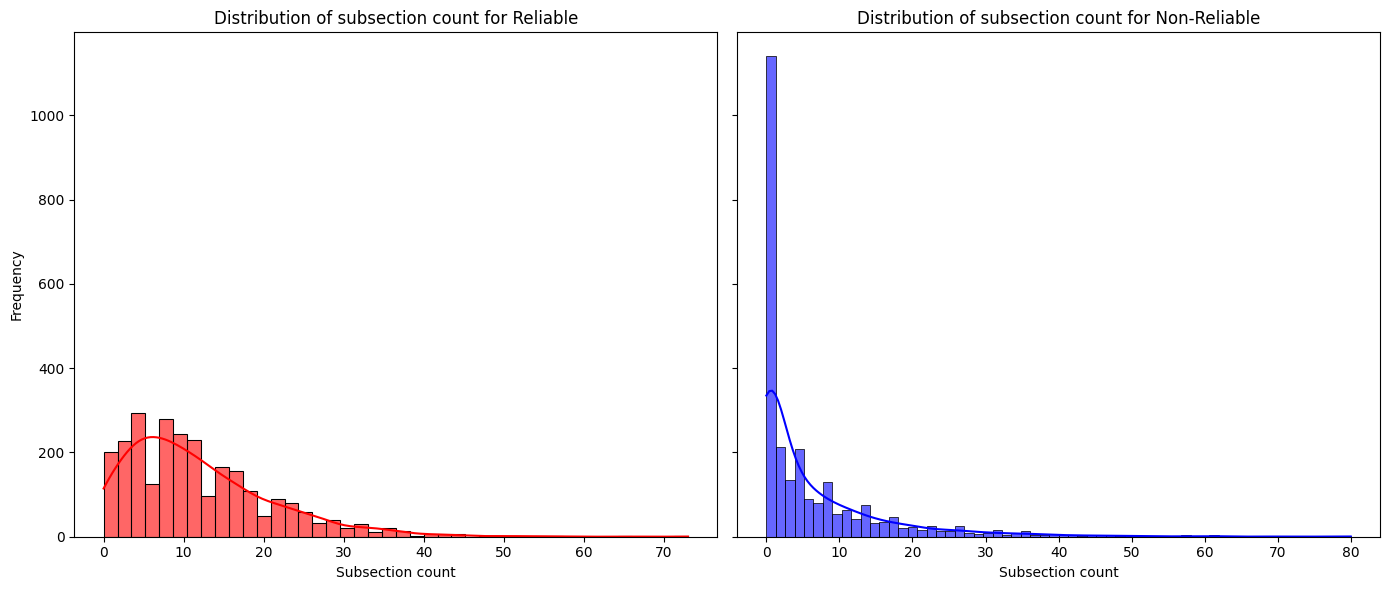

In [41]:
# Subsection count: Reliable vs. Non-Reliable
reliable = df_structure[df_structure['quality'] == 1]
non_reliable = df_structure[df_structure['quality'] == 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(reliable['subsection_count'], kde=True, color='red', ax=axs[0], alpha=0.6)
axs[0].set_title('Distribution of subsection count for Reliable')
axs[0].set_xlabel('Subsection count')
axs[0].set_ylabel('Frequency')

sns.histplot(non_reliable['subsection_count'], kde=True, color='blue', ax=axs[1], alpha=0.6)
axs[1].set_title('Distribution of subsection count for Non-Reliable')
axs[1].set_xlabel('Subsection count')

plt.tight_layout()
plt.show()

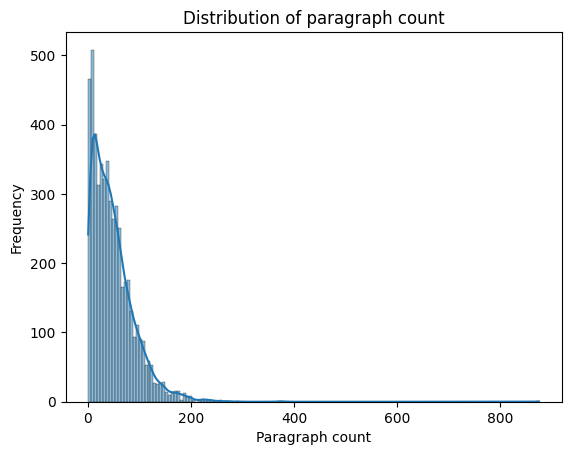

In [42]:
# Paragraph count
sns.histplot(df_structure['paragraph_count'], kde=True)

plt.title('Distribution of paragraph count')
plt.xlabel('Paragraph count')
plt.ylabel('Frequency')
plt.show()

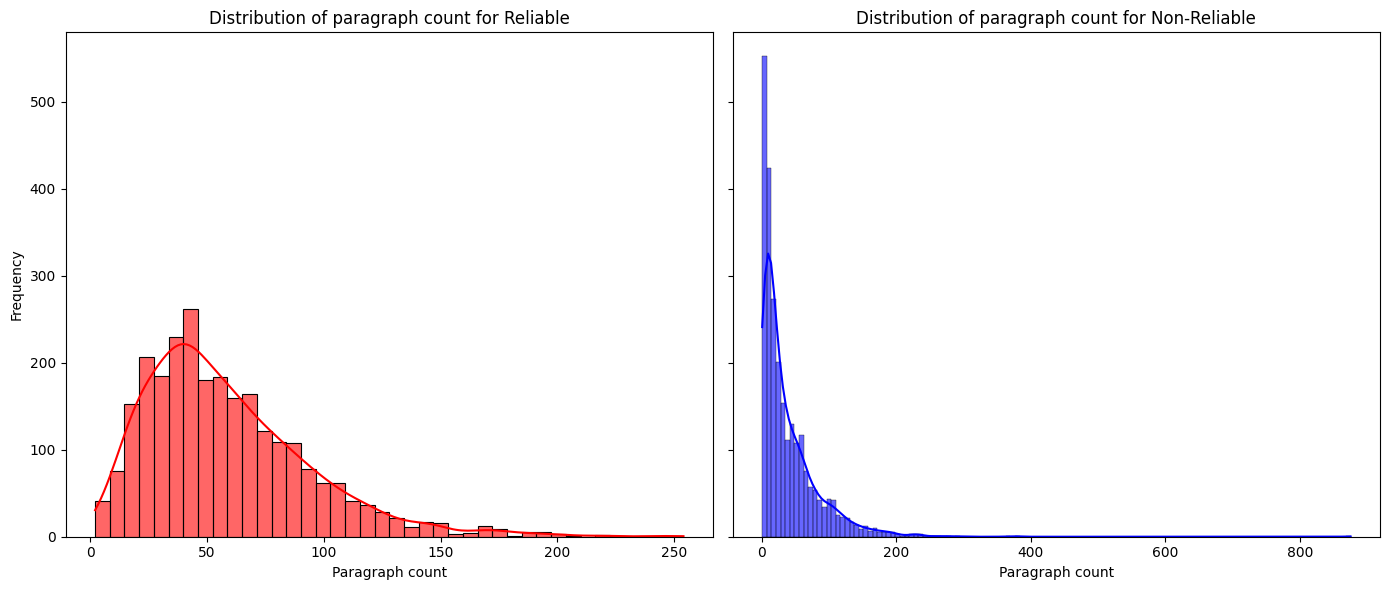

In [43]:
# Paragraph count: Reliable vs. Non-Reliable
reliable = df_structure[df_structure['quality'] == 1]
non_reliable = df_structure[df_structure['quality'] == 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(reliable['paragraph_count'], kde=True, color='red', ax=axs[0], alpha=0.6)
axs[0].set_title('Distribution of paragraph count for Reliable')
axs[0].set_xlabel('Paragraph count')
axs[0].set_ylabel('Frequency')

sns.histplot(non_reliable['paragraph_count'], kde=True, color='blue', ax=axs[1], alpha=0.6)
axs[1].set_title('Distribution of paragraph count for Non-Reliable')
axs[1].set_xlabel('Paragraph count')

plt.tight_layout()
plt.show()

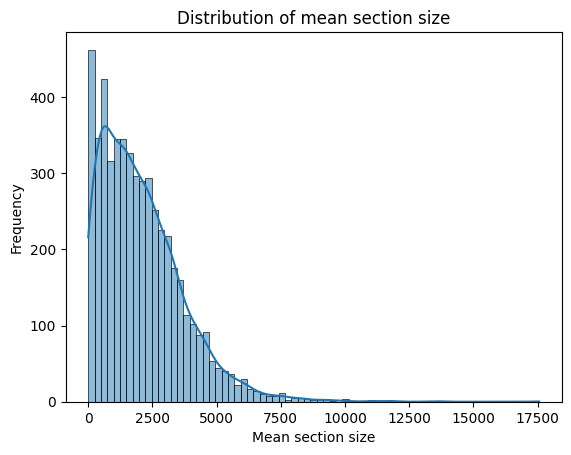

In [44]:
# Mean section size
sns.histplot(df_structure['mean_section_size'], kde=True)

plt.title('Distribution of mean section size')
plt.xlabel('Mean section size')
plt.ylabel('Frequency')
plt.show()

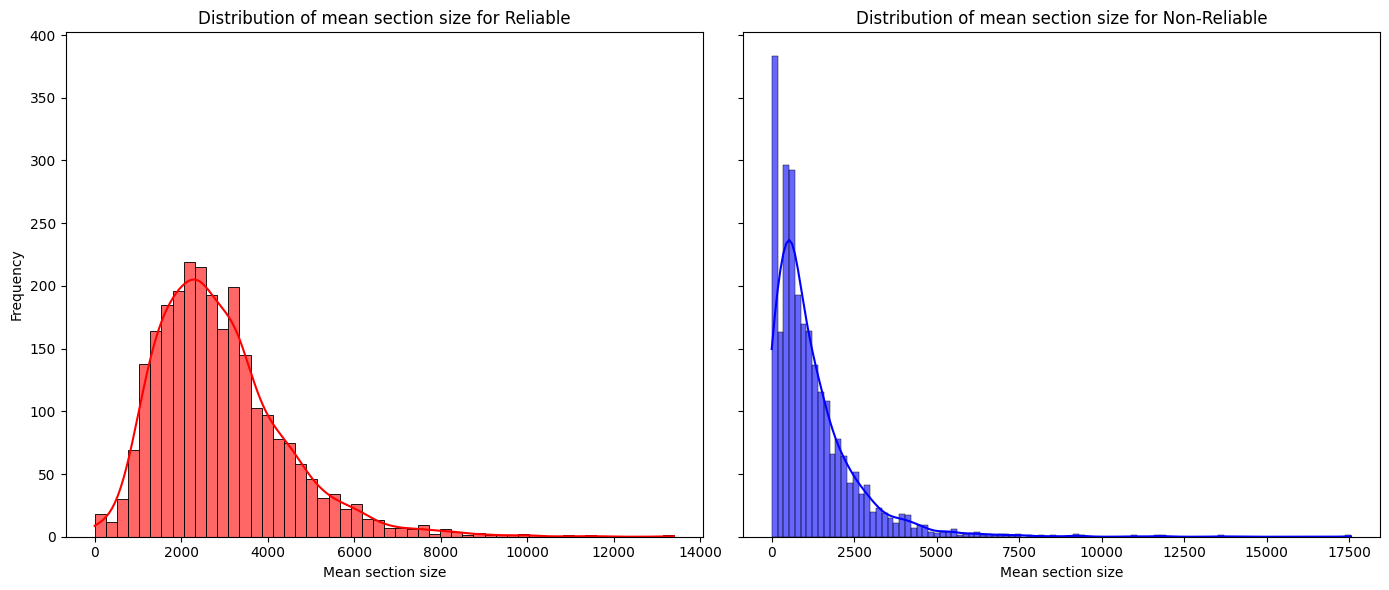

In [45]:
# Mean section size: Reliable vs. Non-Reliable
reliable = df_structure[df_structure['quality'] == 1]
non_reliable = df_structure[df_structure['quality'] == 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(reliable['mean_section_size'], kde=True, color='red', ax=axs[0], alpha=0.6)
axs[0].set_title('Distribution of mean section size for Reliable')
axs[0].set_xlabel('Mean section size')
axs[0].set_ylabel('Frequency')

sns.histplot(non_reliable['mean_section_size'], kde=True, color='blue', ax=axs[1], alpha=0.6)
axs[1].set_title('Distribution of mean section size for Non-Reliable')
axs[1].set_xlabel('Mean section size')

plt.tight_layout()
plt.show()

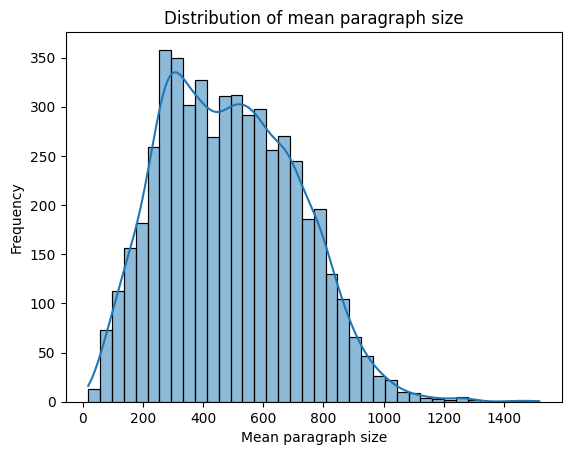

In [46]:
# Mean paragraph size
sns.histplot(df_structure['mean_paragraph_size'], kde=True)

plt.title('Distribution of mean paragraph size')
plt.xlabel('Mean paragraph size')
plt.ylabel('Frequency')
plt.show()

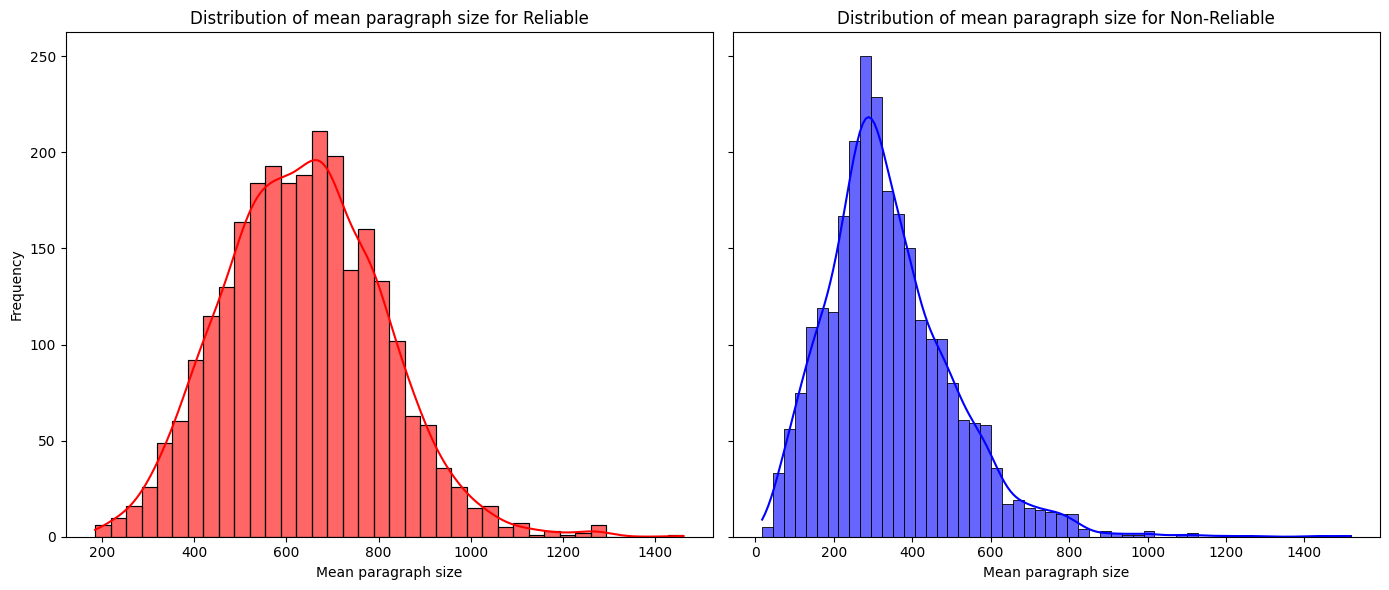

In [47]:
# Mean paragraph size: Reliable vs. Non-Reliable
reliable = df_structure[df_structure['quality'] == 1]
non_reliable = df_structure[df_structure['quality'] == 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(reliable['mean_paragraph_size'], kde=True, color='red', ax=axs[0], alpha=0.6)
axs[0].set_title('Distribution of mean paragraph size for Reliable')
axs[0].set_xlabel('Mean paragraph size')
axs[0].set_ylabel('Frequency')

sns.histplot(non_reliable['mean_paragraph_size'], kde=True, color='blue', ax=axs[1], alpha=0.6)
axs[1].set_title('Distribution of mean paragraph size for Non-Reliable')
axs[1].set_xlabel('Mean paragraph size')

plt.tight_layout()
plt.show()

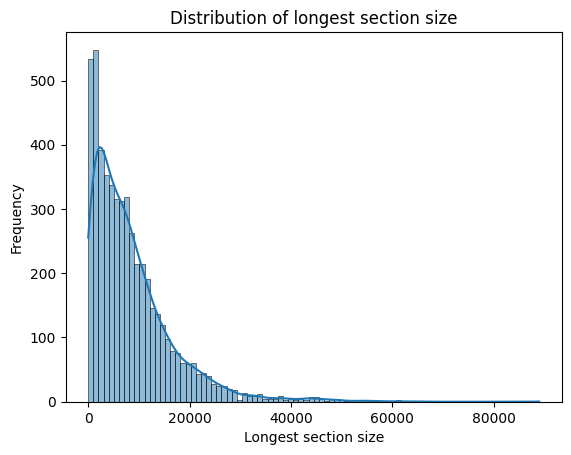

In [48]:
# Longest section size
sns.histplot(df_structure['longest_section_size'], kde=True)

plt.title('Distribution of longest section size')
plt.xlabel('Longest section size')
plt.ylabel('Frequency')
plt.show()

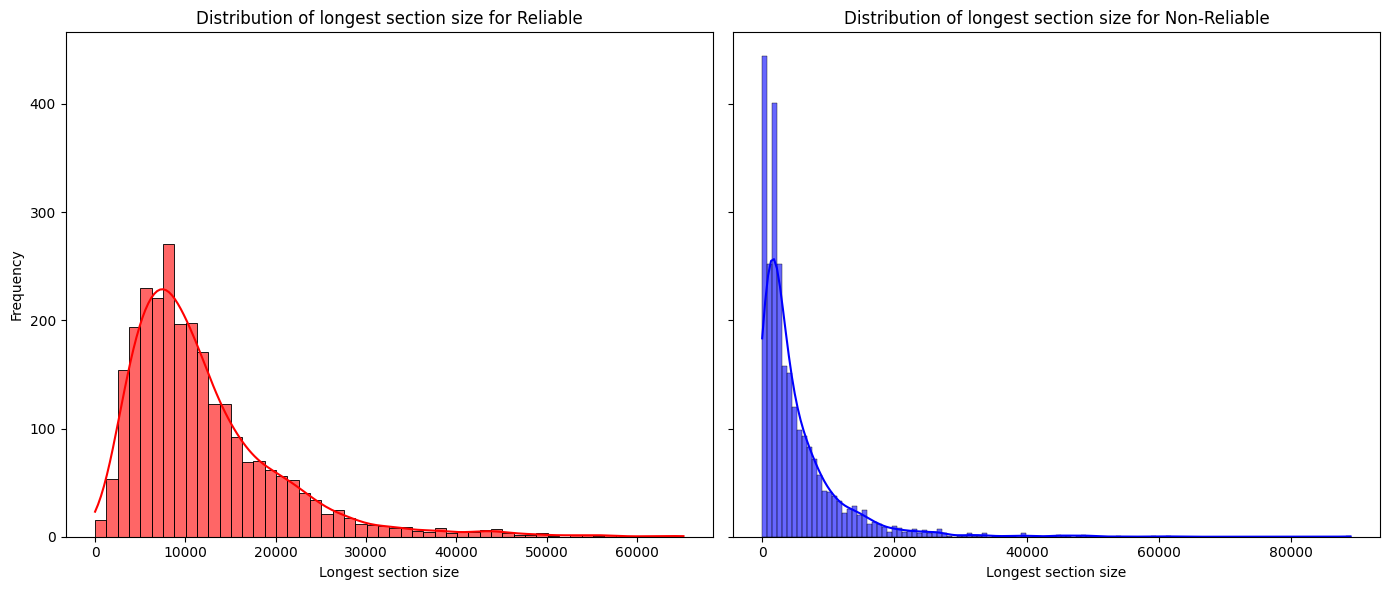

In [49]:
# Longest section size: Reliable vs. Non-Reliable
reliable = df_structure[df_structure['quality'] == 1]
non_reliable = df_structure[df_structure['quality'] == 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(reliable['longest_section_size'], kde=True, color='red', ax=axs[0], alpha=0.6)
axs[0].set_title('Distribution of longest section size for Reliable')
axs[0].set_xlabel('Longest section size')
axs[0].set_ylabel('Frequency')

sns.histplot(non_reliable['longest_section_size'], kde=True, color='blue', ax=axs[1], alpha=0.6)
axs[1].set_title('Distribution of longest section size for Non-Reliable')
axs[1].set_xlabel('Longest section size')

plt.tight_layout()
plt.show()

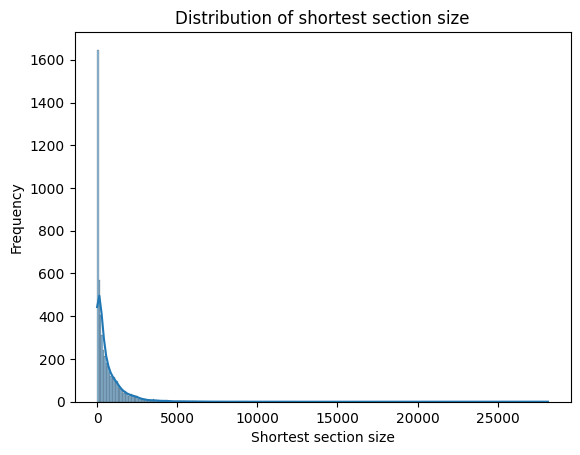

In [50]:
# Shortest section size
sns.histplot(df_structure['shortest_section_size'], kde=True)

plt.title('Distribution of shortest section size')
plt.xlabel('Shortest section size')
plt.ylabel('Frequency')
plt.show()

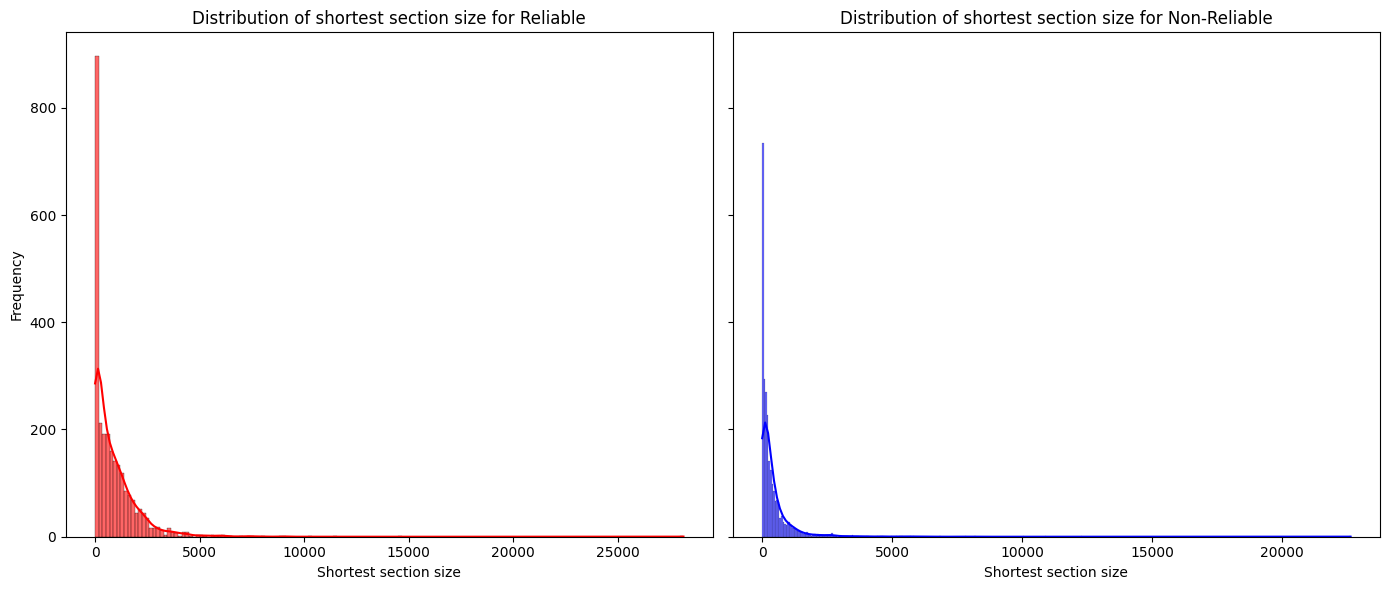

In [51]:
# Shortest section size: Reliable vs. Non-Reliable
reliable = df_structure[df_structure['quality'] == 1]
non_reliable = df_structure[df_structure['quality'] == 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(reliable['shortest_section_size'], kde=True, color='red', ax=axs[0], alpha=0.6)
axs[0].set_title('Distribution of shortest section size for Reliable')
axs[0].set_xlabel('Shortest section size')
axs[0].set_ylabel('Frequency')

sns.histplot(non_reliable['shortest_section_size'], kde=True, color='blue', ax=axs[1], alpha=0.6)
axs[1].set_title('Distribution of shortest section size for Non-Reliable')
axs[1].set_xlabel('Shortest section size')

plt.tight_layout()
plt.show()

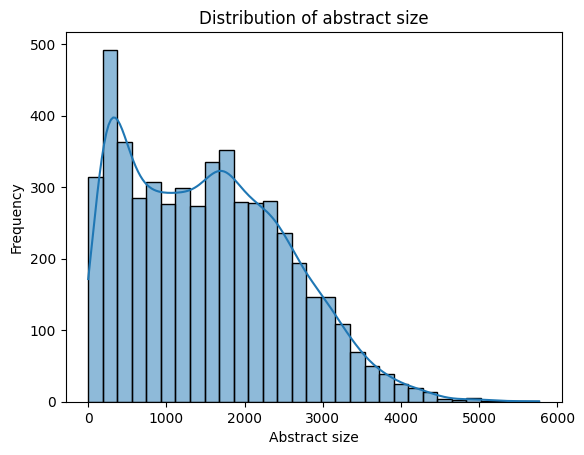

In [52]:
# Abstract size
sns.histplot(df_structure['abstract_size'], kde=True)

plt.title('Distribution of abstract size')
plt.xlabel('Abstract size')
plt.ylabel('Frequency')
plt.show()

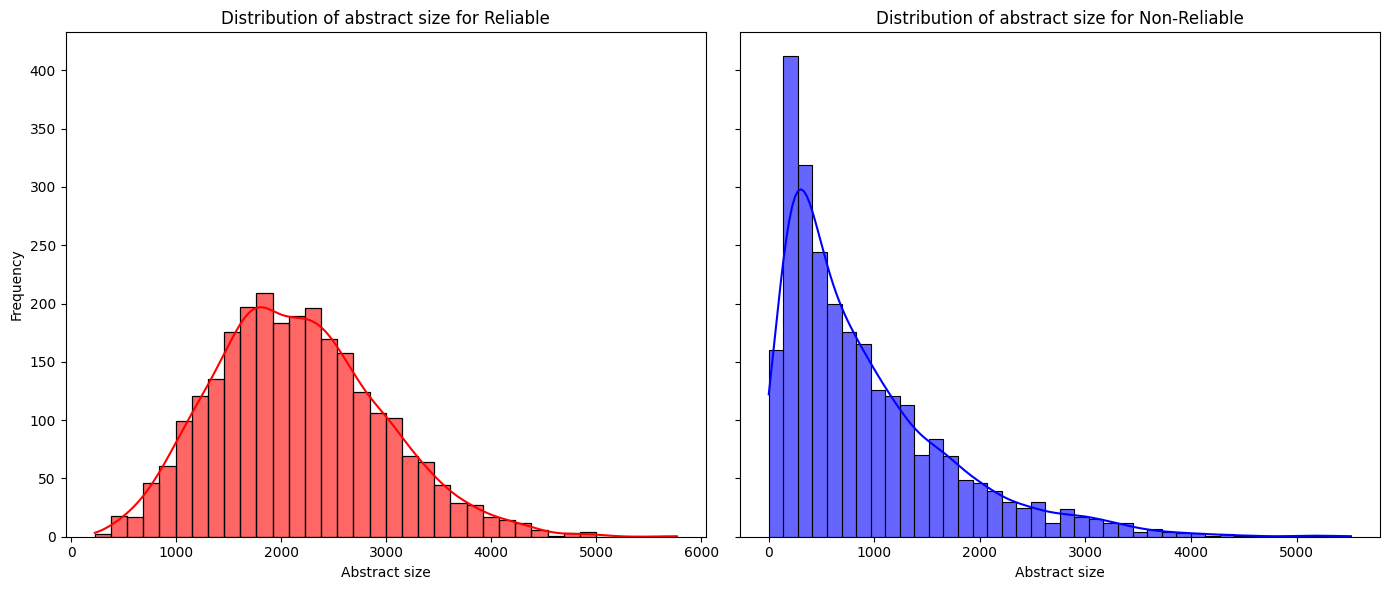

In [53]:
# Abstract size: Reliable vs. Non-Reliable
reliable = df_structure[df_structure['quality'] == 1]
non_reliable = df_structure[df_structure['quality'] == 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(reliable['abstract_size'], kde=True, color='red', ax=axs[0], alpha=0.6)
axs[0].set_title('Distribution of abstract size for Reliable')
axs[0].set_xlabel('Abstract size')
axs[0].set_ylabel('Frequency')

sns.histplot(non_reliable['abstract_size'], kde=True, color='blue', ax=axs[1], alpha=0.6)
axs[1].set_title('Distribution of abstract size for Non-Reliable')
axs[1].set_xlabel('Abstract size')

plt.tight_layout()
plt.show()

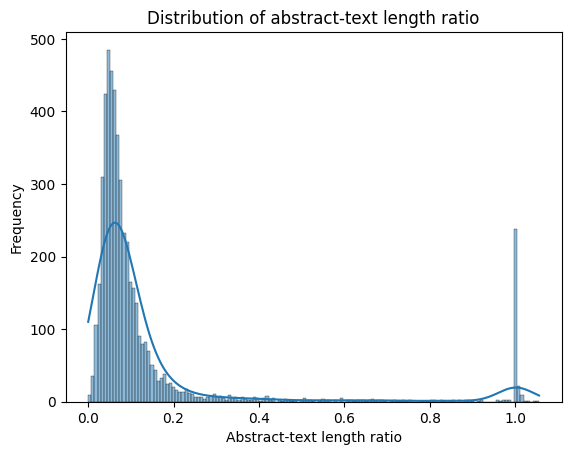

In [54]:
# Abstract-text length ratio
sns.histplot(df_structure['abstract_text_ratio'], kde=True)

plt.title('Distribution of abstract-text length ratio')
plt.xlabel('Abstract-text length ratio')
plt.ylabel('Frequency')
plt.show()

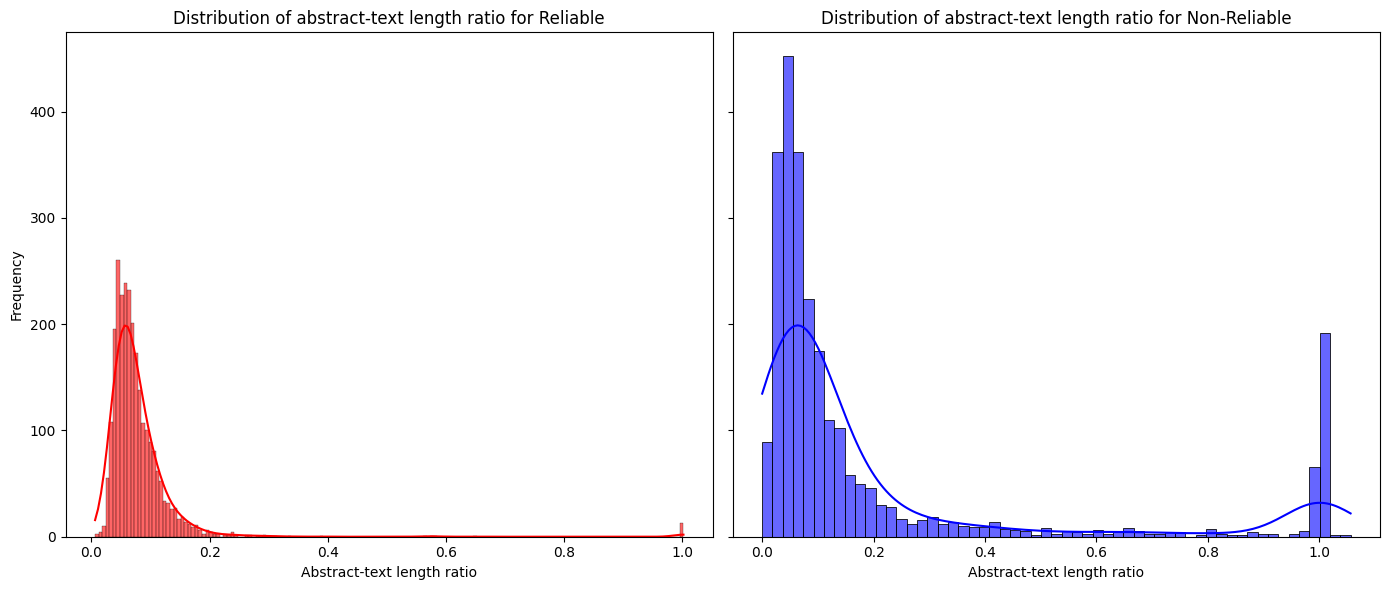

In [55]:
# Abstract-text length ratio: Reliable vs. Non-Reliable
reliable = df_structure[df_structure['quality'] == 1]
non_reliable = df_structure[df_structure['quality'] == 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(reliable['abstract_text_ratio'], kde=True, color='red', ax=axs[0], alpha=0.6)
axs[0].set_title('Distribution of abstract-text length ratio for Reliable')
axs[0].set_xlabel('Abstract-text length ratio')
axs[0].set_ylabel('Frequency')

sns.histplot(non_reliable['abstract_text_ratio'], kde=True, color='blue', ax=axs[1], alpha=0.6)
axs[1].set_title('Distribution of abstract-text length ratio for Non-Reliable')
axs[1].set_xlabel('Abstract-text length ratio')

plt.tight_layout()
plt.show()

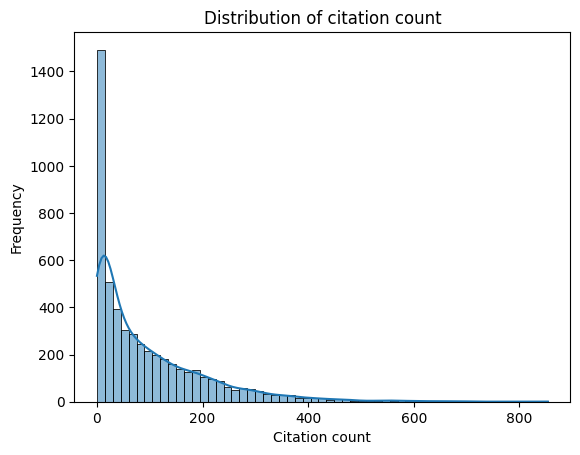

In [56]:
# Citation count
sns.histplot(df_structure['citation_count'], kde=True)

plt.title('Distribution of citation count')
plt.xlabel('Citation count')
plt.ylabel('Frequency')
plt.show()

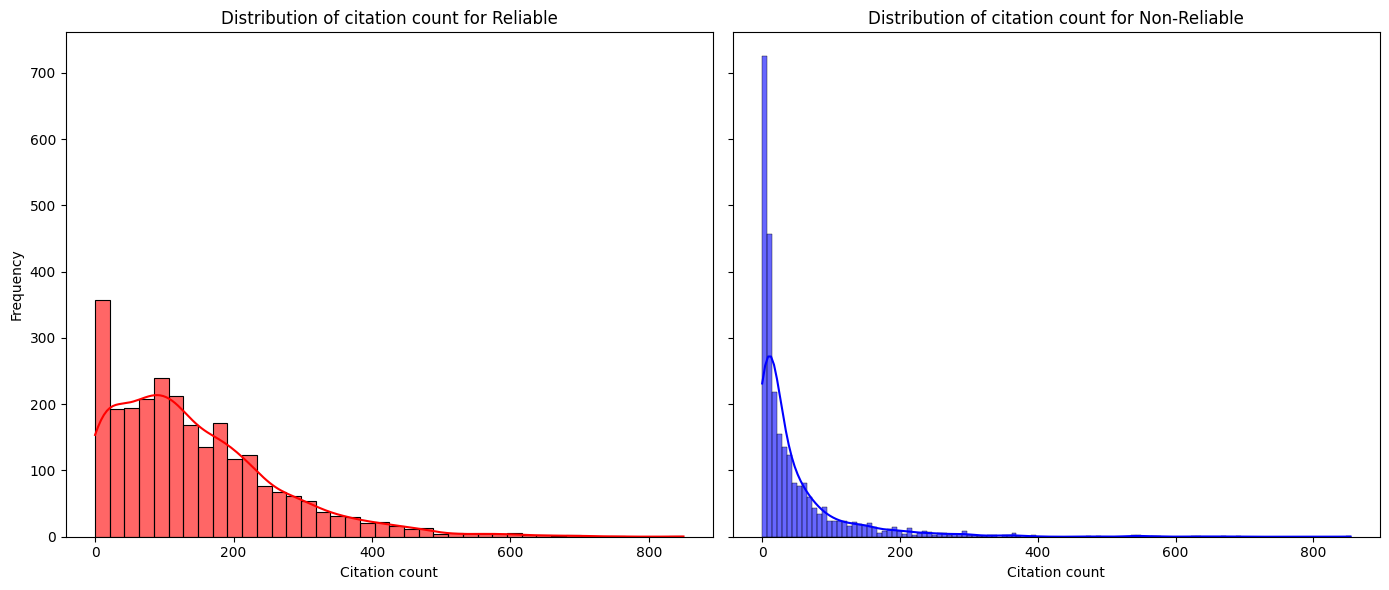

In [57]:
# Citation count: Reliable vs. Non-Reliable
reliable = df_structure[df_structure['quality'] == 1]
non_reliable = df_structure[df_structure['quality'] == 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(reliable['citation_count'], kde=True, color='red', ax=axs[0], alpha=0.6)
axs[0].set_title('Distribution of citation count for Reliable')
axs[0].set_xlabel('Citation count')
axs[0].set_ylabel('Frequency')

sns.histplot(non_reliable['citation_count'], kde=True, color='blue', ax=axs[1], alpha=0.6)
axs[1].set_title('Distribution of citation count for Non-Reliable')
axs[1].set_xlabel('Citation count')

plt.tight_layout()
plt.show()

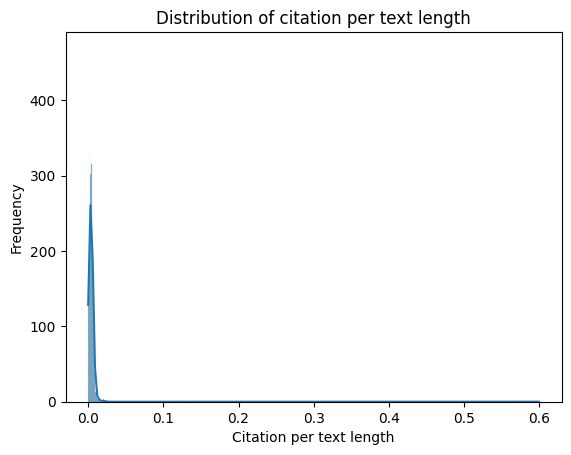

In [58]:
# Citation per text length
sns.histplot(df_structure['citation_per_text'], kde=True)

plt.title('Distribution of citation per text length')
plt.xlabel('Citation per text length')
plt.ylabel('Frequency')
plt.show()

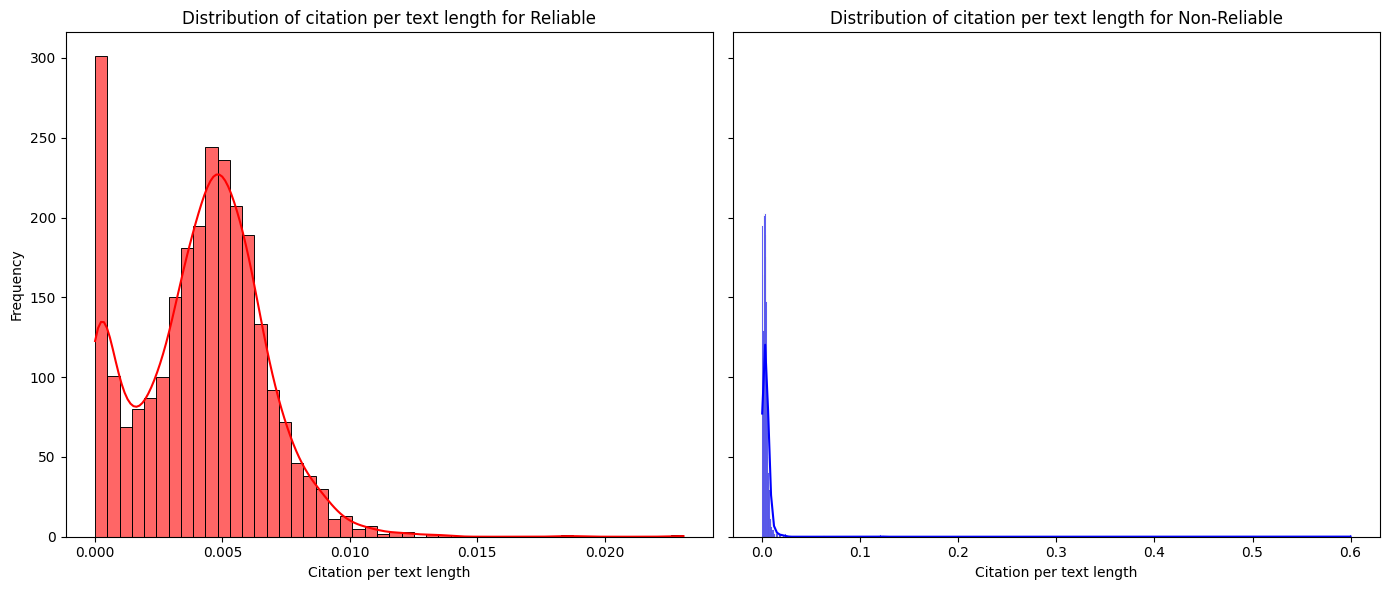

In [59]:
# Citation per text length: Reliable vs. Non-Reliable
reliable = df_structure[df_structure['quality'] == 1]
non_reliable = df_structure[df_structure['quality'] == 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(reliable['citation_per_text'], kde=True, color='red', ax=axs[0], alpha=0.6)
axs[0].set_title('Distribution of citation per text length for Reliable')
axs[0].set_xlabel('Citation per text length')
axs[0].set_ylabel('Frequency')

sns.histplot(non_reliable['citation_per_text'], kde=True, color='blue', ax=axs[1], alpha=0.6)
axs[1].set_title('Distribution of citation per text length for Non-Reliable')
axs[1].set_xlabel('Citation per text length')

plt.tight_layout()
plt.show()

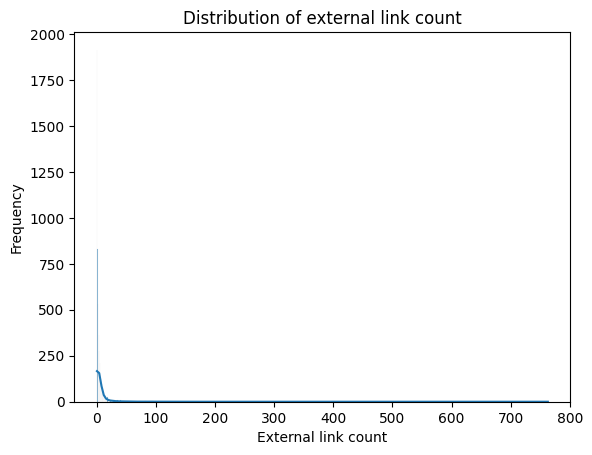

In [60]:
# External link count
sns.histplot(df_structure['external_link_count'], kde=True)

plt.title('Distribution of external link count')
plt.xlabel('External link count')
plt.ylabel('Frequency')
plt.show()

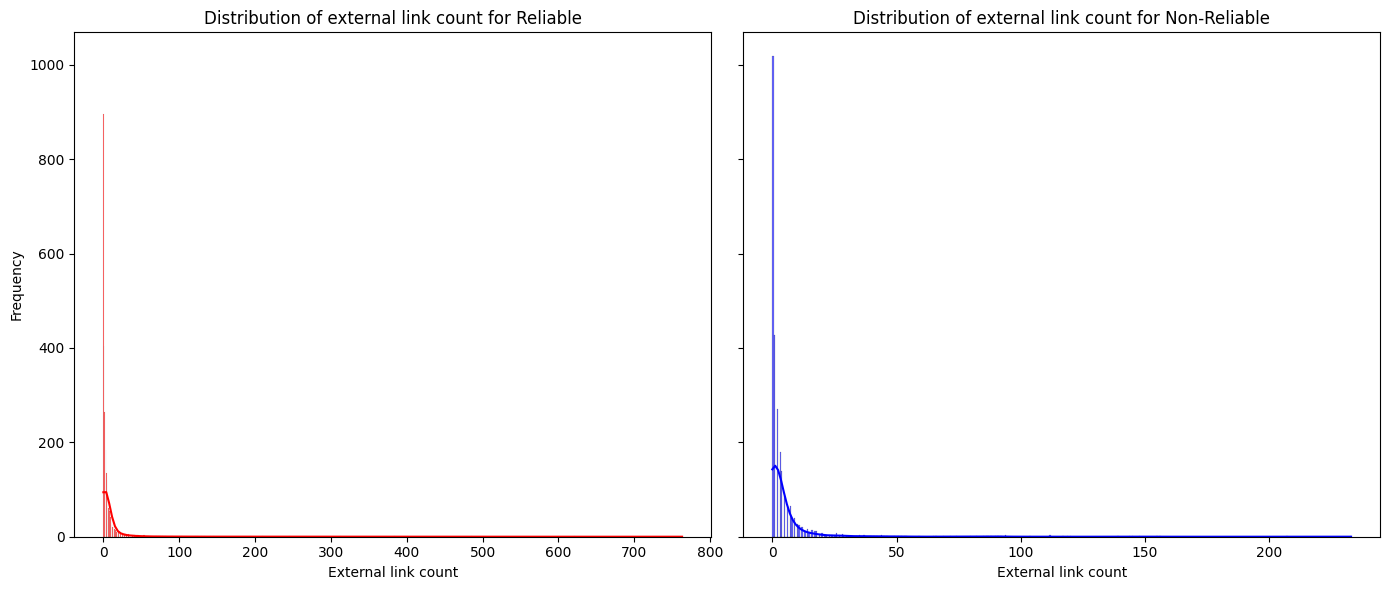

In [61]:
# External link count: Reliable vs. Non-Reliable
reliable = df_structure[df_structure['quality'] == 1]
non_reliable = df_structure[df_structure['quality'] == 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(reliable['external_link_count'], kde=True, color='red', ax=axs[0], alpha=0.6)
axs[0].set_title('Distribution of external link count for Reliable')
axs[0].set_xlabel('External link count')
axs[0].set_ylabel('Frequency')

sns.histplot(non_reliable['external_link_count'], kde=True, color='blue', ax=axs[1], alpha=0.6)
axs[1].set_title('Distribution of external link count for Non-Reliable')
axs[1].set_xlabel('External link count')

plt.tight_layout()
plt.show()

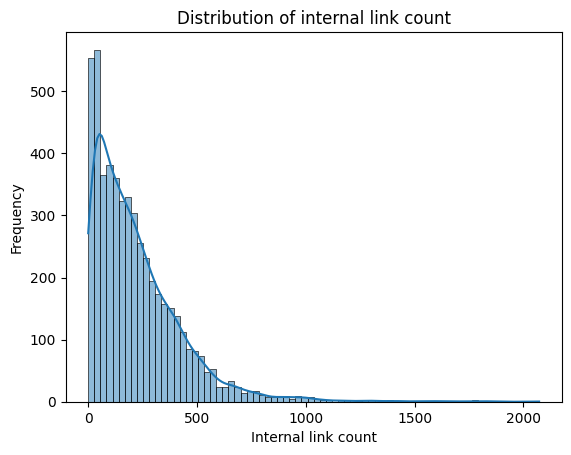

In [62]:
# Internal link count
sns.histplot(df_structure['internal_link_count'], kde=True)

plt.title('Distribution of internal link count')
plt.xlabel('Internal link count')
plt.ylabel('Frequency')
plt.show()

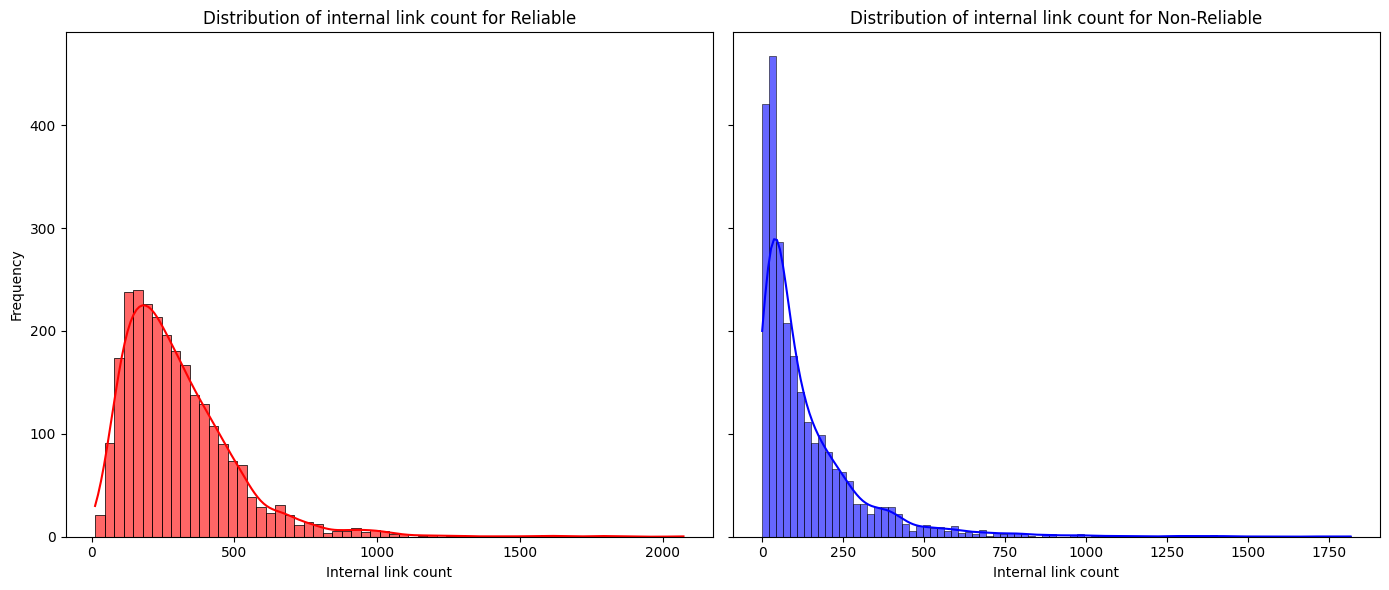

In [63]:
# Internal link count: Reliable vs. Non-Reliable
reliable = df_structure[df_structure['quality'] == 1]
non_reliable = df_structure[df_structure['quality'] == 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(reliable['internal_link_count'], kde=True, color='red', ax=axs[0], alpha=0.6)
axs[0].set_title('Distribution of internal link count for Reliable')
axs[0].set_xlabel('Internal link count')
axs[0].set_ylabel('Frequency')

sns.histplot(non_reliable['internal_link_count'], kde=True, color='blue', ax=axs[1], alpha=0.6)
axs[1].set_title('Distribution of internal link count for Non-Reliable')
axs[1].set_xlabel('Internal link count')

plt.tight_layout()
plt.show()

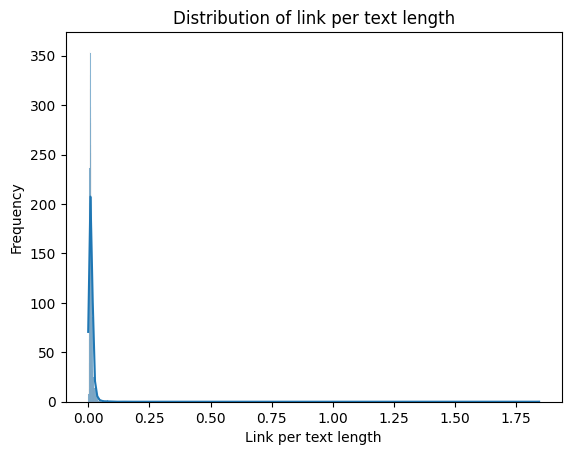

In [64]:
# Link per text length
sns.histplot(df_structure['link_per_text'], kde=True)

plt.title('Distribution of link per text length')
plt.xlabel('Link per text length')
plt.ylabel('Frequency')
plt.show()

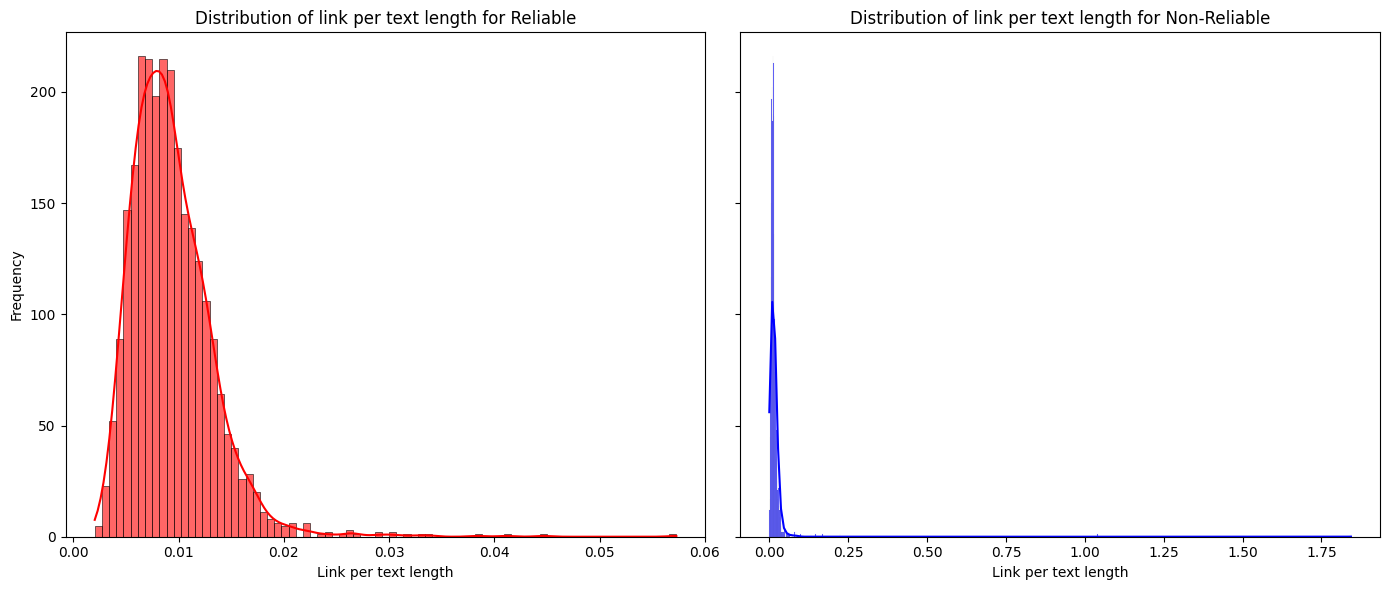

In [65]:
# Link per text length: Reliable vs. Non-Reliable
reliable = df_structure[df_structure['quality'] == 1]
non_reliable = df_structure[df_structure['quality'] == 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(reliable['link_per_text'], kde=True, color='red', ax=axs[0], alpha=0.6)
axs[0].set_title('Distribution of link per text length for Reliable')
axs[0].set_xlabel('Link per text length')
axs[0].set_ylabel('Frequency')

sns.histplot(non_reliable['link_per_text'], kde=True, color='blue', ax=axs[1], alpha=0.6)
axs[1].set_title('Distribution of link per text length for Non-Reliable')
axs[1].set_xlabel('Link per text length')

plt.tight_layout()
plt.show()

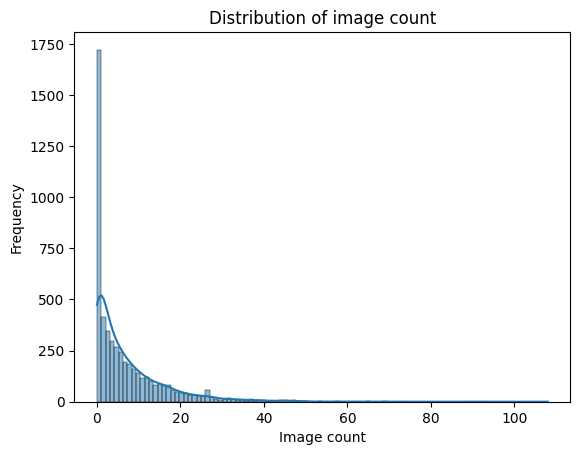

In [66]:
# Image count
sns.histplot(df_structure['image_count'], kde=True)

plt.title('Distribution of image count')
plt.xlabel('Image count')
plt.ylabel('Frequency')
plt.show()

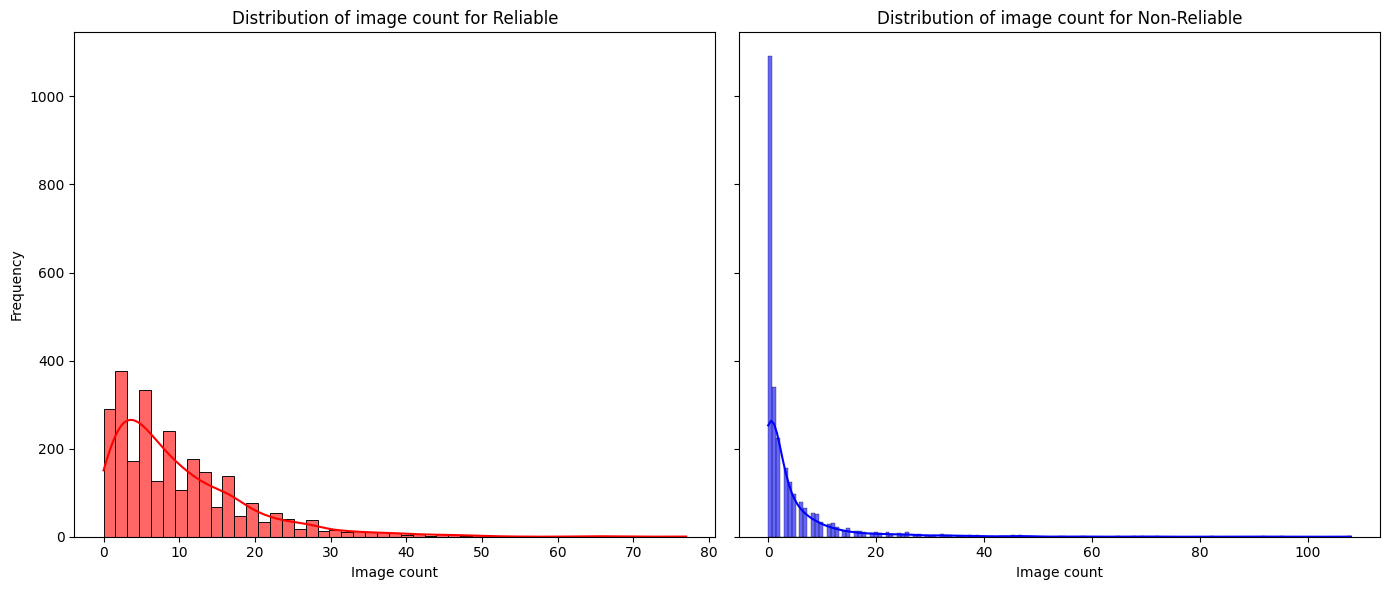

In [67]:
# Image count: Reliable vs. Non-Reliable
reliable = df_structure[df_structure['quality'] == 1]
non_reliable = df_structure[df_structure['quality'] == 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(reliable['image_count'], kde=True, color='red', ax=axs[0], alpha=0.6)
axs[0].set_title('Distribution of image count for Reliable')
axs[0].set_xlabel('Image count')
axs[0].set_ylabel('Frequency')

sns.histplot(non_reliable['image_count'], kde=True, color='blue', ax=axs[1], alpha=0.6)
axs[1].set_title('Distribution of image count for Non-Reliable')
axs[1].set_xlabel('Image count')

plt.tight_layout()
plt.show()

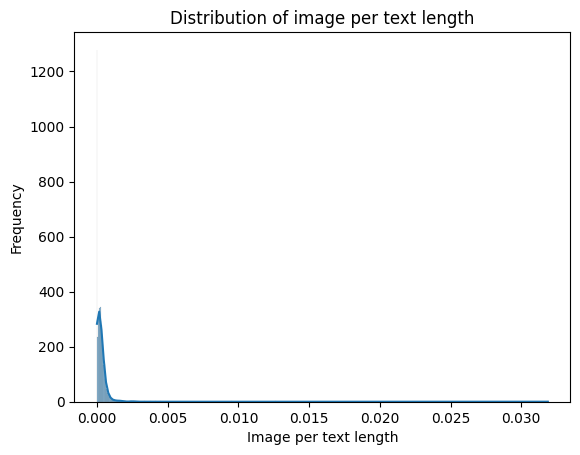

In [68]:
# Image per text length
sns.histplot(df_structure['image_per_text'], kde=True)

plt.title('Distribution of image per text length')
plt.xlabel('Image per text length')
plt.ylabel('Frequency')
plt.show()

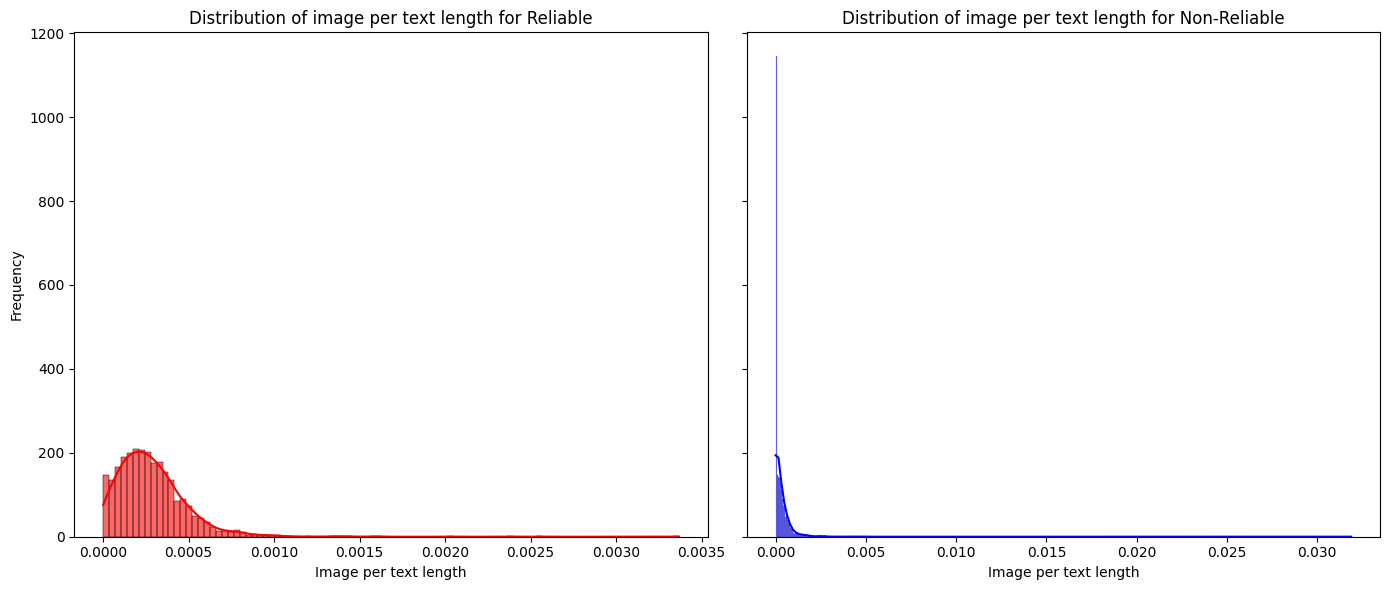

In [69]:
# Image per text length: Reliable vs. Non-Reliable
reliable = df_structure[df_structure['quality'] == 1]
non_reliable = df_structure[df_structure['quality'] == 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(reliable['image_per_text'], kde=True, color='red', ax=axs[0], alpha=0.6)
axs[0].set_title('Distribution of image per text length for Reliable')
axs[0].set_xlabel('Image per text length')
axs[0].set_ylabel('Frequency')

sns.histplot(non_reliable['image_per_text'], kde=True, color='blue', ax=axs[1], alpha=0.6)
axs[1].set_title('Distribution of image per text length for Non-Reliable')
axs[1].set_xlabel('Image per text length')

plt.tight_layout()
plt.show()

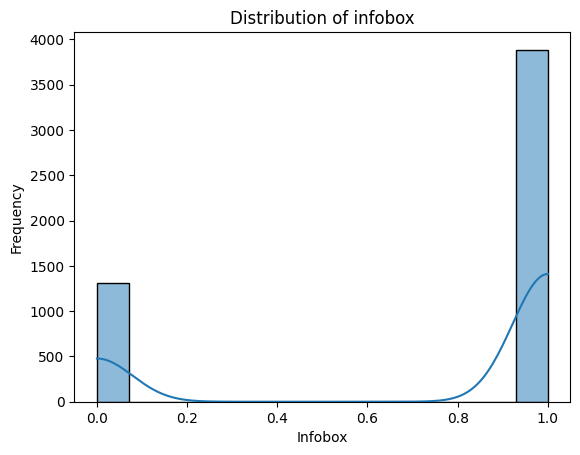

In [70]:
# Infobox
sns.histplot(df_structure['infobox'], kde=True)

plt.title('Distribution of infobox')
plt.xlabel('Infobox')
plt.ylabel('Frequency')
plt.show()

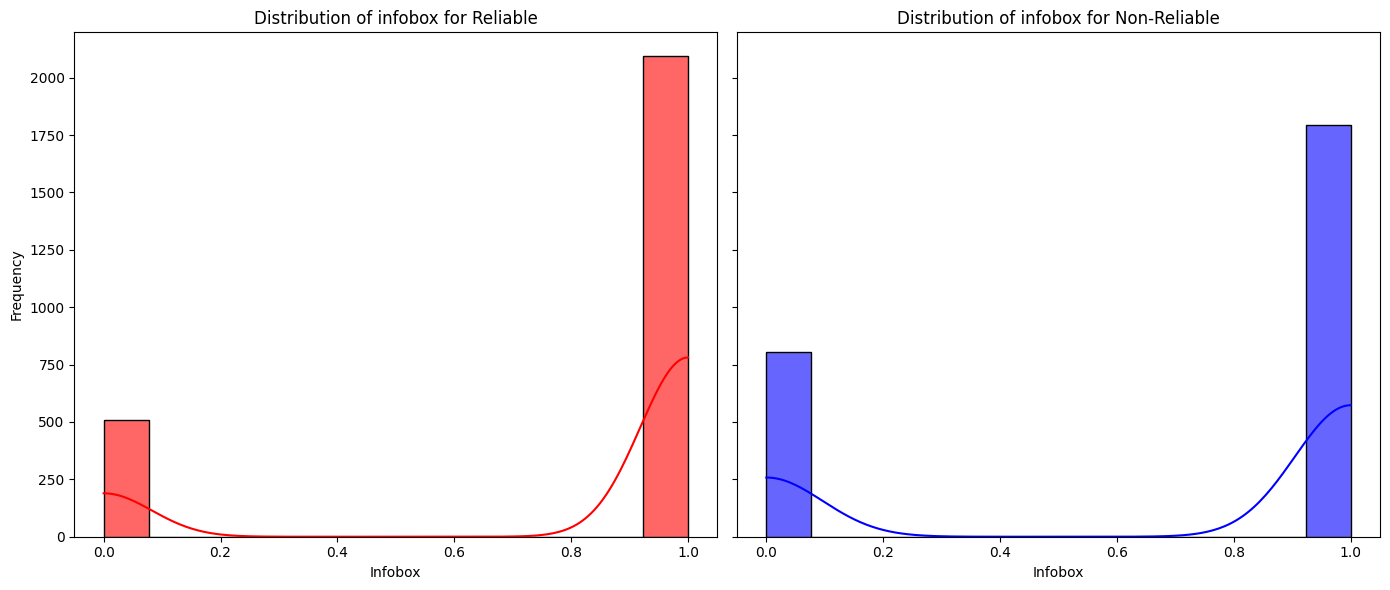

In [71]:
# Infobox: Reliable vs. Non-Reliable
reliable = df_structure[df_structure['quality'] == 1]
non_reliable = df_structure[df_structure['quality'] == 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(reliable['infobox'], kde=True, color='red', ax=axs[0], alpha=0.6)
axs[0].set_title('Distribution of infobox for Reliable')
axs[0].set_xlabel('Infobox')
axs[0].set_ylabel('Frequency')

sns.histplot(non_reliable['infobox'], kde=True, color='blue', ax=axs[1], alpha=0.6)
axs[1].set_title('Distribution of infobox for Non-Reliable')
axs[1].set_xlabel('Infobox')

plt.tight_layout()
plt.show()

- Similar to length features, skewed distributions are shown for Non-Reliable features
- Hard to see the difference between Reliable vs. Non-Reliable: subsection count, mean paragraph size, shortest section size, external link, image count, infobox
- Extreme values seem to be outliers: abstract-text length ratio(Non-Reliable)


__style features__

In [72]:
df_style

mean_sentence_size  largest_sentence_size  shortest_sentence_size  \
0             205.430939                    748                      29   
1             199.198225                    577                      32   
2             150.333333                    426                      21   
3             198.424242                    497                       3   
4             172.886598                    666                      20   
...                  ...                    ...                     ...   
5195          240.000000                    506                      58   
5196          104.250000                    131                      87   
5197           93.333333                    104                      83   
5198          154.800000                    437                      28   
5199          191.411765                    358                      94   

      question_count  exclamation_count  pronoun_start_count  \
0                  0                  0                    1   
1                  0                  0                   35   
2                  0                  0                   31   
3                  0                  0                    0   
4                  0                  0                   24   
...              ...                ...                  ...   
5195               0                  0                    0   
5196               0                  0                    0   
5197               0                  0                    0   
5198               0                  0                    0   
5199               0                  0                    0   

      pronoun_start_count_sentence_ratio  quality  
0                               0.005525        1  
1                               0.103550        1  
2                               0.127572        1  
3                               0.000000        1  
4                               0.041237        1  
...                                  ...      ...  
5195                            0.000000        0  
5196                            0.000000        0  
5197                            0.000000        0  
5198                            0.000000        0  
5199                            0.000000        0  

[5200 rows x 8 columns]

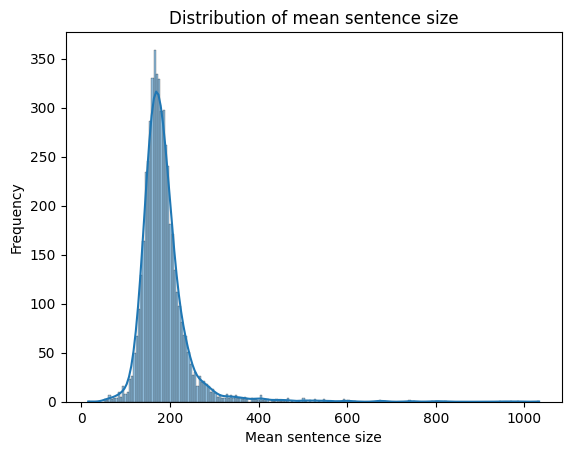

In [76]:
# Mean sentence size
sns.histplot(df_style['mean_sentence_size'], kde=True)

plt.title('Distribution of mean sentence size')
plt.xlabel('Mean sentence size')
plt.ylabel('Frequency')
plt.show()

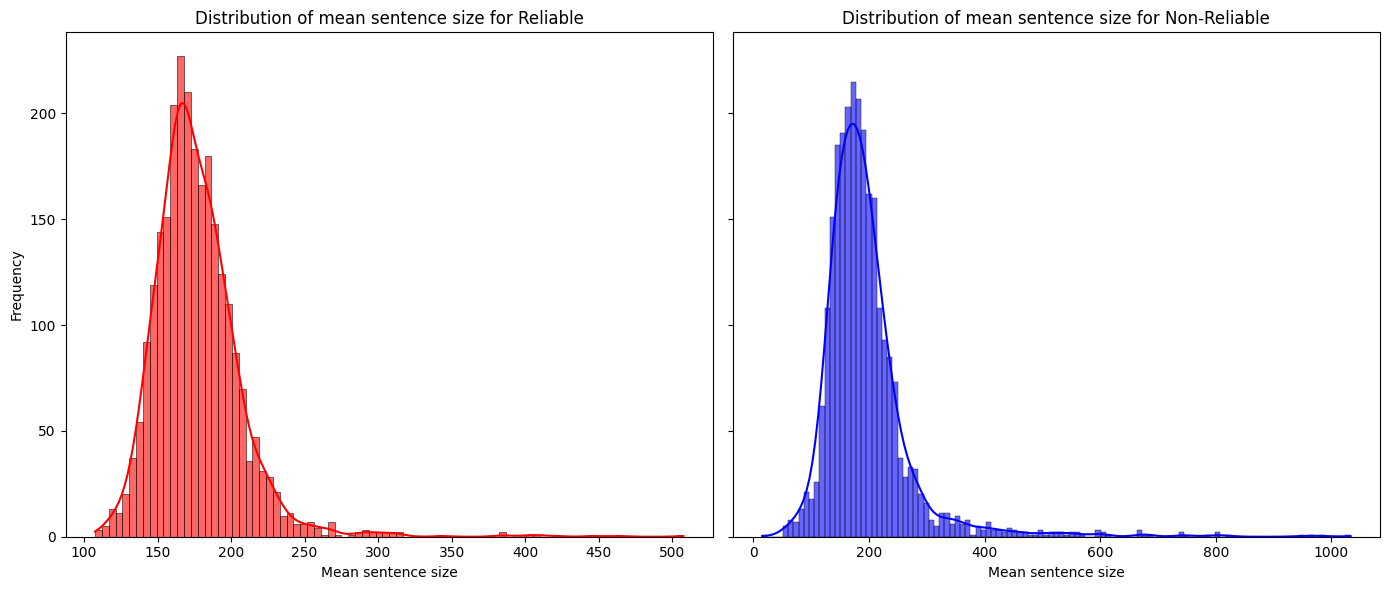

In [77]:
# Mean sentence size: Reliable vs. Non-Reliable
reliable = df_style[df_style['quality'] == 1]
non_reliable = df_style[df_style['quality'] == 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(reliable['mean_sentence_size'], kde=True, color='red', ax=axs[0], alpha=0.6)
axs[0].set_title('Distribution of mean sentence size for Reliable')
axs[0].set_xlabel('Mean sentence size')
axs[0].set_ylabel('Frequency')

sns.histplot(non_reliable['mean_sentence_size'], kde=True, color='blue', ax=axs[1], alpha=0.6)
axs[1].set_title('Distribution of mean sentence size for Non-Reliable')
axs[1].set_xlabel('Mean sentence size')

plt.tight_layout()
plt.show()

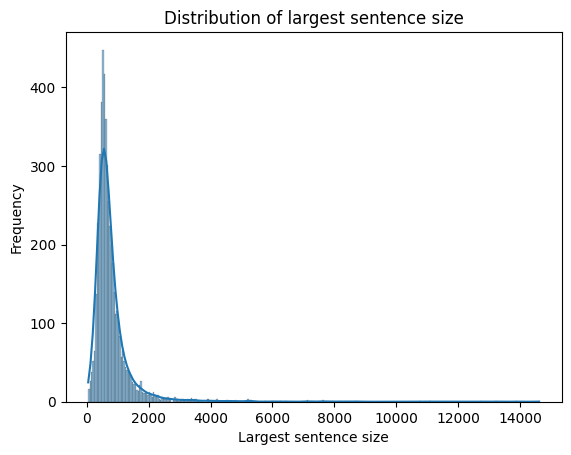

In [78]:
# Largest sentence size
sns.histplot(df_style['largest_sentence_size'], kde=True)

plt.title('Distribution of largest sentence size')
plt.xlabel('Largest sentence size')
plt.ylabel('Frequency')
plt.show()

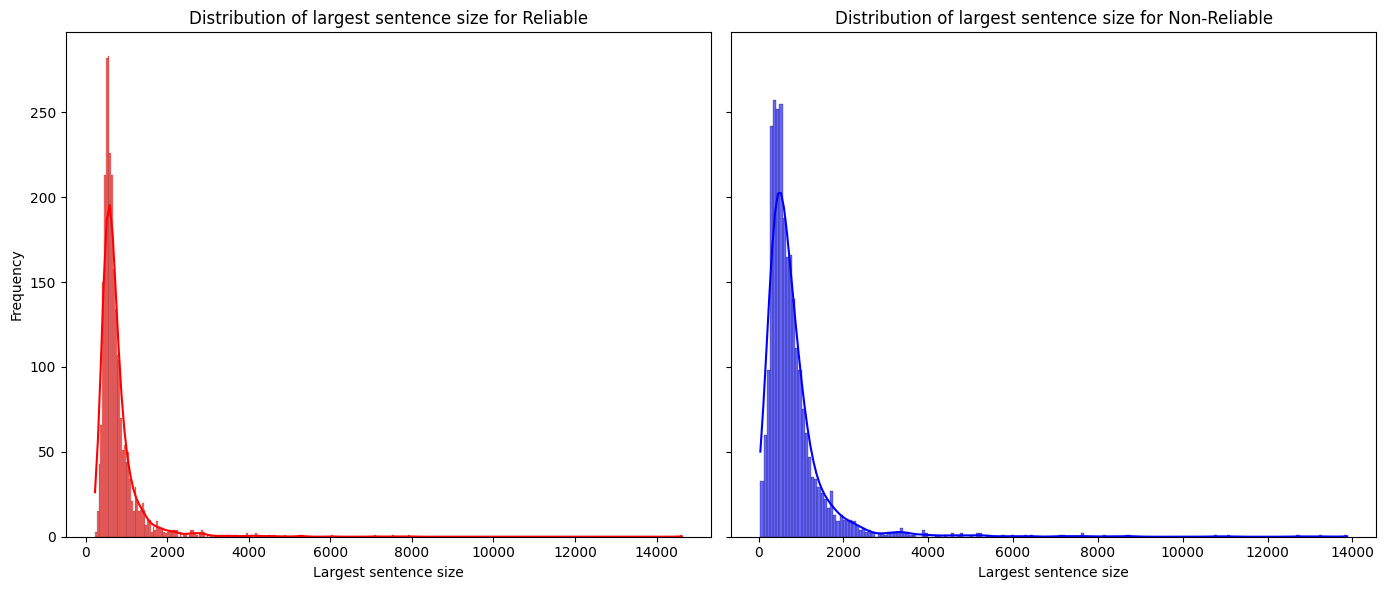

In [79]:
# Largest sentence size: Reliable vs. Non-Reliable
reliable = df_style[df_style['quality'] == 1]
non_reliable = df_style[df_style['quality'] == 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(reliable['largest_sentence_size'], kde=True, color='red', ax=axs[0], alpha=0.6)
axs[0].set_title('Distribution of largest sentence size for Reliable')
axs[0].set_xlabel('Largest sentence size')
axs[0].set_ylabel('Frequency')

sns.histplot(non_reliable['largest_sentence_size'], kde=True, color='blue', ax=axs[1], alpha=0.6)
axs[1].set_title('Distribution of largest sentence size for Non-Reliable')
axs[1].set_xlabel('Largest sentence size')

plt.tight_layout()
plt.show()

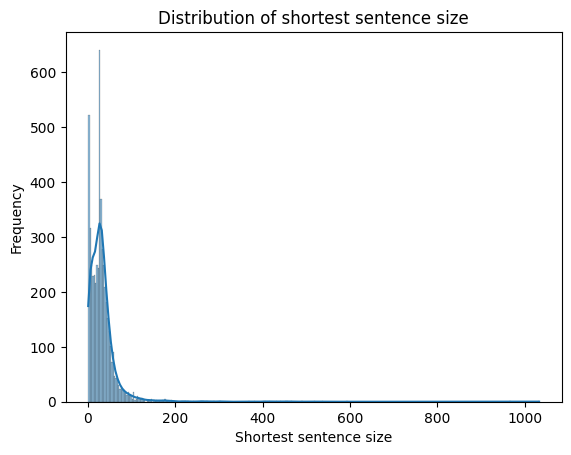

In [80]:
# Shortest sentence size
sns.histplot(df_style['shortest_sentence_size'], kde=True)

plt.title('Distribution of shortest sentence size')
plt.xlabel('Shortest sentence size')
plt.ylabel('Frequency')
plt.show()

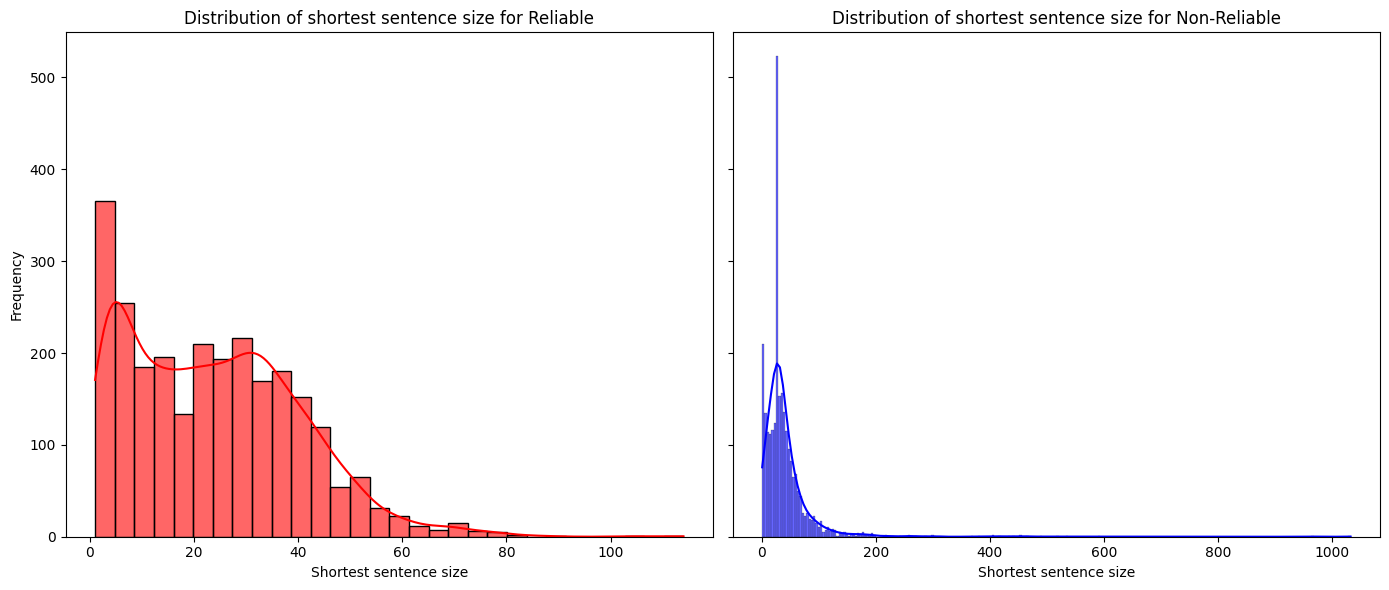

In [81]:
# Shortest sentence size: Reliable vs. Non-Reliable
reliable = df_style[df_style['quality'] == 1]
non_reliable = df_style[df_style['quality'] == 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(reliable['shortest_sentence_size'], kde=True, color='red', ax=axs[0], alpha=0.6)
axs[0].set_title('Distribution of shortest sentence size for Reliable')
axs[0].set_xlabel('Shortest sentence size')
axs[0].set_ylabel('Frequency')

sns.histplot(non_reliable['shortest_sentence_size'], kde=True, color='blue', ax=axs[1], alpha=0.6)
axs[1].set_title('Distribution of shortest sentence size for Non-Reliable')
axs[1].set_xlabel('Shortest sentence size')

plt.tight_layout()
plt.show()

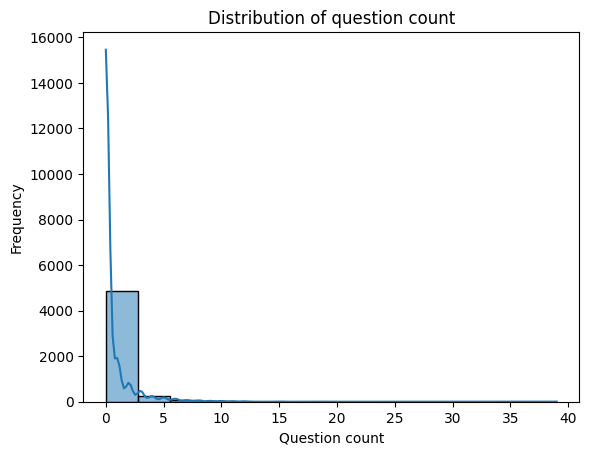

In [82]:
# Question count
sns.histplot(df_style['question_count'], kde=True)

plt.title('Distribution of question count')
plt.xlabel('Question count')
plt.ylabel('Frequency')
plt.show()

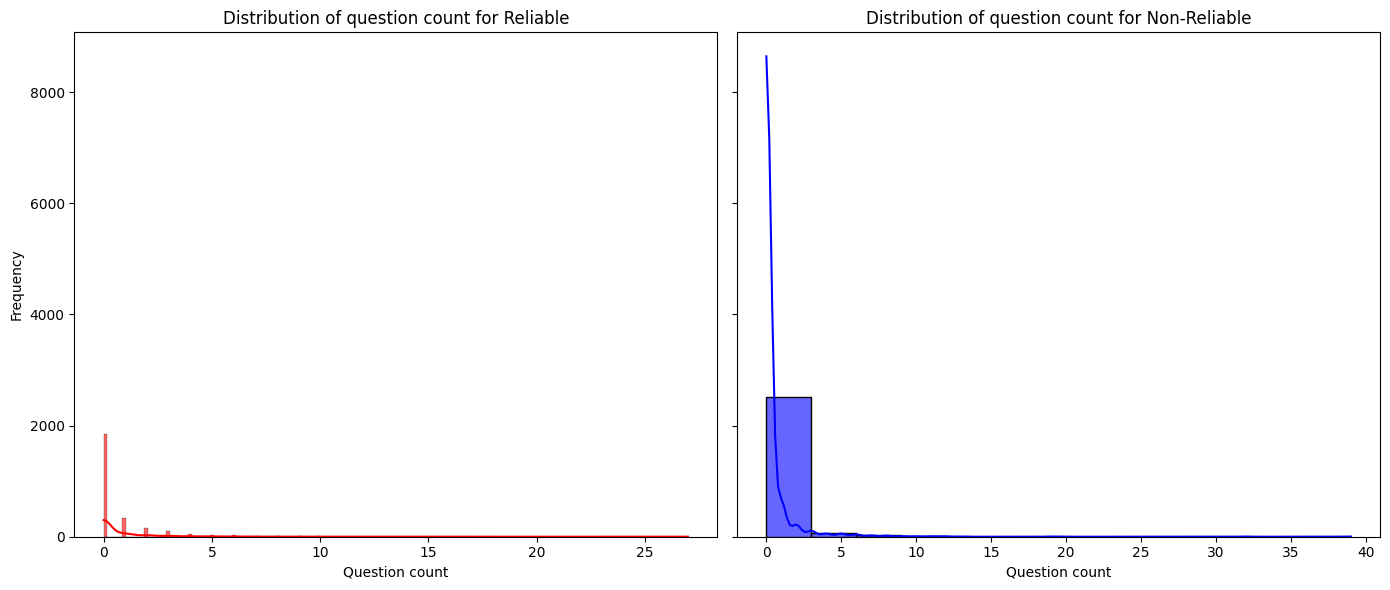

In [83]:
# Question count: Reliable vs. Non-Reliable
reliable = df_style[df_style['quality'] == 1]
non_reliable = df_style[df_style['quality'] == 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(reliable['question_count'], kde=True, color='red', ax=axs[0], alpha=0.6)
axs[0].set_title('Distribution of question count for Reliable')
axs[0].set_xlabel('Question count')
axs[0].set_ylabel('Frequency')

sns.histplot(non_reliable['question_count'], kde=True, color='blue', ax=axs[1], alpha=0.6)
axs[1].set_title('Distribution of question count for Non-Reliable')
axs[1].set_xlabel('Question count')

plt.tight_layout()
plt.show()

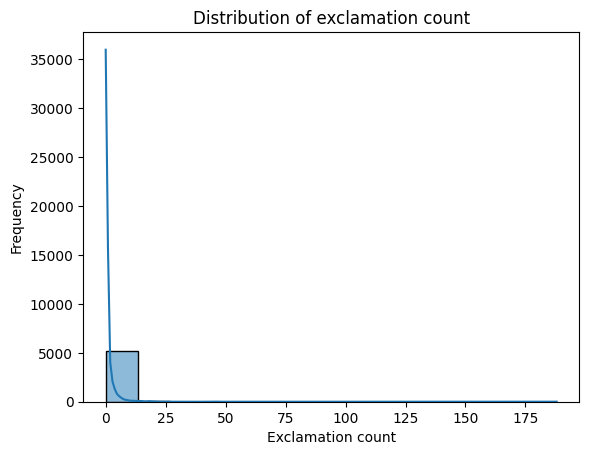

In [84]:
# Exclamation count
sns.histplot(df_style['exclamation_count'], kde=True)

plt.title('Distribution of exclamation count')
plt.xlabel('Exclamation count')
plt.ylabel('Frequency')
plt.show()

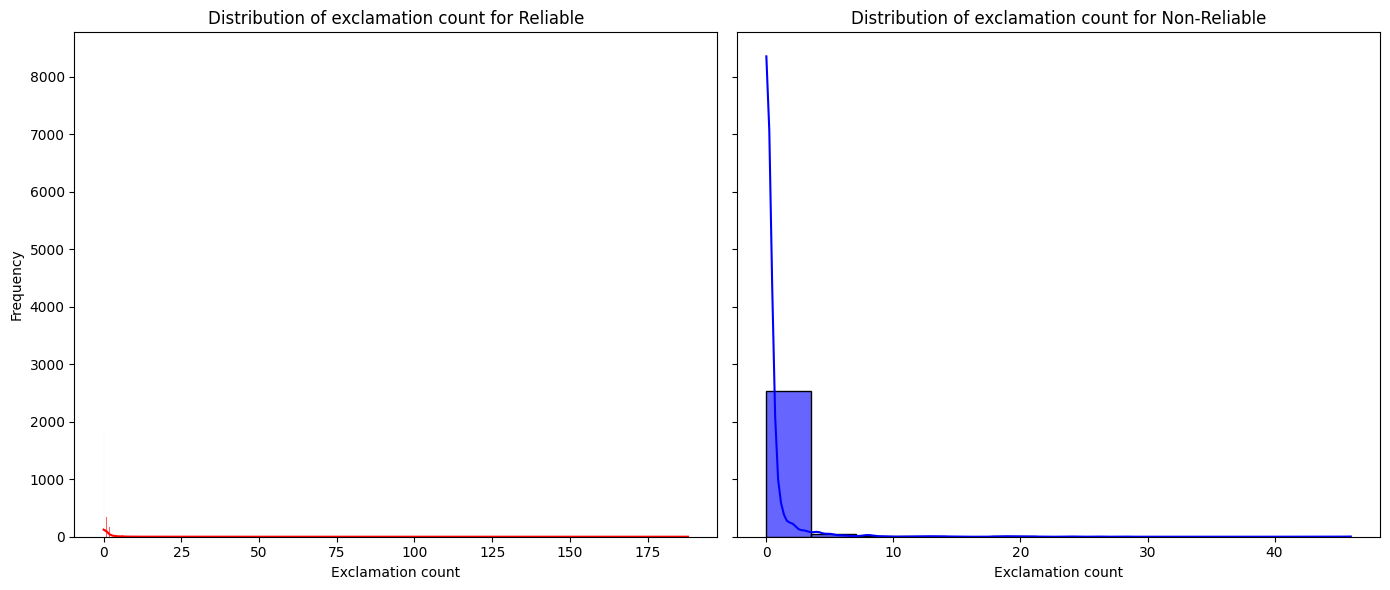

In [85]:
# Exclamation count: Reliable vs. Non-Reliable
reliable = df_style[df_style['quality'] == 1]
non_reliable = df_style[df_style['quality'] == 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(reliable['exclamation_count'], kde=True, color='red', ax=axs[0], alpha=0.6)
axs[0].set_title('Distribution of exclamation count for Reliable')
axs[0].set_xlabel('Exclamation count')
axs[0].set_ylabel('Frequency')

sns.histplot(non_reliable['exclamation_count'], kde=True, color='blue', ax=axs[1], alpha=0.6)
axs[1].set_title('Distribution of exclamation count for Non-Reliable')
axs[1].set_xlabel('Exclamation count')

plt.tight_layout()
plt.show()

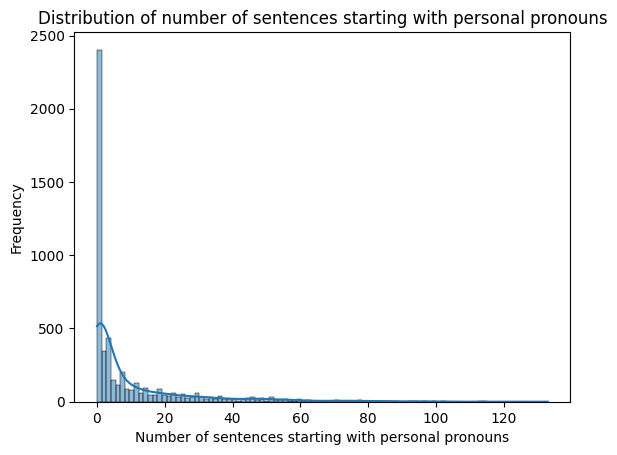

In [87]:
# Number of sentences starting with personal pronouns
sns.histplot(df_style['pronoun_start_count'], kde=True)

plt.title('Distribution of number of sentences starting with personal pronouns')
plt.xlabel('Number of sentences starting with personal pronouns')
plt.ylabel('Frequency')
plt.show()

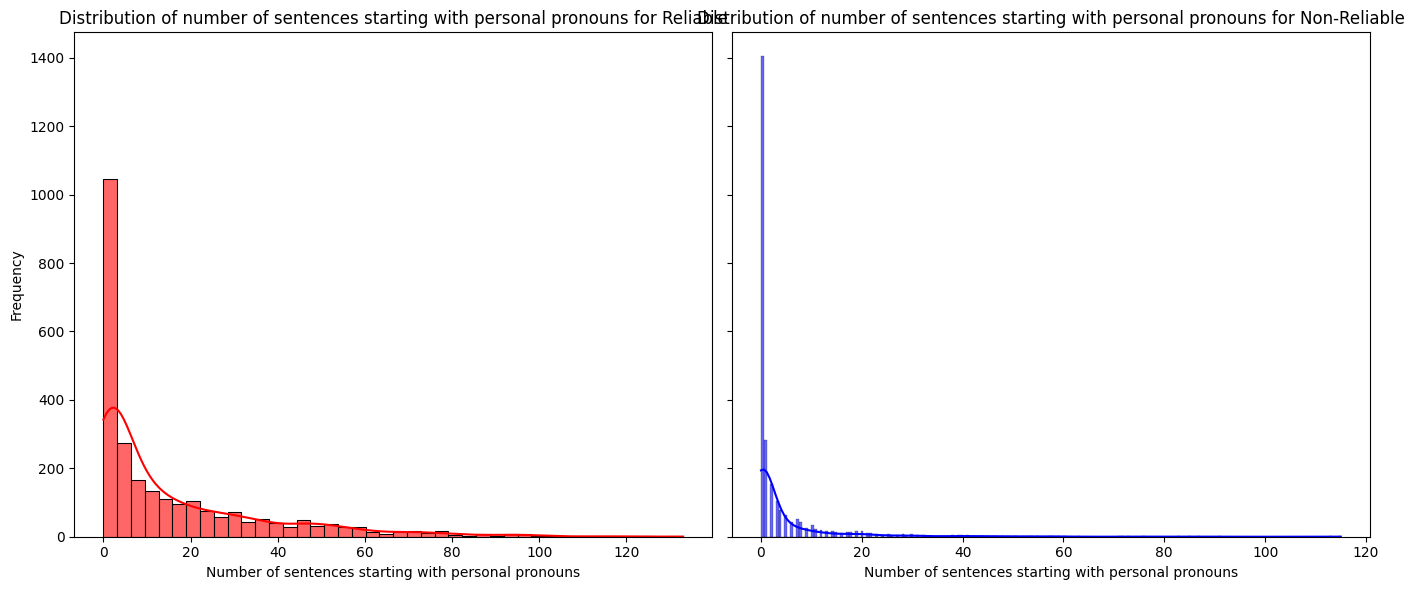

In [88]:
# Number of sentences starting with personal pronouns: Reliable vs. Non-Reliable
reliable = df_style[df_style['quality'] == 1]
non_reliable = df_style[df_style['quality'] == 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(reliable['pronoun_start_count'], kde=True, color='red', ax=axs[0], alpha=0.6)
axs[0].set_title('Distribution of number of sentences starting with personal pronouns for Reliable')
axs[0].set_xlabel('Number of sentences starting with personal pronouns')
axs[0].set_ylabel('Frequency')

sns.histplot(non_reliable['pronoun_start_count'], kde=True, color='blue', ax=axs[1], alpha=0.6)
axs[1].set_title('Distribution of number of sentences starting with personal pronouns for Non-Reliable')
axs[1].set_xlabel('Number of sentences starting with personal pronouns')

plt.tight_layout()
plt.show()

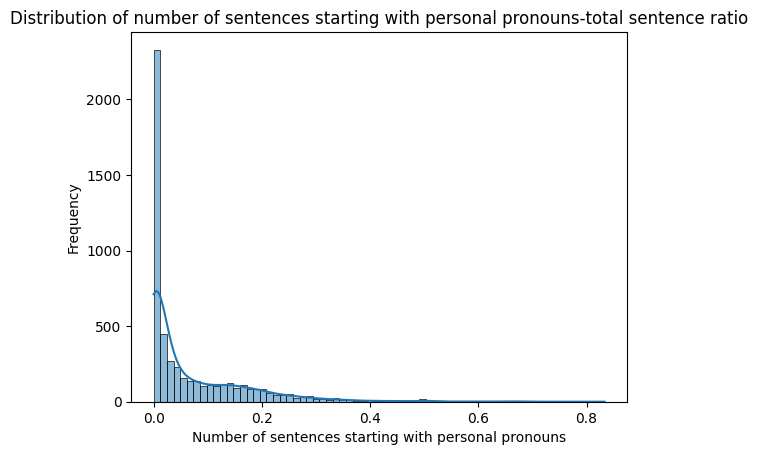

In [90]:
# Number of sentences starting with personal pronouns-total sentence ratio
sns.histplot(df_style['pronoun_start_count_sentence_ratio'], kde=True)

plt.title('Distribution of number of sentences starting with personal pronouns-total sentence ratio')
plt.xlabel('Number of sentences starting with personal pronouns')
plt.ylabel('Frequency')
plt.show()

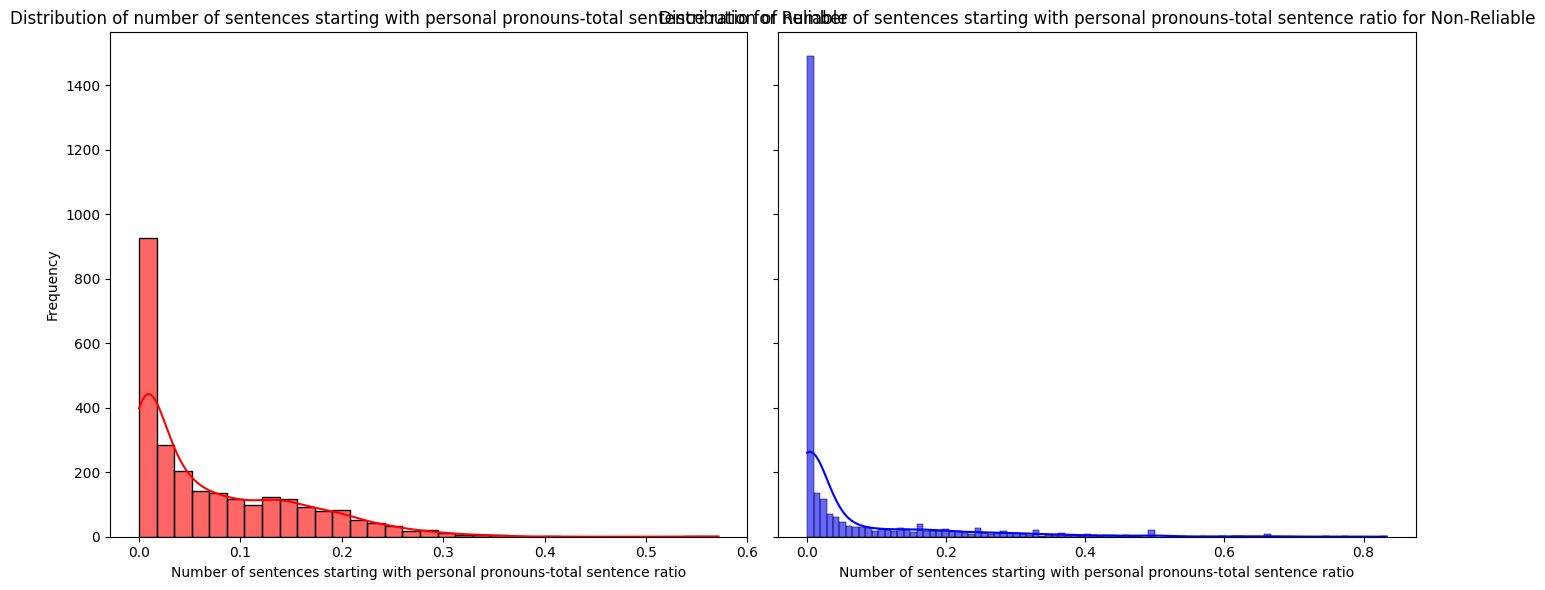

In [91]:
# Number of sentences starting with personal pronouns-total sentence ratio: Reliable vs. Non-Reliable
reliable = df_style[df_style['quality'] == 1]
non_reliable = df_style[df_style['quality'] == 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(reliable['pronoun_start_count_sentence_ratio'], kde=True, color='red', ax=axs[0], alpha=0.6)
axs[0].set_title('Distribution of number of sentences starting with personal pronouns-total sentence ratio for Reliable')
axs[0].set_xlabel('Number of sentences starting with personal pronouns-total sentence ratio')
axs[0].set_ylabel('Frequency')

sns.histplot(non_reliable['pronoun_start_count_sentence_ratio'], kde=True, color='blue', ax=axs[1], alpha=0.6)
axs[1].set_title('Distribution of number of sentences starting with personal pronouns-total sentence ratio for Non-Reliable')
axs[1].set_xlabel('Number of sentences starting with personal pronouns-total sentence ratio')

plt.tight_layout()
plt.show()

- Mostly hard to see the difference between Reliabe vs. Non-Reliable
- mean sentence size, largest sentence size, question count, exclamation count, personal pronouns, personal pronouns ratio

__readability features__

In [92]:
df_readability

ARI    CLI    FRE   FKG    GFI    LIX  SMOG  quality
0     16.0  13.93  48.54  12.1  12.37  58.11  14.2        1
1     16.0  12.36  54.36  11.9  12.85  56.87  14.0        1
2     13.5  12.47  51.38  11.0  11.01  50.89  13.2        1
3     13.1  11.14  58.62  10.3  11.39  50.05  11.6        1
4     13.9  12.53  50.67  11.3  10.54  53.09  14.1        1
...    ...    ...    ...   ...    ...    ...   ...      ...
5195  14.8  13.29  41.09  12.9  13.81  55.37  15.4        0
5196   9.6   8.65  77.77   7.1  10.72  37.47  10.1        0
5197  10.5  10.72  72.87   6.9   8.73  39.21   9.7        0
5198   4.9   5.65  79.97   4.2   5.22  26.90   8.1        0
5199  13.6  14.44  30.26  12.9  12.29  53.52  14.5        0

[5200 rows x 8 columns]

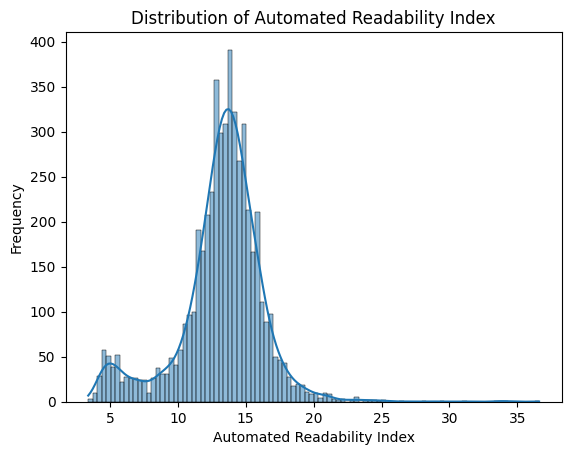

In [93]:
# Automated Readability Index
sns.histplot(df_readability['ARI'], kde=True)

plt.title('Distribution of Automated Readability Index')
plt.xlabel('Automated Readability Index')
plt.ylabel('Frequency')
plt.show()

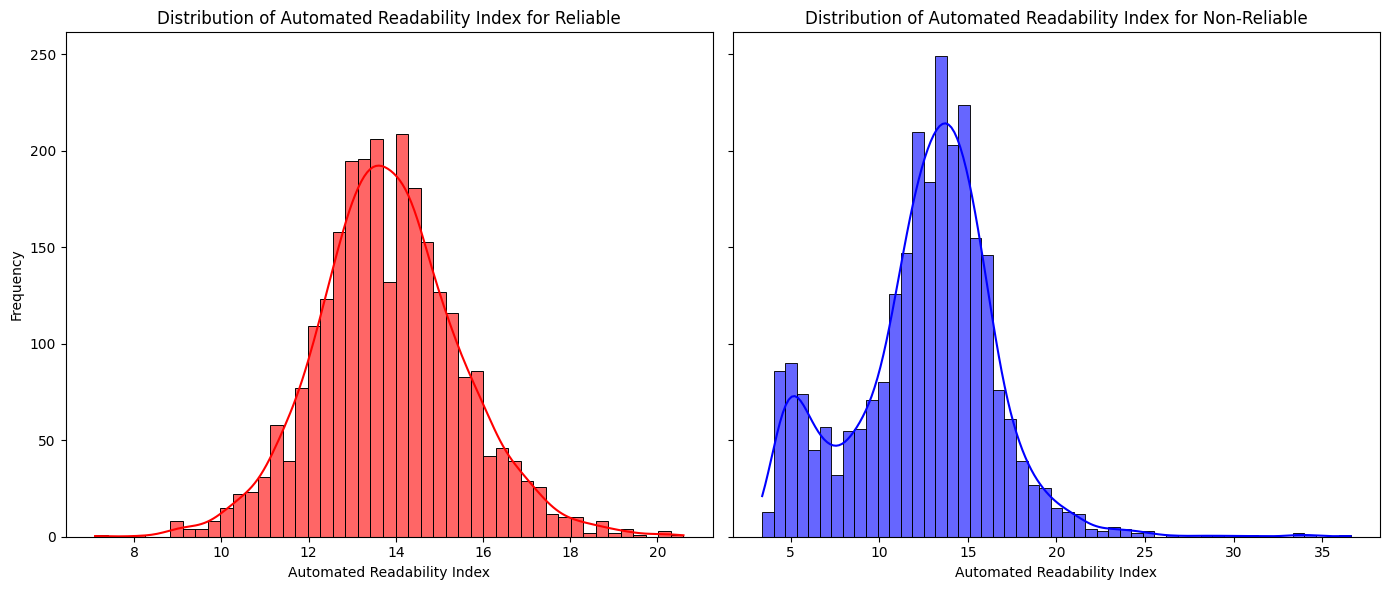

In [94]:
# Automated Readability Index: Reliable vs. Non-Reliable
reliable = df_readability[df_readability['quality'] == 1]
non_reliable = df_readability[df_readability['quality'] == 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(reliable['ARI'], kde=True, color='red', ax=axs[0], alpha=0.6)
axs[0].set_title('Distribution of Automated Readability Index for Reliable')
axs[0].set_xlabel('Automated Readability Index')
axs[0].set_ylabel('Frequency')

sns.histplot(non_reliable['ARI'], kde=True, color='blue', ax=axs[1], alpha=0.6)
axs[1].set_title('Distribution of Automated Readability Index for Non-Reliable')
axs[1].set_xlabel('Automated Readability Index')

plt.tight_layout()
plt.show()

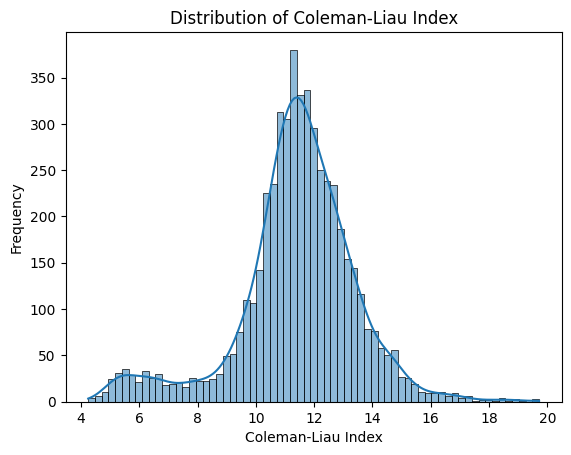

In [95]:
# Coleman-Liau Index
sns.histplot(df_readability['CLI'], kde=True)

plt.title('Distribution of Coleman-Liau Index')
plt.xlabel('Coleman-Liau Index')
plt.ylabel('Frequency')
plt.show()

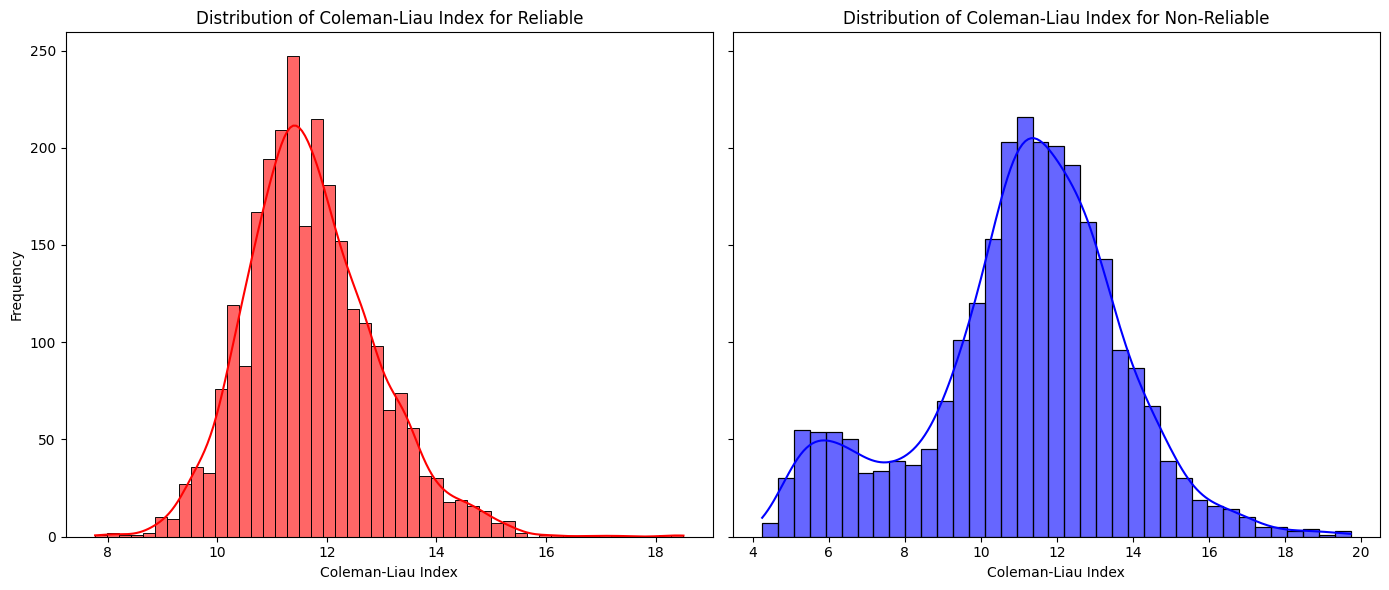

In [96]:
# Coleman-Liau Index: Reliable vs. Non-Reliable
reliable = df_readability[df_readability['quality'] == 1]
non_reliable = df_readability[df_readability['quality'] == 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(reliable['CLI'], kde=True, color='red', ax=axs[0], alpha=0.6)
axs[0].set_title('Distribution of Coleman-Liau Index for Reliable')
axs[0].set_xlabel('Coleman-Liau Index')
axs[0].set_ylabel('Frequency')

sns.histplot(non_reliable['CLI'], kde=True, color='blue', ax=axs[1], alpha=0.6)
axs[1].set_title('Distribution of Coleman-Liau Index for Non-Reliable')
axs[1].set_xlabel('Coleman-Liau Index')

plt.tight_layout()
plt.show()

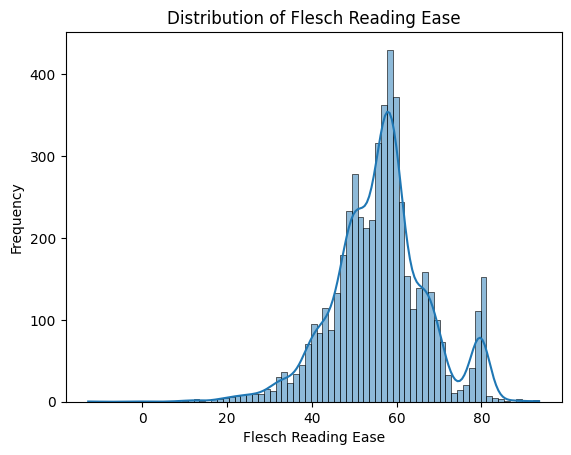

In [97]:
# Flesch Reading Ease
sns.histplot(df_readability['FRE'], kde=True)

plt.title('Distribution of Flesch Reading Ease')
plt.xlabel('Flesch Reading Ease')
plt.ylabel('Frequency')
plt.show()

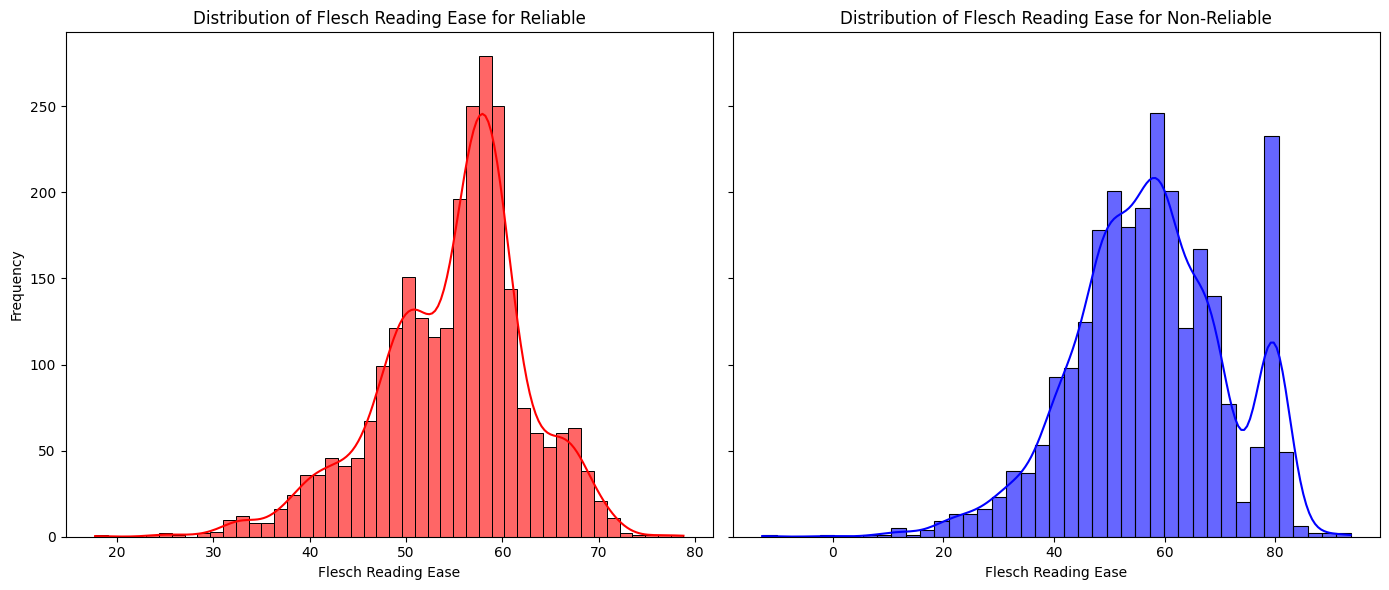

In [98]:
# Flesch Reading Ease: Reliable vs. Non-Reliable
reliable = df_readability[df_readability['quality'] == 1]
non_reliable = df_readability[df_readability['quality'] == 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(reliable['FRE'], kde=True, color='red', ax=axs[0], alpha=0.6)
axs[0].set_title('Distribution of Flesch Reading Ease for Reliable')
axs[0].set_xlabel('Flesch Reading Ease')
axs[0].set_ylabel('Frequency')

sns.histplot(non_reliable['FRE'], kde=True, color='blue', ax=axs[1], alpha=0.6)
axs[1].set_title('Distribution of Flesch Reading Ease for Non-Reliable')
axs[1].set_xlabel('Flesch Reading Ease')

plt.tight_layout()
plt.show()

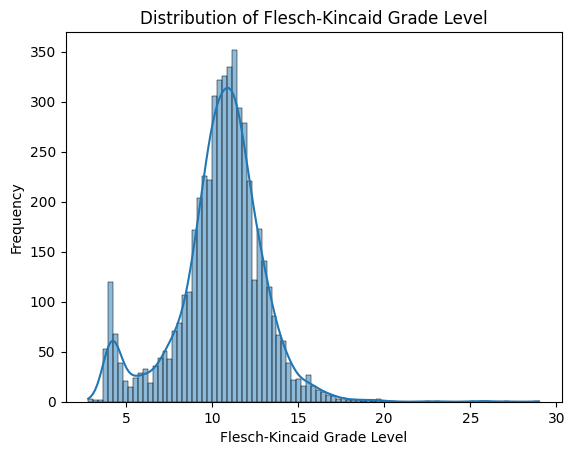

In [99]:
# Flesch-Kincaid Grade Level
sns.histplot(df_readability['FKG'], kde=True)

plt.title('Distribution of Flesch-Kincaid Grade Level')
plt.xlabel('Flesch-Kincaid Grade Level')
plt.ylabel('Frequency')
plt.show()

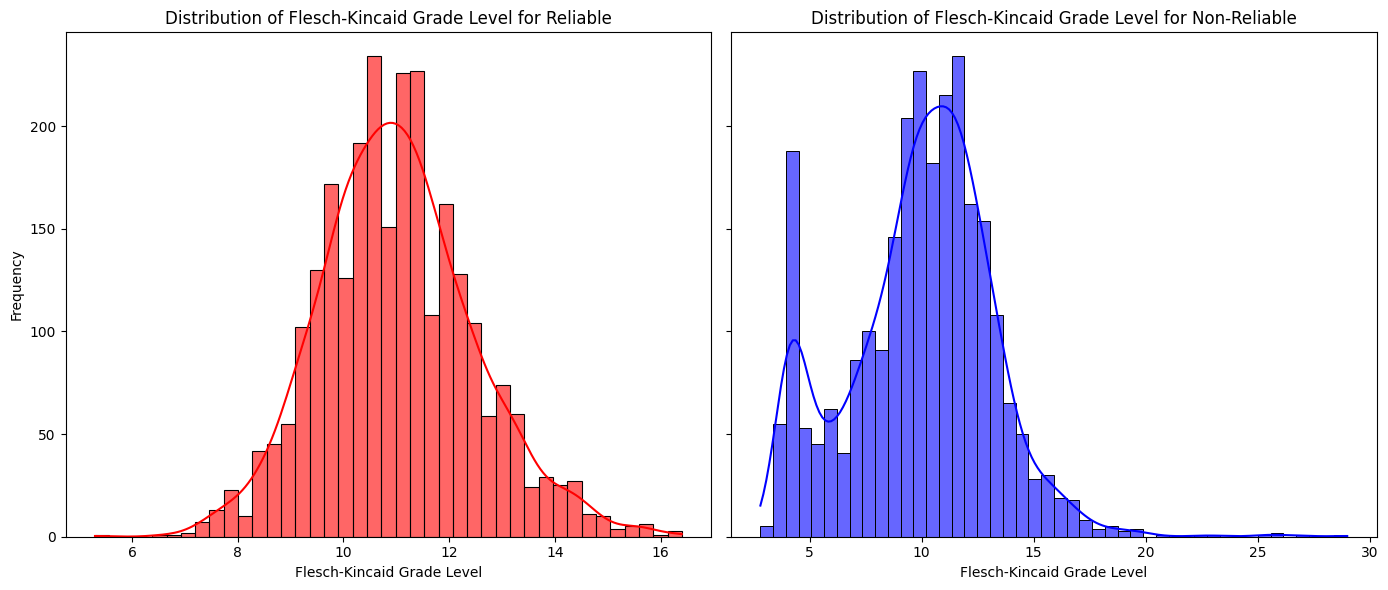

In [100]:
# Flesch-Kincaid Grade Level: Reliable vs. Non-Reliable
reliable = df_readability[df_readability['quality'] == 1]
non_reliable = df_readability[df_readability['quality'] == 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(reliable['FKG'], kde=True, color='red', ax=axs[0], alpha=0.6)
axs[0].set_title('Distribution of Flesch-Kincaid Grade Level for Reliable')
axs[0].set_xlabel('Flesch-Kincaid Grade Level')
axs[0].set_ylabel('Frequency')

sns.histplot(non_reliable['FKG'], kde=True, color='blue', ax=axs[1], alpha=0.6)
axs[1].set_title('Distribution of Flesch-Kincaid Grade Level for Non-Reliable')
axs[1].set_xlabel('Flesch-Kincaid Grade Level')

plt.tight_layout()
plt.show()

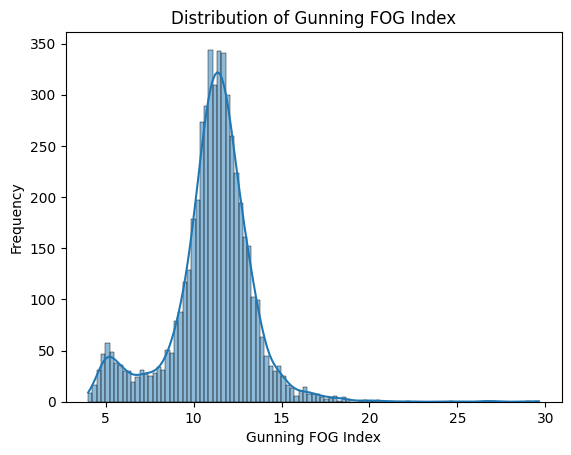

In [101]:
# Gunning FOG Index
sns.histplot(df_readability['GFI'], kde=True)

plt.title('Distribution of Gunning FOG Index')
plt.xlabel('Gunning FOG Index')
plt.ylabel('Frequency')
plt.show()

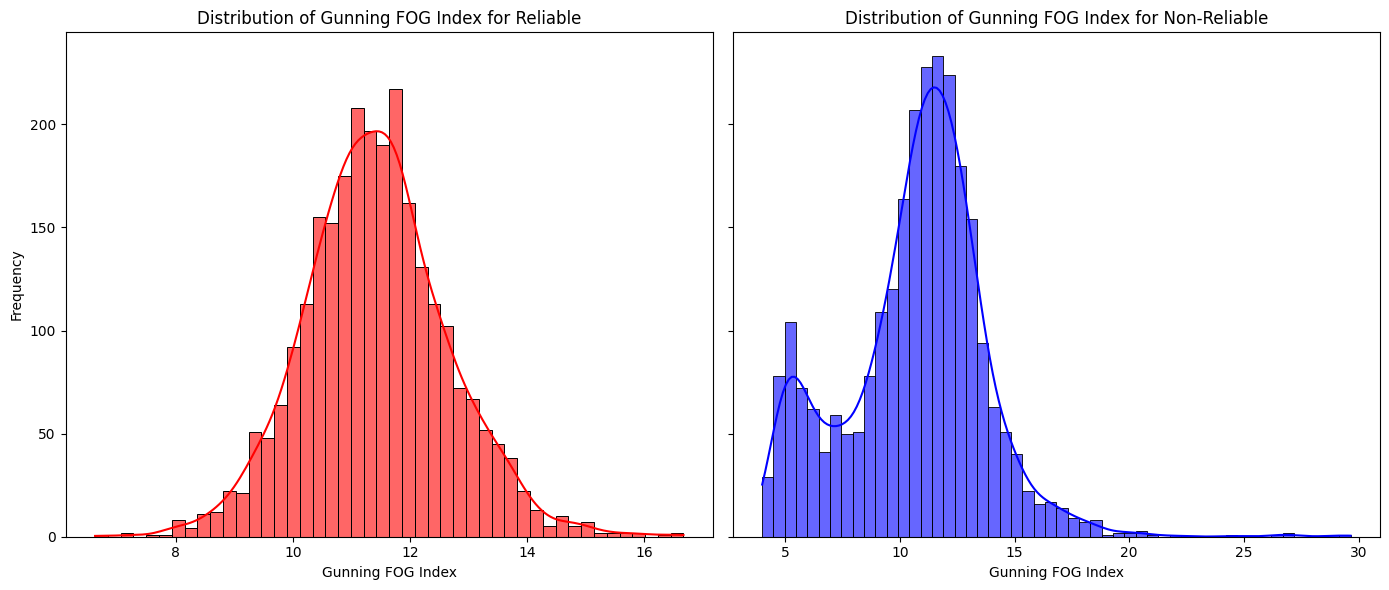

In [102]:
# Gunning FOG Index: Reliable vs. Non-Reliable
reliable = df_readability[df_readability['quality'] == 1]
non_reliable = df_readability[df_readability['quality'] == 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(reliable['GFI'], kde=True, color='red', ax=axs[0], alpha=0.6)
axs[0].set_title('Distribution of Gunning FOG Index for Reliable')
axs[0].set_xlabel('Gunning FOG Index')
axs[0].set_ylabel('Frequency')

sns.histplot(non_reliable['GFI'], kde=True, color='blue', ax=axs[1], alpha=0.6)
axs[1].set_title('Distribution of Gunning FOG Index for Non-Reliable')
axs[1].set_xlabel('Gunning FOG Index')

plt.tight_layout()
plt.show()

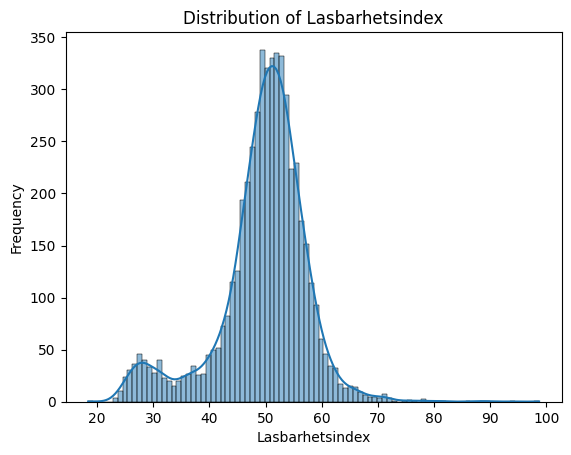

In [103]:
# Lasbarhetsindex
sns.histplot(df_readability['LIX'], kde=True)

plt.title('Distribution of Lasbarhetsindex')
plt.xlabel('Lasbarhetsindex')
plt.ylabel('Frequency')
plt.show()

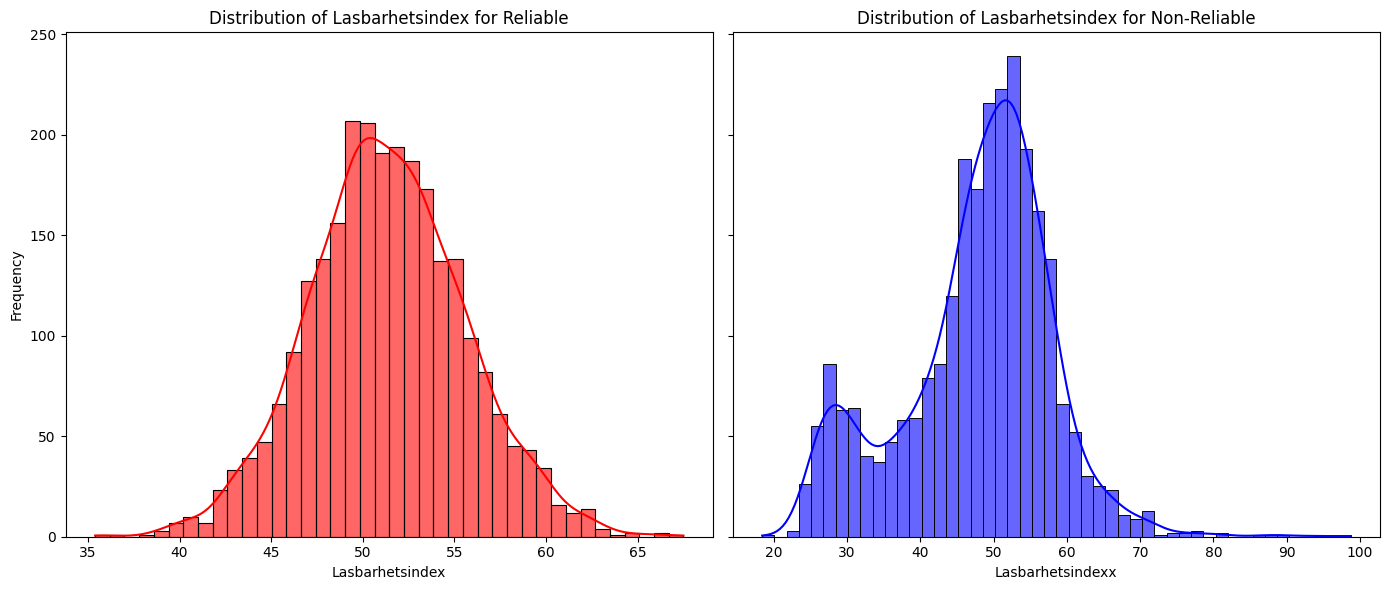

In [104]:
# Lasbarhetsindex: Reliable vs. Non-Reliable
reliable = df_readability[df_readability['quality'] == 1]
non_reliable = df_readability[df_readability['quality'] == 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(reliable['LIX'], kde=True, color='red', ax=axs[0], alpha=0.6)
axs[0].set_title('Distribution of Lasbarhetsindex for Reliable')
axs[0].set_xlabel('Lasbarhetsindex')
axs[0].set_ylabel('Frequency')

sns.histplot(non_reliable['LIX'], kde=True, color='blue', ax=axs[1], alpha=0.6)
axs[1].set_title('Distribution of Lasbarhetsindex for Non-Reliable')
axs[1].set_xlabel('Lasbarhetsindexx')

plt.tight_layout()
plt.show()

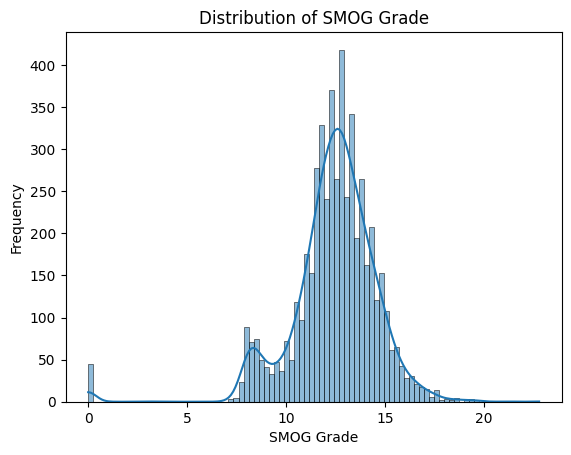

In [105]:
# SMOG Grade
sns.histplot(df_readability['SMOG'], kde=True)

plt.title('Distribution of SMOG Grade')
plt.xlabel('SMOG Grade')
plt.ylabel('Frequency')
plt.show()

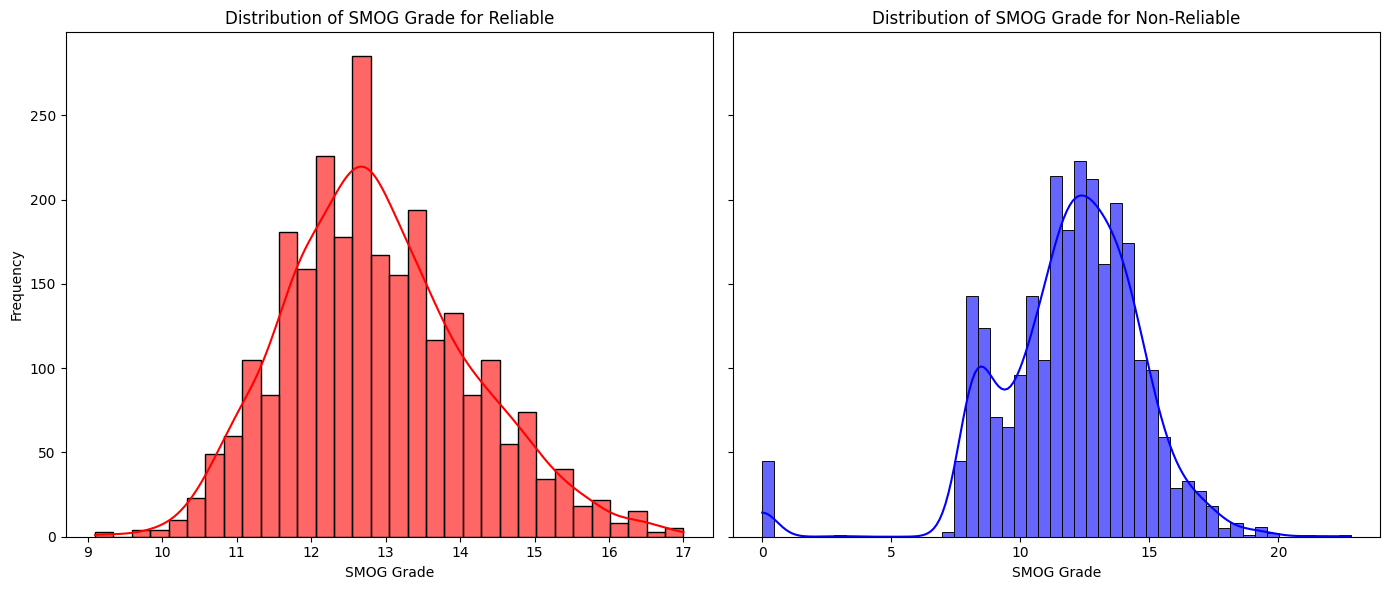

In [106]:
# SMOG Grade: Reliable vs. Non-Reliable
reliable = df_readability[df_readability['quality'] == 1]
non_reliable = df_readability[df_readability['quality'] == 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(reliable['SMOG'], kde=True, color='red', ax=axs[0], alpha=0.6)
axs[0].set_title('Distribution of SMOG Grade for Reliable')
axs[0].set_xlabel('SMOG Grade')
axs[0].set_ylabel('Frequency')

sns.histplot(non_reliable['SMOG'], kde=True, color='blue', ax=axs[1], alpha=0.6)
axs[1].set_title('Distribution of SMOG Grade for Non-Reliable')
axs[1].set_xlabel('SMOG Grade')

plt.tight_layout()
plt.show()

- Hard to see the difference between Reliable vs. Non-Reliable in most cases

__edit features__

In [107]:
df_edit

article_age_days  num_edits  num_editors  num_registered_editors  \
0                 7807       2533          832                     466   
1                 7752       3947         1377                     657   
2                 7811       2318         1104                     486   
3                 7730        763          376                     282   
4                 8368       6417         2647                    1281   
...                ...        ...          ...                     ...   
5195              7657         89           53                      41   
5196              7943         34           29                      27   
5197              7662         45           34                      30   
5198              7923         72           47                      44   
5199              8159        151           99                      68   

      num_anonymous_editors  num_occasional_editors  edit_per_day  \
0                       366                     719      0.324452   
1                       720                    1136      0.509159   
2                       618                     971      0.296761   
3                        94                     334      0.098706   
4                      1366                    2296      0.766850   
...                     ...                     ...           ...   
5195                     12                      46      0.011623   
5196                      2                      29      0.004280   
5197                      4                      32      0.005873   
5198                      3                      42      0.009087   
5199                     31                      86      0.018507   

      edit_per_editor  revert_count  discussion_count  quality  
0            3.044471           415               472        1  
1            2.866376           721               970        1  
2            2.099638           228               218        1  
3            2.029255            86                54        1  
4            2.424254          1112               847        1  
...               ...           ...               ...      ...  
5195         1.679245             3                12        0  
5196         1.172414             1                 3        0  
5197         1.323529             2                 3        0  
5198         1.531915             0                 6        0  
5199         1.525253            19                22        0  

[5200 rows x 11 columns]

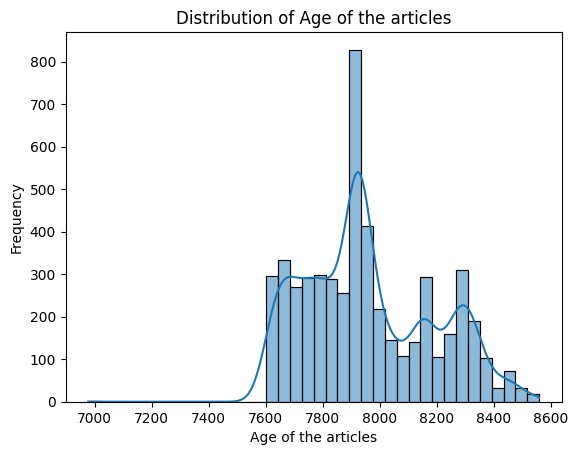

In [109]:
# Age of the articles
sns.histplot(df_edit['article_age_days'], kde=True)

plt.title('Distribution of Age of the articles')
plt.xlabel('Age of the articles')
plt.ylabel('Frequency')
plt.show()

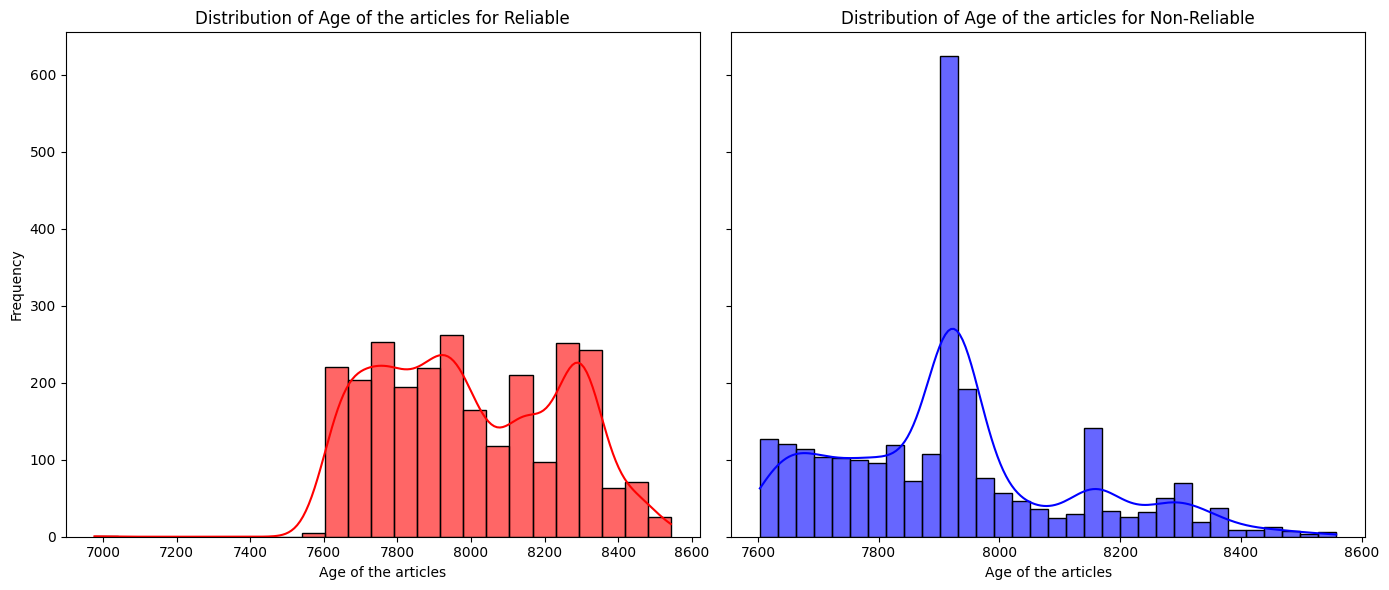

In [110]:
# Age of the articles: Reliable vs. Non-Reliable
reliable = df_edit[df_edit['quality'] == 1]
non_reliable = df_edit[df_edit['quality'] == 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(reliable['article_age_days'], kde=True, color='red', ax=axs[0], alpha=0.6)
axs[0].set_title('Distribution of Age of the articles for Reliable')
axs[0].set_xlabel('Age of the articles')
axs[0].set_ylabel('Frequency')

sns.histplot(non_reliable['article_age_days'], kde=True, color='blue', ax=axs[1], alpha=0.6)
axs[1].set_title('Distribution of Age of the articles for Non-Reliable')
axs[1].set_xlabel('Age of the articles')

plt.tight_layout()
plt.show()

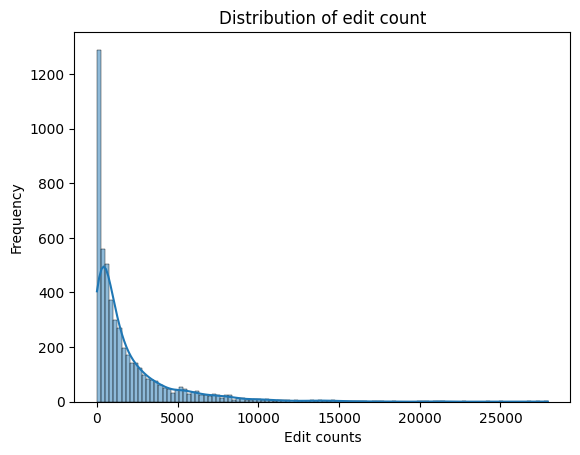

In [111]:
# Edit count
sns.histplot(df_edit['num_edits'], kde=True)

plt.title('Distribution of edit count')
plt.xlabel('Edit counts')
plt.ylabel('Frequency')
plt.show()

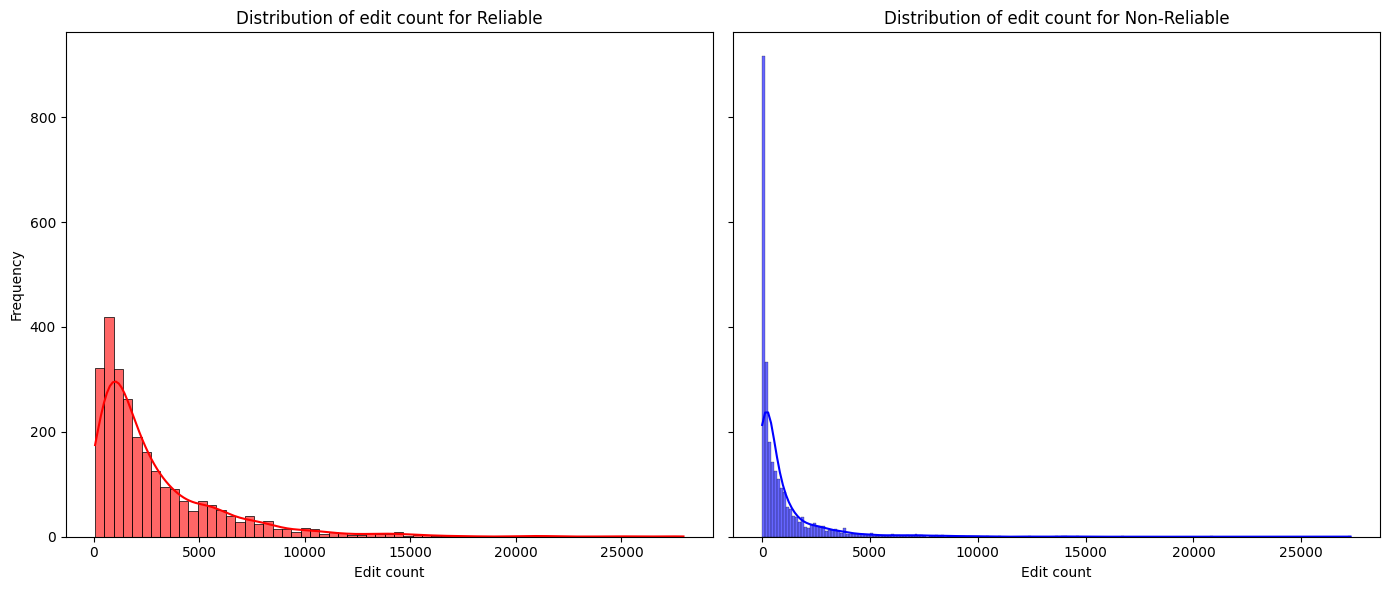

In [112]:
# Edit count: Reliable vs. Non-Reliable
reliable = df_edit[df_edit['quality'] == 1]
non_reliable = df_edit[df_edit['quality'] == 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(reliable['num_edits'], kde=True, color='red', ax=axs[0], alpha=0.6)
axs[0].set_title('Distribution of edit count for Reliable')
axs[0].set_xlabel('Edit count')
axs[0].set_ylabel('Frequency')

sns.histplot(non_reliable['num_edits'], kde=True, color='blue', ax=axs[1], alpha=0.6)
axs[1].set_title('Distribution of edit count for Non-Reliable')
axs[1].set_xlabel('Edit count')

plt.tight_layout()
plt.show()

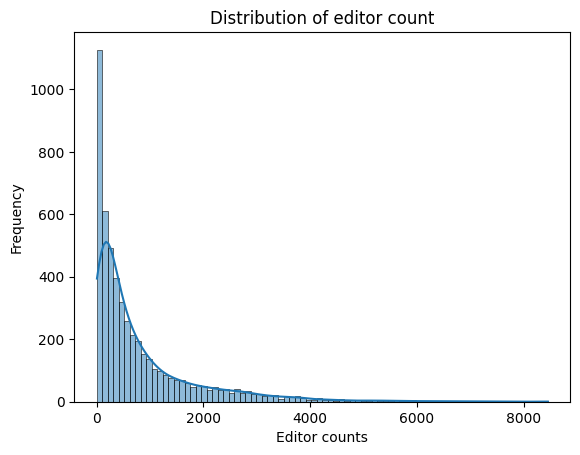

In [113]:
# Editor count
sns.histplot(df_edit['num_editors'], kde=True)

plt.title('Distribution of editor count')
plt.xlabel('Editor counts')
plt.ylabel('Frequency')
plt.show()

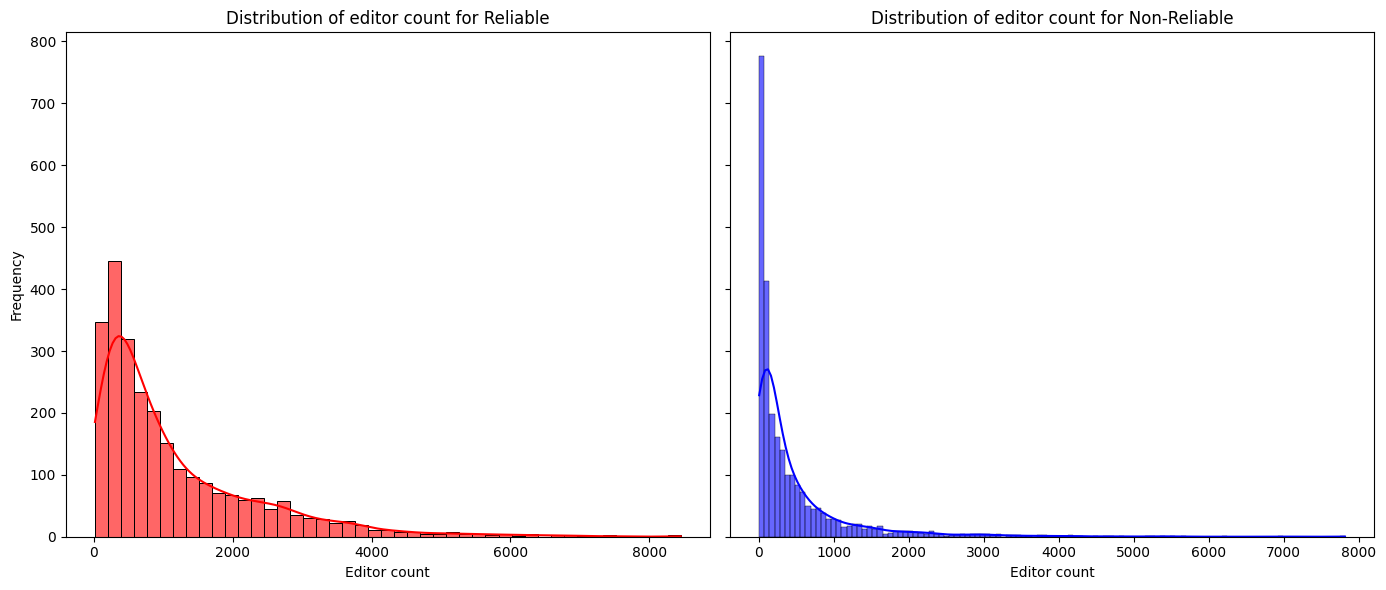

In [114]:
# Editor count: Reliable vs. Non-Reliable
reliable = df_edit[df_edit['quality'] == 1]
non_reliable = df_edit[df_edit['quality'] == 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(reliable['num_editors'], kde=True, color='red', ax=axs[0], alpha=0.6)
axs[0].set_title('Distribution of editor count for Reliable')
axs[0].set_xlabel('Editor count')
axs[0].set_ylabel('Frequency')

sns.histplot(non_reliable['num_editors'], kde=True, color='blue', ax=axs[1], alpha=0.6)
axs[1].set_title('Distribution of editor count for Non-Reliable')
axs[1].set_xlabel('Editor count')

plt.tight_layout()
plt.show()

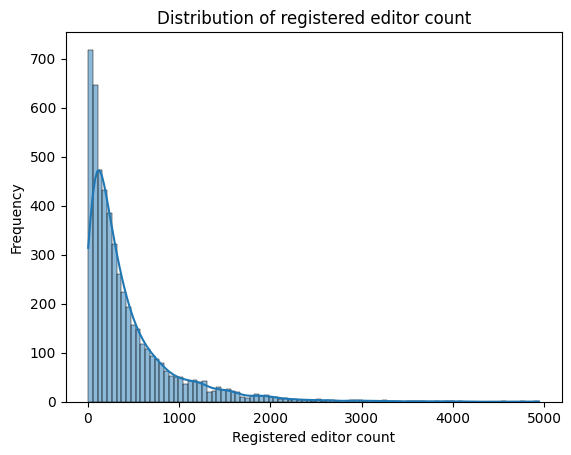

In [115]:
# Registered editor count
sns.histplot(df_edit['num_registered_editors'], kde=True)

plt.title('Distribution of registered editor count')
plt.xlabel('Registered editor count')
plt.ylabel('Frequency')
plt.show()

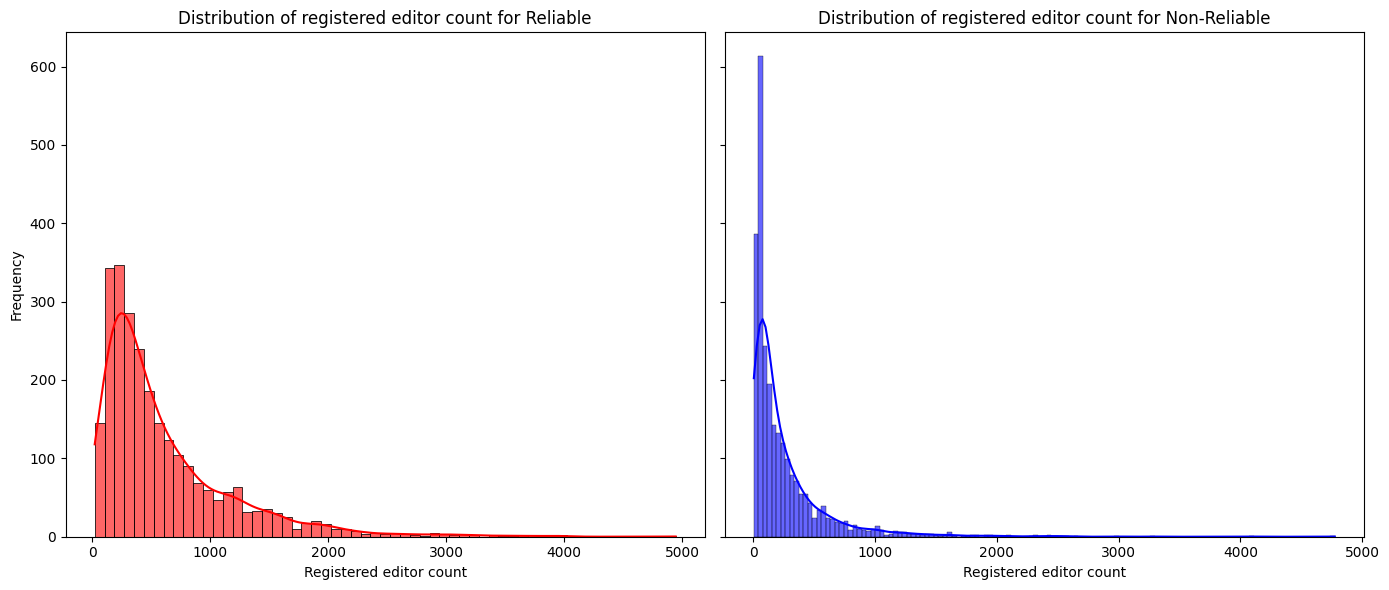

In [116]:
# Registered editor count: Reliable vs. Non-Reliable
reliable = df_edit[df_edit['quality'] == 1]
non_reliable = df_edit[df_edit['quality'] == 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(reliable['num_registered_editors'], kde=True, color='red', ax=axs[0], alpha=0.6)
axs[0].set_title('Distribution of registered editor count for Reliable')
axs[0].set_xlabel('Registered editor count')
axs[0].set_ylabel('Frequency')

sns.histplot(non_reliable['num_registered_editors'], kde=True, color='blue', ax=axs[1], alpha=0.6)
axs[1].set_title('Distribution of registered editor count for Non-Reliable')
axs[1].set_xlabel('Registered editor count')

plt.tight_layout()
plt.show()

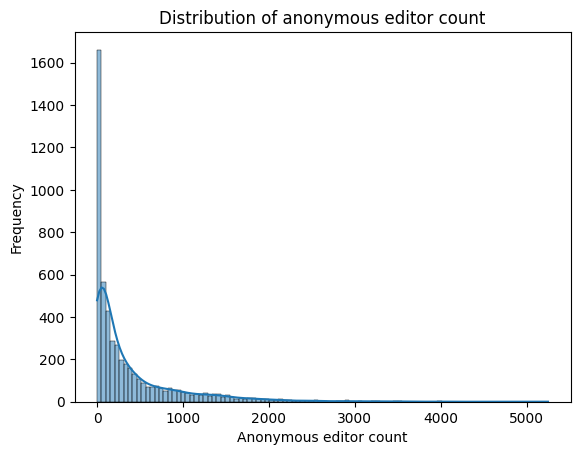

In [117]:
# Anonymous editor count
sns.histplot(df_edit['num_anonymous_editors'], kde=True)

plt.title('Distribution of anonymous editor count')
plt.xlabel('Anonymous editor count')
plt.ylabel('Frequency')
plt.show()

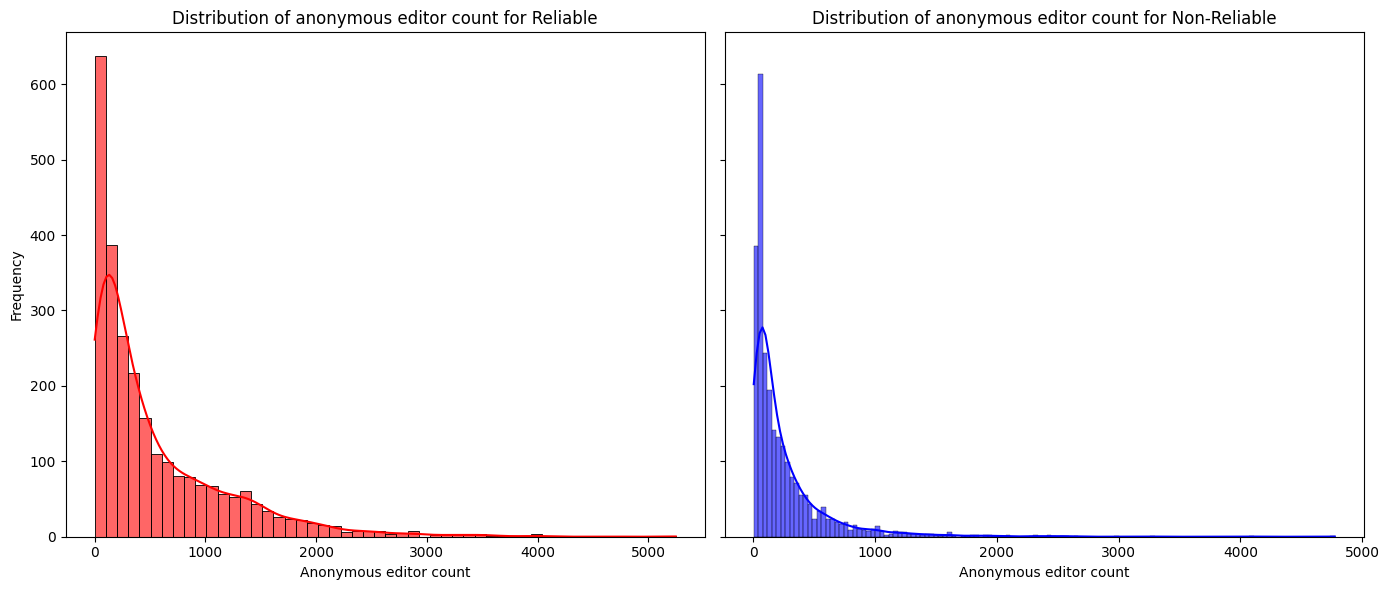

In [118]:
# Anonymous editor count: Reliable vs. Non-Reliable
reliable = df_edit[df_edit['quality'] == 1]
non_reliable = df_edit[df_edit['quality'] == 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(reliable['num_anonymous_editors'], kde=True, color='red', ax=axs[0], alpha=0.6)
axs[0].set_title('Distribution of anonymous editor count for Reliable')
axs[0].set_xlabel('Anonymous editor count')
axs[0].set_ylabel('Frequency')

sns.histplot(non_reliable['num_registered_editors'], kde=True, color='blue', ax=axs[1], alpha=0.6)
axs[1].set_title('Distribution of anonymous editor count for Non-Reliable')
axs[1].set_xlabel('Anonymous editor count')

plt.tight_layout()
plt.show()

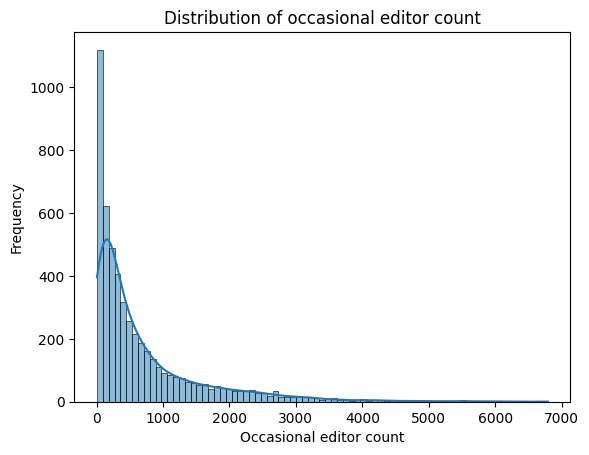

In [119]:
# Occasional editor count
sns.histplot(df_edit['num_occasional_editors'], kde=True)

plt.title('Distribution of occasional editor count')
plt.xlabel('Occasional editor count')
plt.ylabel('Frequency')
plt.show()

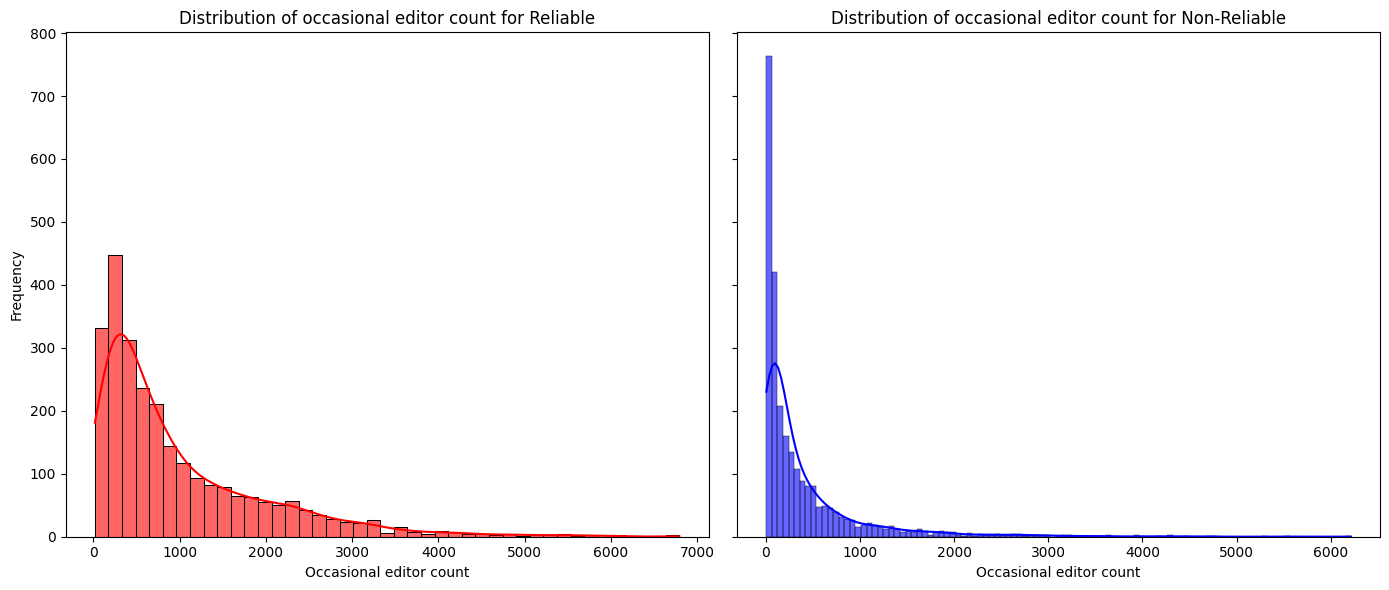

In [120]:
# Occasional editor count: Reliable vs. Non-Reliable
reliable = df_edit[df_edit['quality'] == 1]
non_reliable = df_edit[df_edit['quality'] == 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(reliable['num_occasional_editors'], kde=True, color='red', ax=axs[0], alpha=0.6)
axs[0].set_title('Distribution of occasional editor count for Reliable')
axs[0].set_xlabel('Occasional editor count')
axs[0].set_ylabel('Frequency')

sns.histplot(non_reliable['num_occasional_editors'], kde=True, color='blue', ax=axs[1], alpha=0.6)
axs[1].set_title('Distribution of occasional editor count for Non-Reliable')
axs[1].set_xlabel('Occasional editor count')

plt.tight_layout()
plt.show()

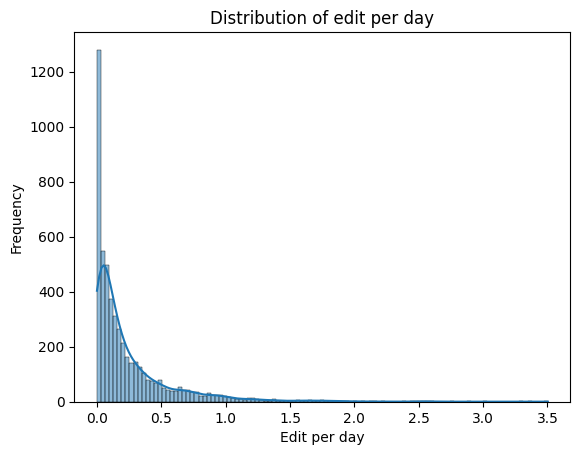

In [121]:
# Edit per day
sns.histplot(df_edit['edit_per_day'], kde=True)

plt.title('Distribution of edit per day')
plt.xlabel('Edit per day')
plt.ylabel('Frequency')
plt.show()

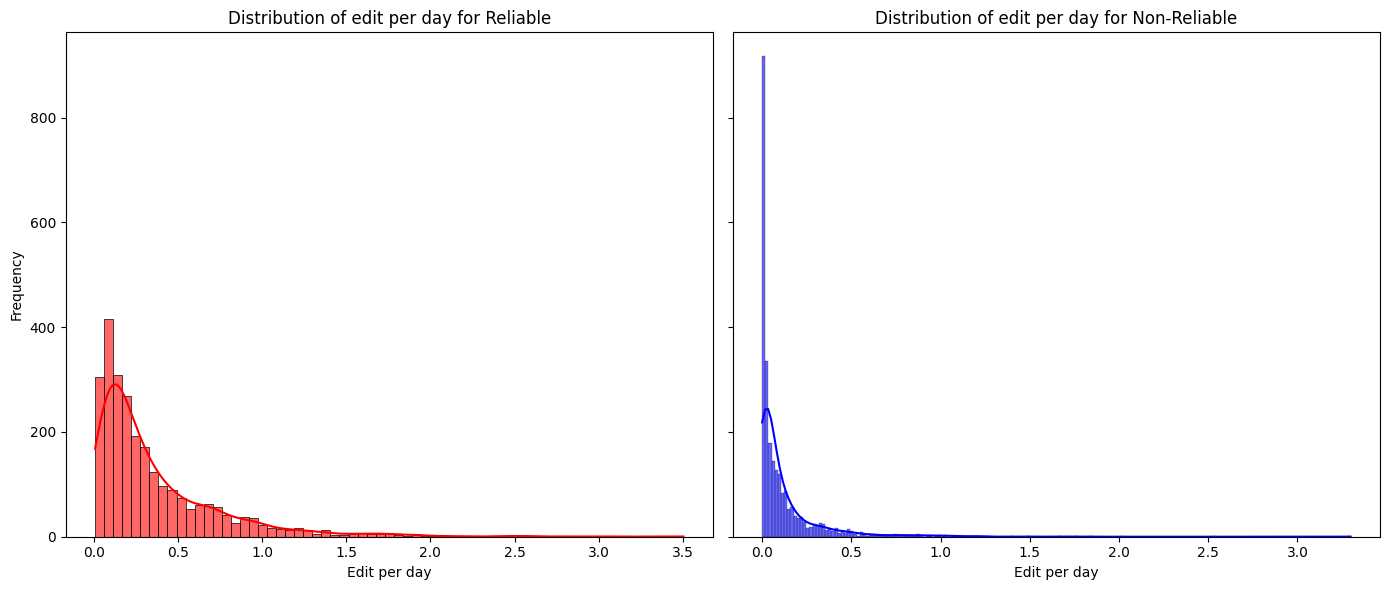

In [122]:
# Edit per day: Reliable vs. Non-Reliable
reliable = df_edit[df_edit['quality'] == 1]
non_reliable = df_edit[df_edit['quality'] == 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(reliable['edit_per_day'], kde=True, color='red', ax=axs[0], alpha=0.6)
axs[0].set_title('Distribution of edit per day for Reliable')
axs[0].set_xlabel('Edit per day')
axs[0].set_ylabel('Frequency')

sns.histplot(non_reliable['edit_per_day'], kde=True, color='blue', ax=axs[1], alpha=0.6)
axs[1].set_title('Distribution of edit per day for Non-Reliable')
axs[1].set_xlabel('Edit per day')

plt.tight_layout()
plt.show()

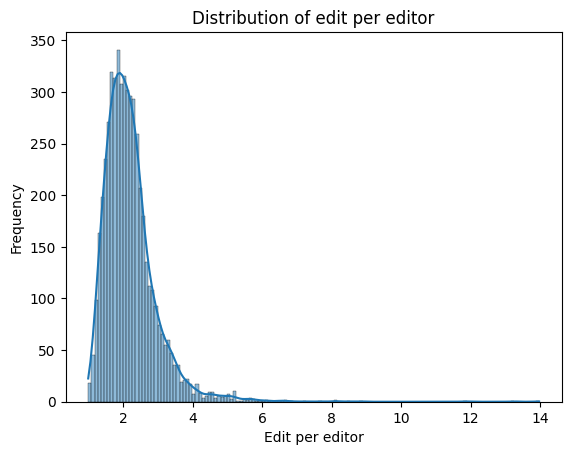

In [123]:
# Edit per editor
sns.histplot(df_edit['edit_per_editor'], kde=True)

plt.title('Distribution of edit per editor')
plt.xlabel('Edit per editor')
plt.ylabel('Frequency')
plt.show()

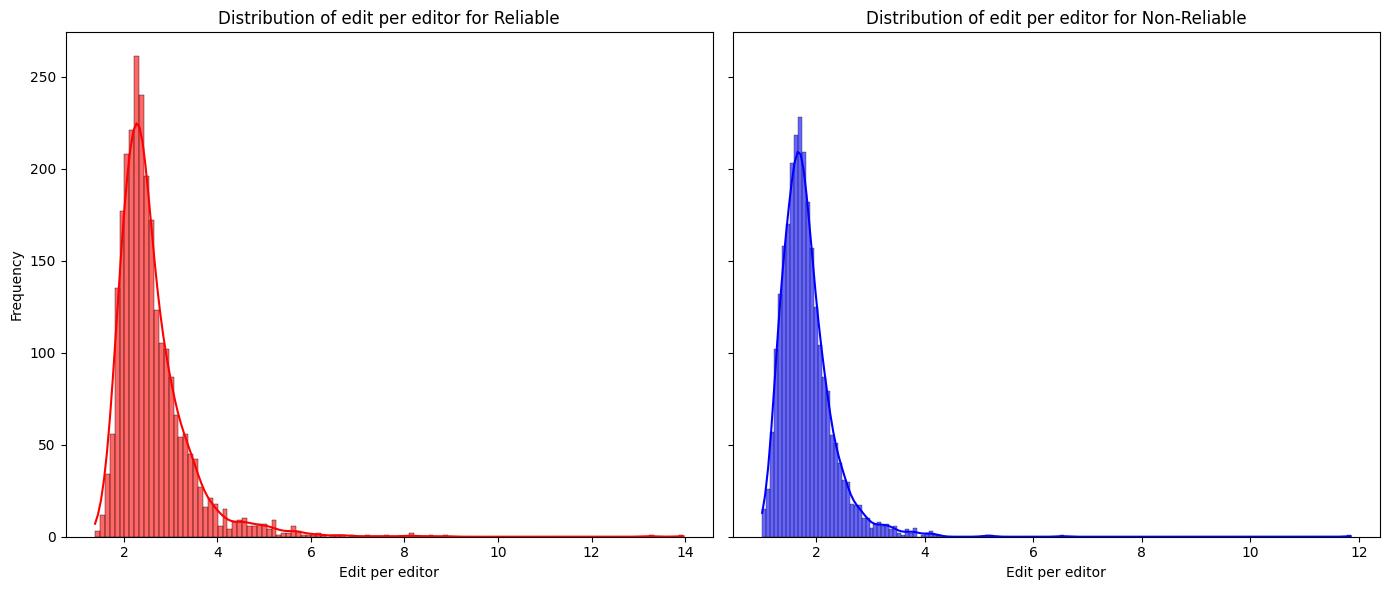

In [124]:
# Edit per day: Reliable vs. Non-Reliable
reliable = df_edit[df_edit['quality'] == 1]
non_reliable = df_edit[df_edit['quality'] == 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(reliable['edit_per_editor'], kde=True, color='red', ax=axs[0], alpha=0.6)
axs[0].set_title('Distribution of edit per editor for Reliable')
axs[0].set_xlabel('Edit per editor')
axs[0].set_ylabel('Frequency')

sns.histplot(non_reliable['edit_per_editor'], kde=True, color='blue', ax=axs[1], alpha=0.6)
axs[1].set_title('Distribution of edit per editor for Non-Reliable')
axs[1].set_xlabel('Edit per editor')

plt.tight_layout()
plt.show()

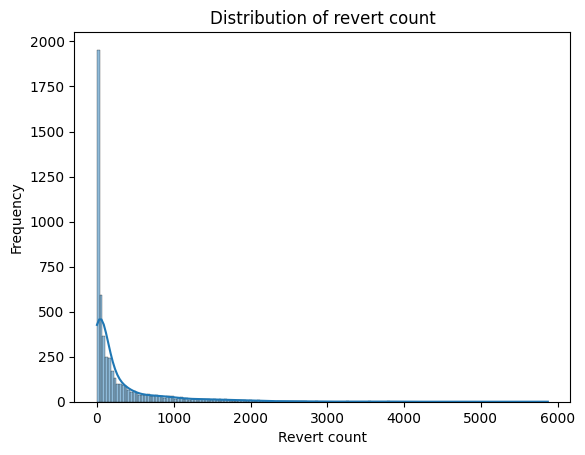

In [125]:
# Revert count
sns.histplot(df_edit['revert_count'], kde=True)

plt.title('Distribution of revert count')
plt.xlabel('Revert count')
plt.ylabel('Frequency')
plt.show()

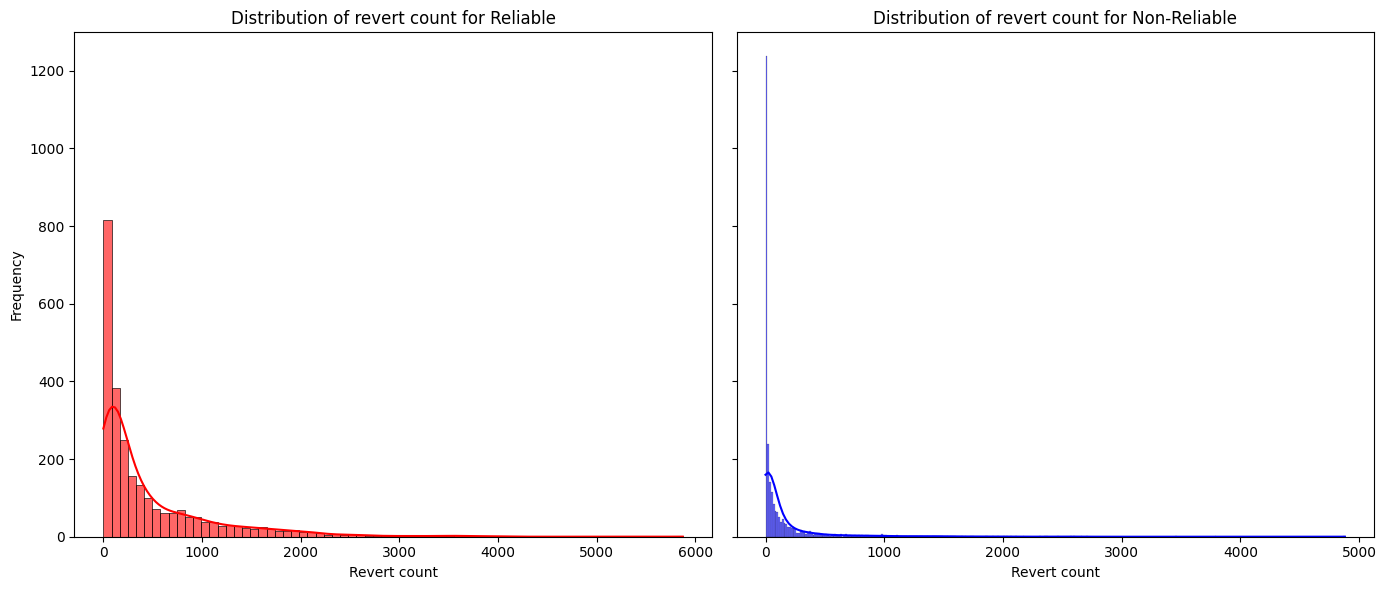

In [126]:
# Revert count: Reliable vs. Non-Reliable
reliable = df_edit[df_edit['quality'] == 1]
non_reliable = df_edit[df_edit['quality'] == 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(reliable['revert_count'], kde=True, color='red', ax=axs[0], alpha=0.6)
axs[0].set_title('Distribution of revert count for Reliable')
axs[0].set_xlabel('Revert count')
axs[0].set_ylabel('Frequency')

sns.histplot(non_reliable['revert_count'], kde=True, color='blue', ax=axs[1], alpha=0.6)
axs[1].set_title('Distribution of revert count for Non-Reliable')
axs[1].set_xlabel('Revert count')

plt.tight_layout()
plt.show()

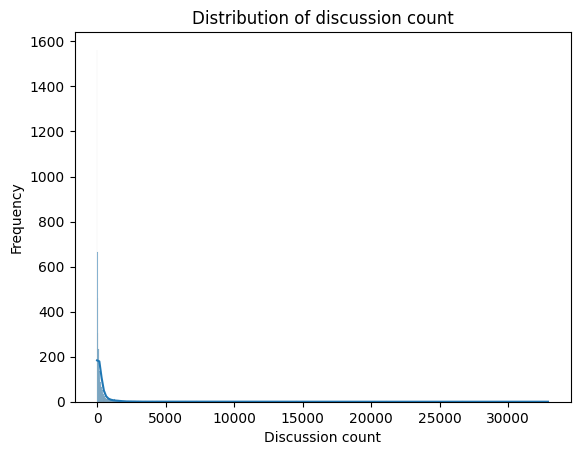

In [127]:
# Discussion count
sns.histplot(df_edit['discussion_count'], kde=True)

plt.title('Distribution of discussion count')
plt.xlabel('Discussion count')
plt.ylabel('Frequency')
plt.show()

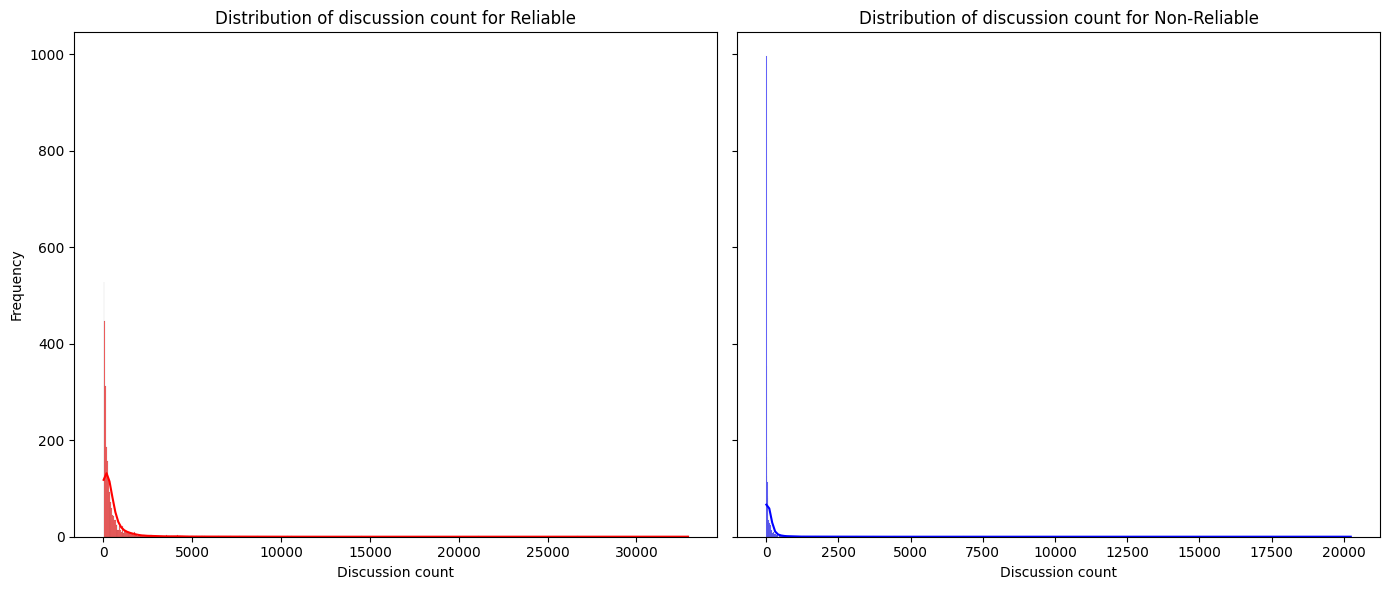

In [128]:
# Discussion count: Reliable vs. Non-Reliable
reliable = df_edit[df_edit['quality'] == 1]
non_reliable = df_edit[df_edit['quality'] == 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(reliable['discussion_count'], kde=True, color='red', ax=axs[0], alpha=0.6)
axs[0].set_title('Distribution of discussion count for Reliable')
axs[0].set_xlabel('Discussion count')
axs[0].set_ylabel('Frequency')

sns.histplot(non_reliable['discussion_count'], kde=True, color='blue', ax=axs[1], alpha=0.6)
axs[1].set_title('Distribution of discussion count for Non-Reliable')
axs[1].set_xlabel('Discussion count')

plt.tight_layout()
plt.show()

- Hard to see the difference: edit count, registered editor count, anonymous editor count, occasional editor count, edit per editor

### Correlation

<Axes: >

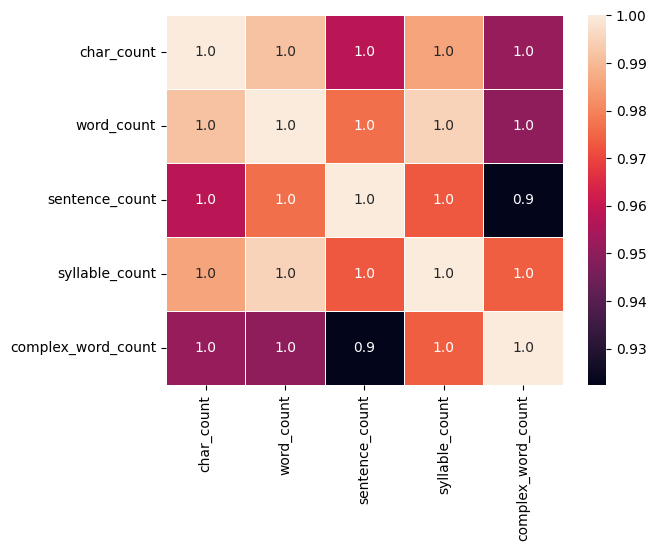

In [129]:
sns.heatmap(df_length.iloc[:, :-1].corr(), annot=True, linewidths=.5, fmt= '.1f')

- all highly correlated to each other
- select only one of them

<Axes: >

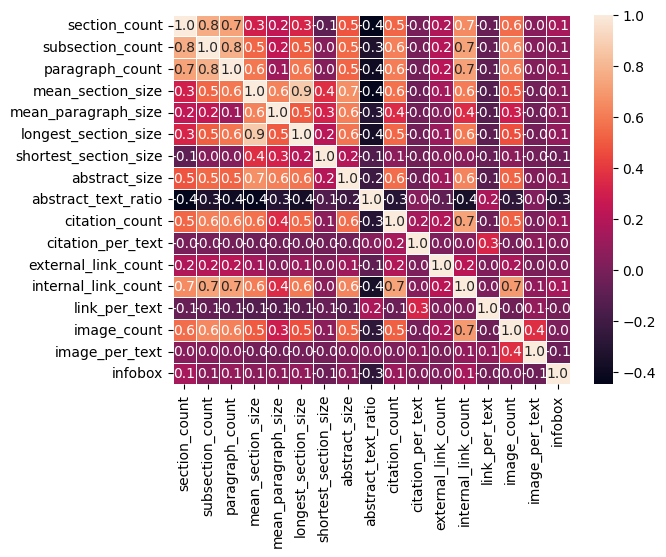

In [130]:
sns.heatmap(df_structure.iloc[:, :-1].corr(), annot=True, linewidths=.5, fmt= '.1f')

- only section, subsection, and paragraph counts are highly correlated to each other

<Axes: >

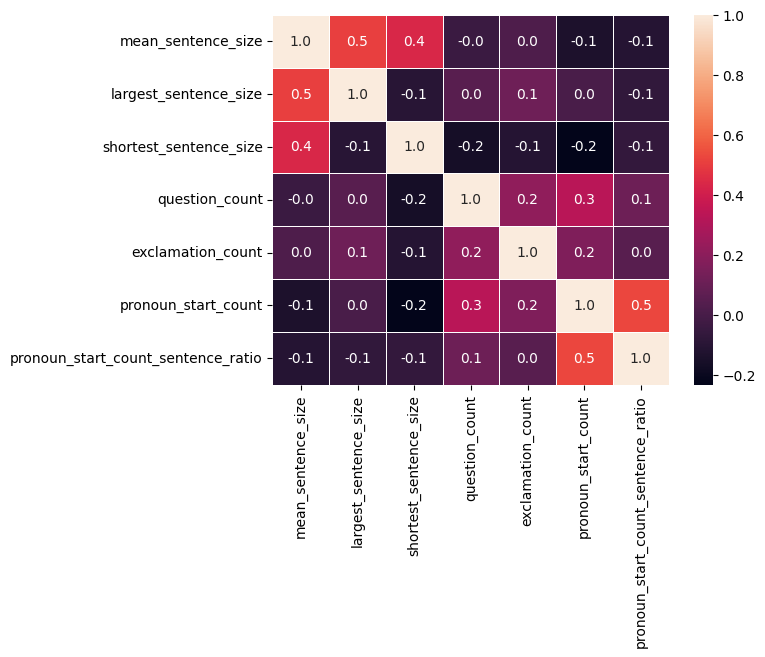

In [131]:
sns.heatmap(df_style.iloc[:, :-1].corr(), annot=True, linewidths=.5, fmt= '.1f')

<Axes: >

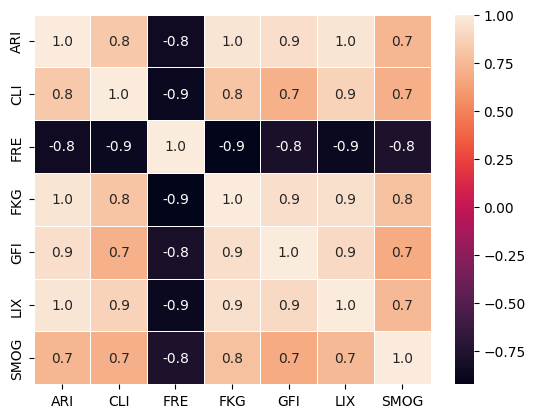

In [132]:
sns.heatmap(df_readability.iloc[:, :-1].corr(), annot=True, linewidths=.5, fmt= '.1f')

- mostly highly correlated to each other
- select one of them

<Axes: >

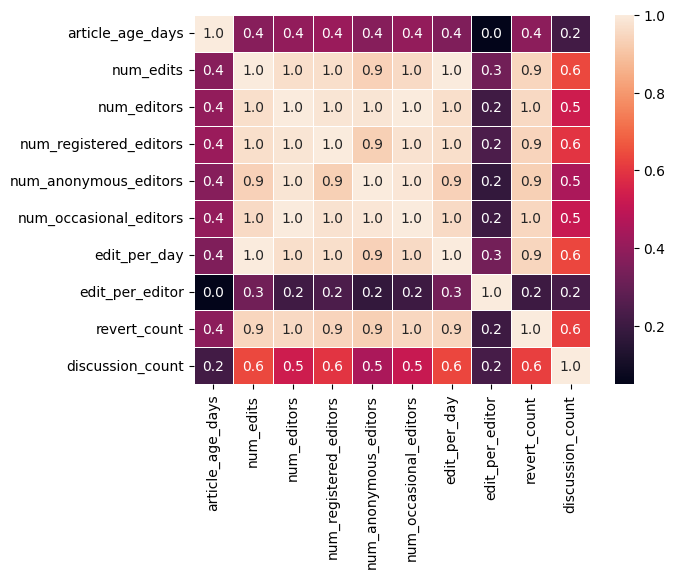

In [133]:
sns.heatmap(df_edit.iloc[:, :-1].corr(), annot=True, linewidths=.5, fmt= '.1f')

- num_edits, num_editors, num_registered_editors, num_anonymous_editors, num_occasioanl editors, and revert_count are highly correlated to each other

__Correlation between other feature groups__

<Axes: >

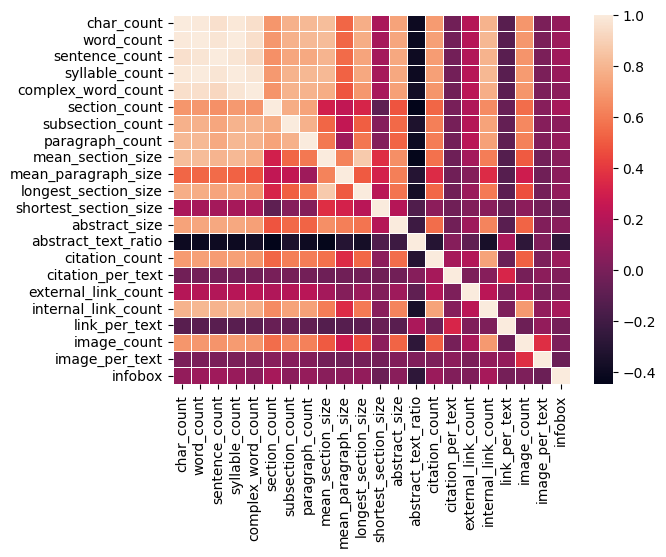

In [155]:
# Length and structure features
length_structure = features.iloc[:, list(range(2, 24))]
sns.heatmap(length_structure.corr(), linewidths=.5)

- not too highly correlated
- but section, subsection, paragraph counts/mean, longest, abstract sizes/internal link, image counts with length features

<Axes: >

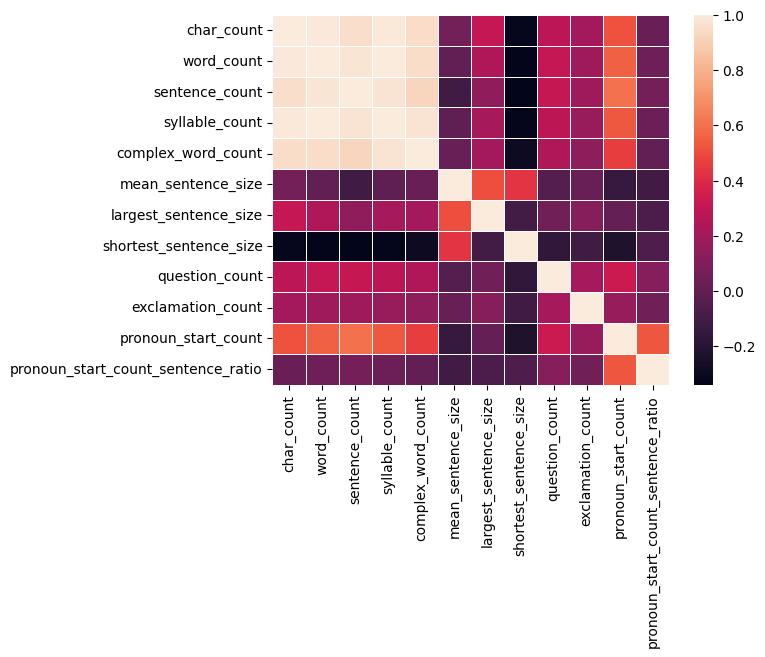

In [156]:
# Length and style features
length_style = features.iloc[:, list(range(2, 7))+list(range(24, 31))]
sns.heatmap(length_style.corr(), linewidths=.5)

- Not correlated

<Axes: >

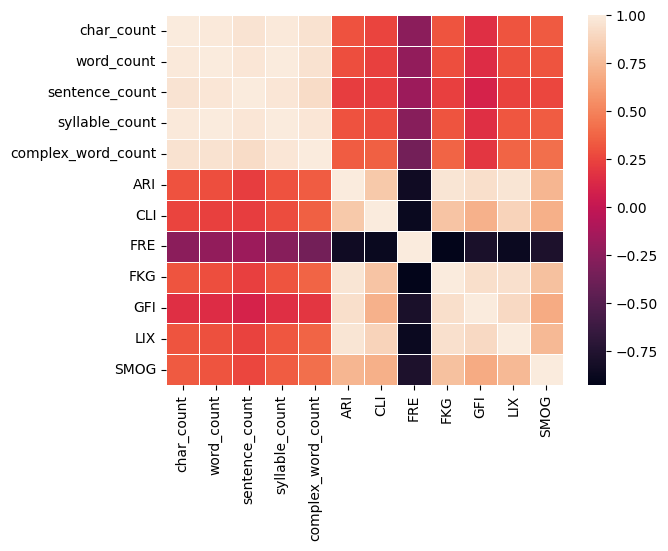

In [157]:
# Length and readability features
length_readability = features.iloc[:, list(range(2, 7))+list(range(31, 38))]
sns.heatmap(length_readability.corr(), linewidths=.5)

- Not correlated

<Axes: >

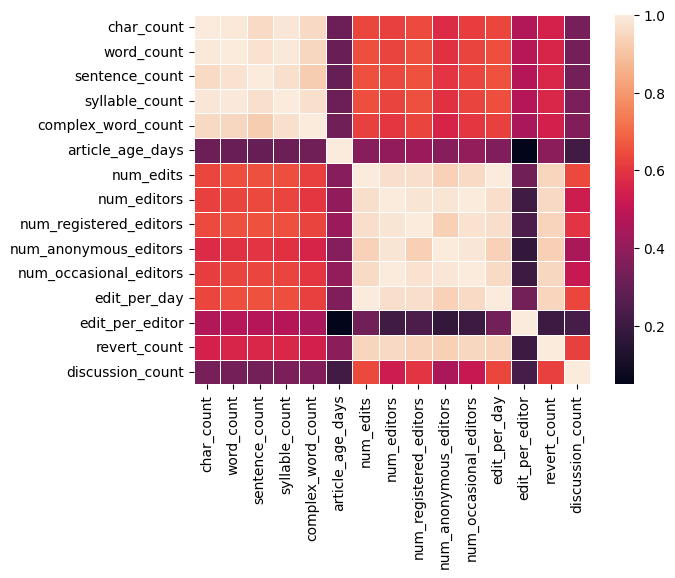

In [162]:
# Length and edit features
length_edit = features.iloc[:, list(range(2, 7))+list(range(38, 48))]
sns.heatmap(length_edit.corr(), linewidths=.5)

- edit, editor, registered editor, anonymous editor, occasional editor counts/edit per day with length features

<Axes: >

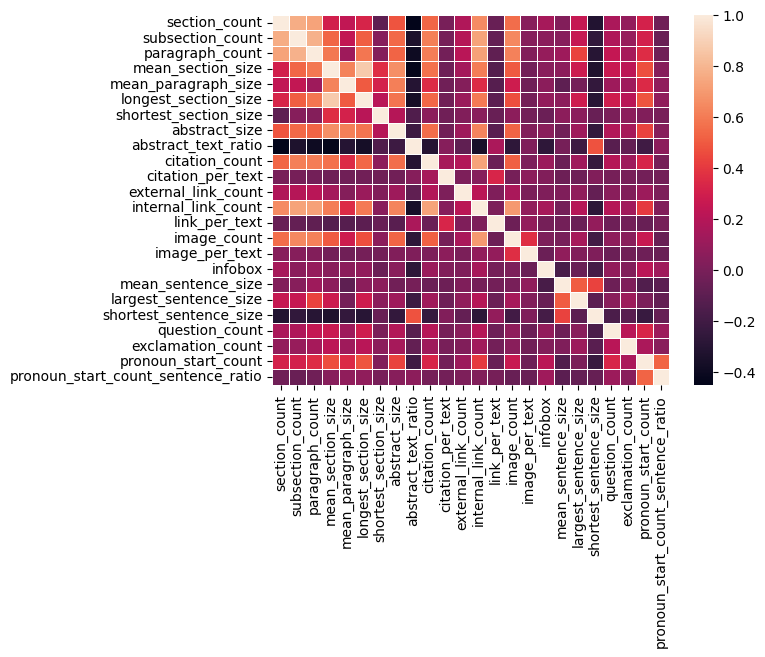

In [163]:
# structure and style features
structure_style = features.iloc[:, list(range(7, 24))+list(range(24, 31))]
sns.heatmap(structure_style.corr(), linewidths=.5)

- Not correlated except for few combinations
- section, subsection, paragraph counts/mean section, mean paragraph, longest, shortest section sizes with sentences starting with personal pronouns

<Axes: >

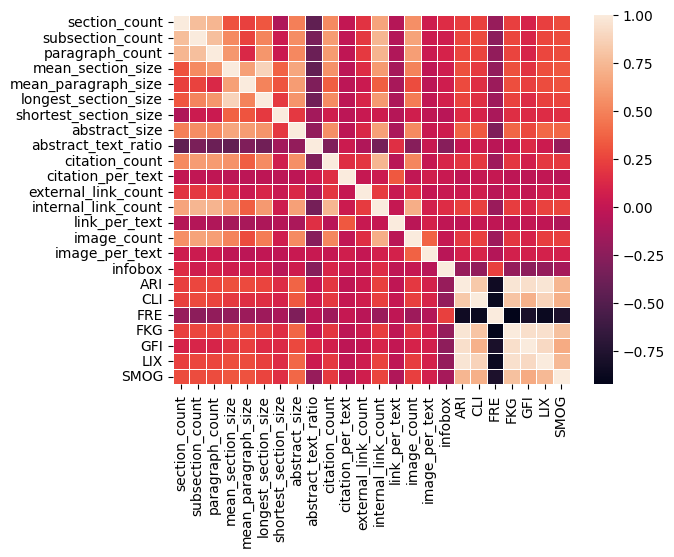

In [164]:
# structure and readability features
structure_readability = features.iloc[:, list(range(7, 24))+list(range(31, 38))]
sns.heatmap(structure_readability.corr(), linewidths=.5)

- Not correlated

<Axes: >

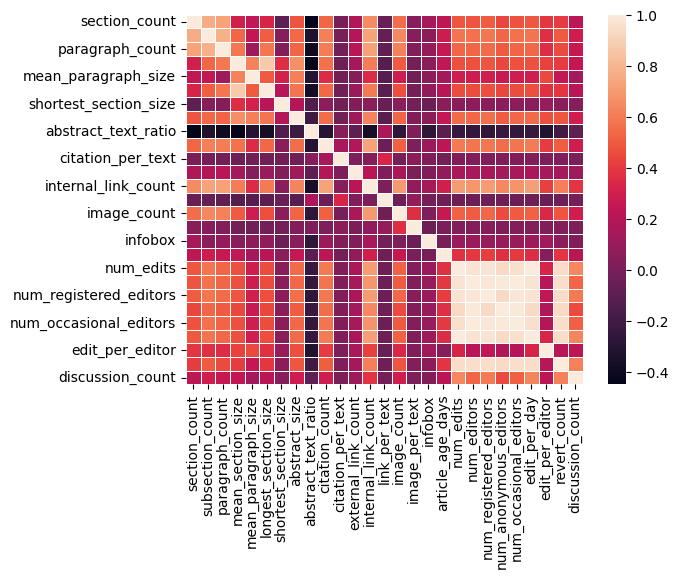

In [168]:
# structure and edit features
structure_edit = features.iloc[:, list(range(7, 24))+list(range(38, 48))]
sns.heatmap(structure_edit.corr(), linewidths=.5)

- Some features with edit, editors, registered editor, anonymous editor counts

<Axes: >

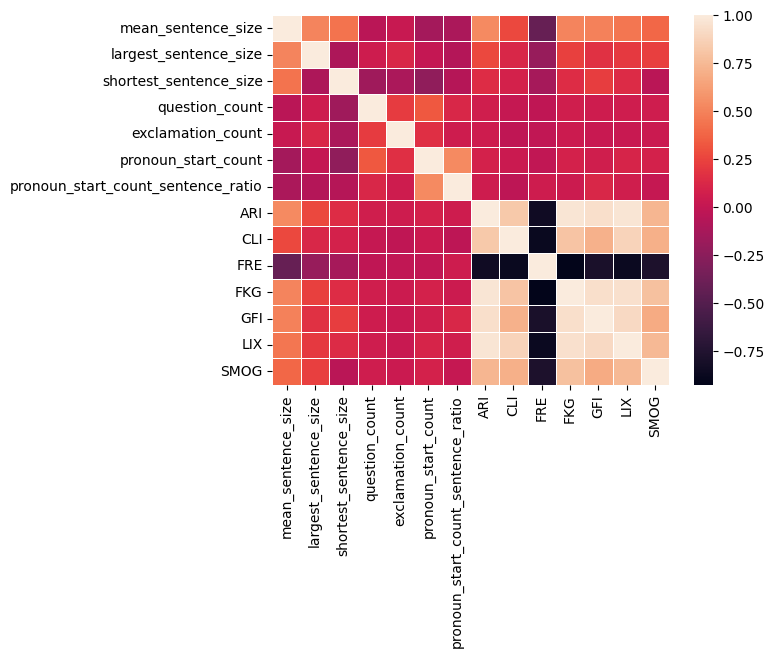

In [169]:
# style and readability features
style_readability = features.iloc[:, list(range(24, 31))+list(range(31, 38))]
sns.heatmap(style_readability.corr(), linewidths=.5)

- some features with mean sentence size

<Axes: >

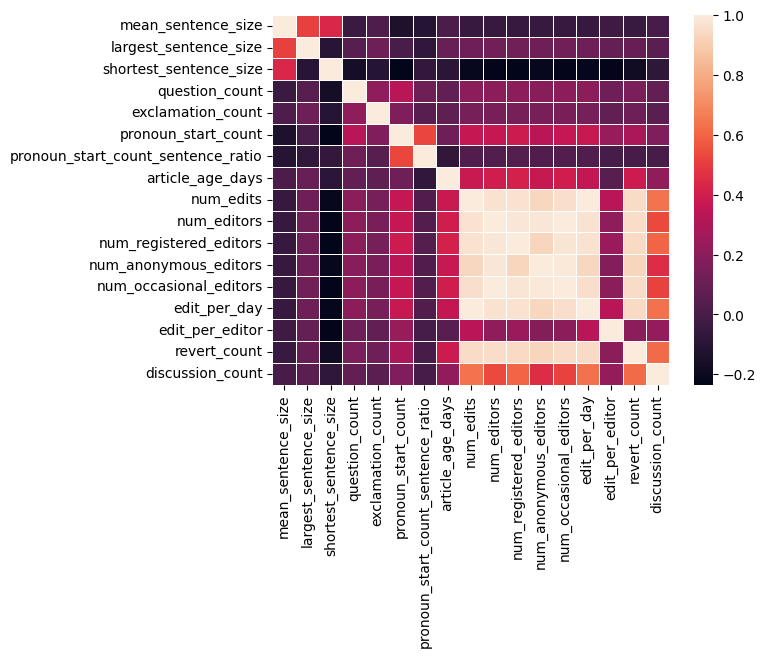

In [170]:
# style and edit features
style_edit = features.iloc[:, list(range(24, 31))+list(range(38, 48))]
sns.heatmap(style_edit.corr(), linewidths=.5)

- Not correlated

<Axes: >

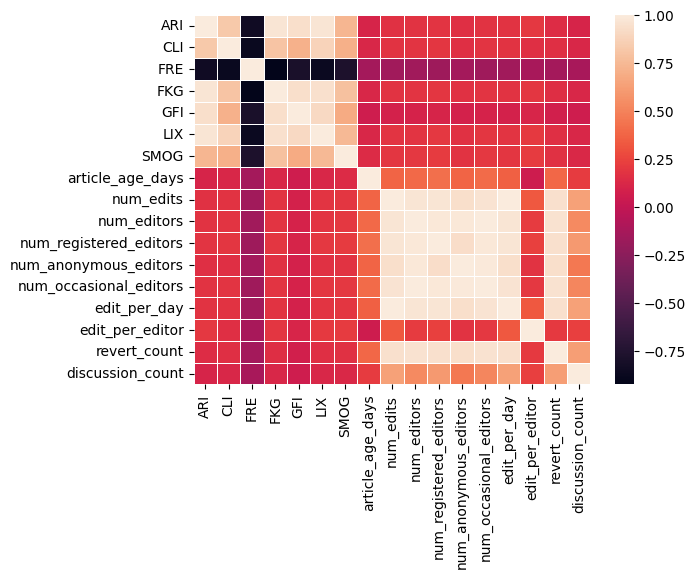

In [171]:
# readability and edit features
readability_edit = features.iloc[:, list(range(31, 38))+list(range(38, 48))]
sns.heatmap(readability_edit.corr(), linewidths=.5)

- Not correlated

### Outlier

__length features__

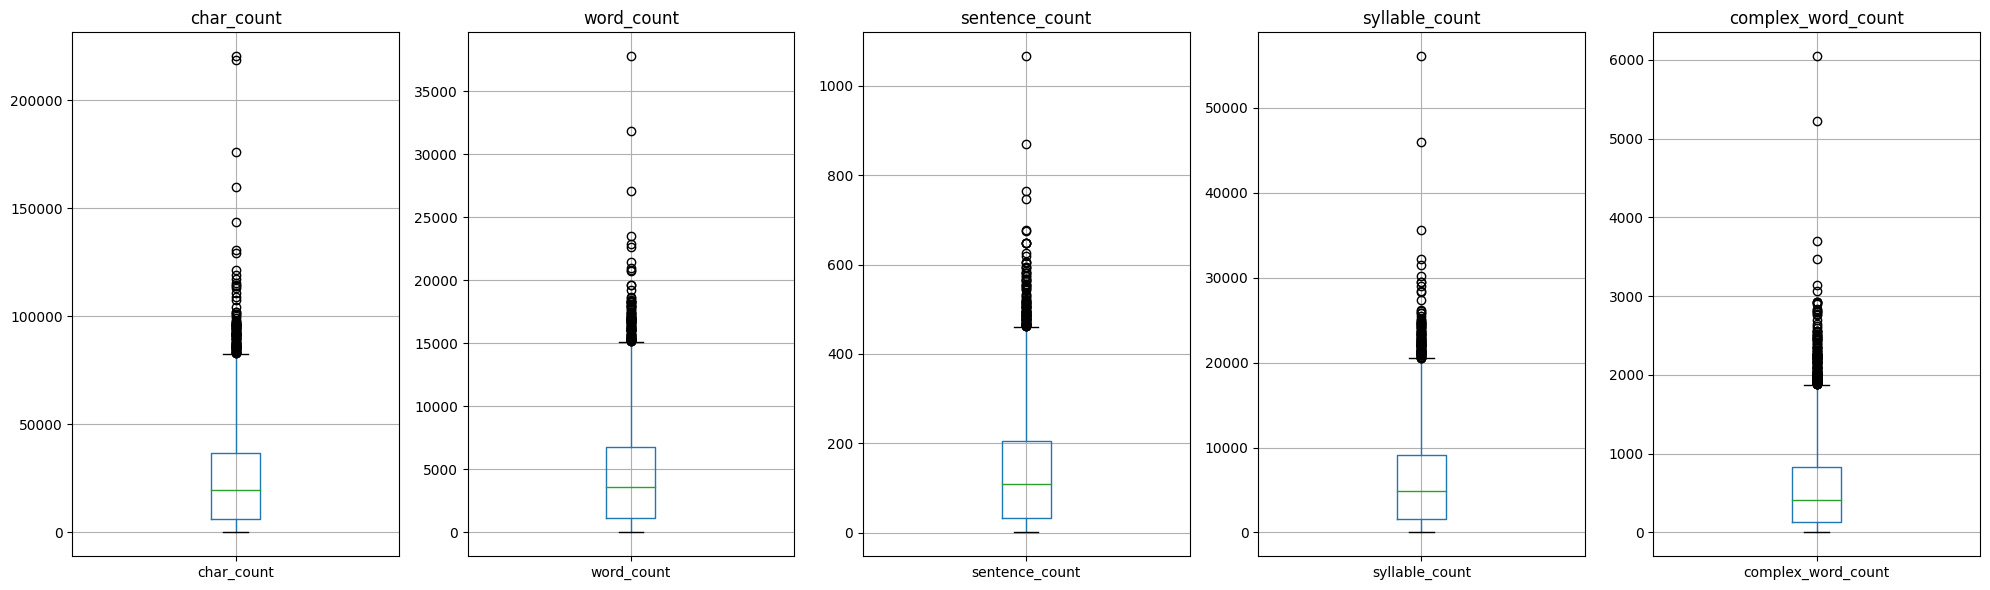

In [135]:
fig, axes = plt.subplots(1, 5, figsize=(20, 6), sharey=False)

for i, column in enumerate(df_length.iloc[:, :-1].columns):
    df_length.iloc[:, :-1].boxplot(column=column, ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

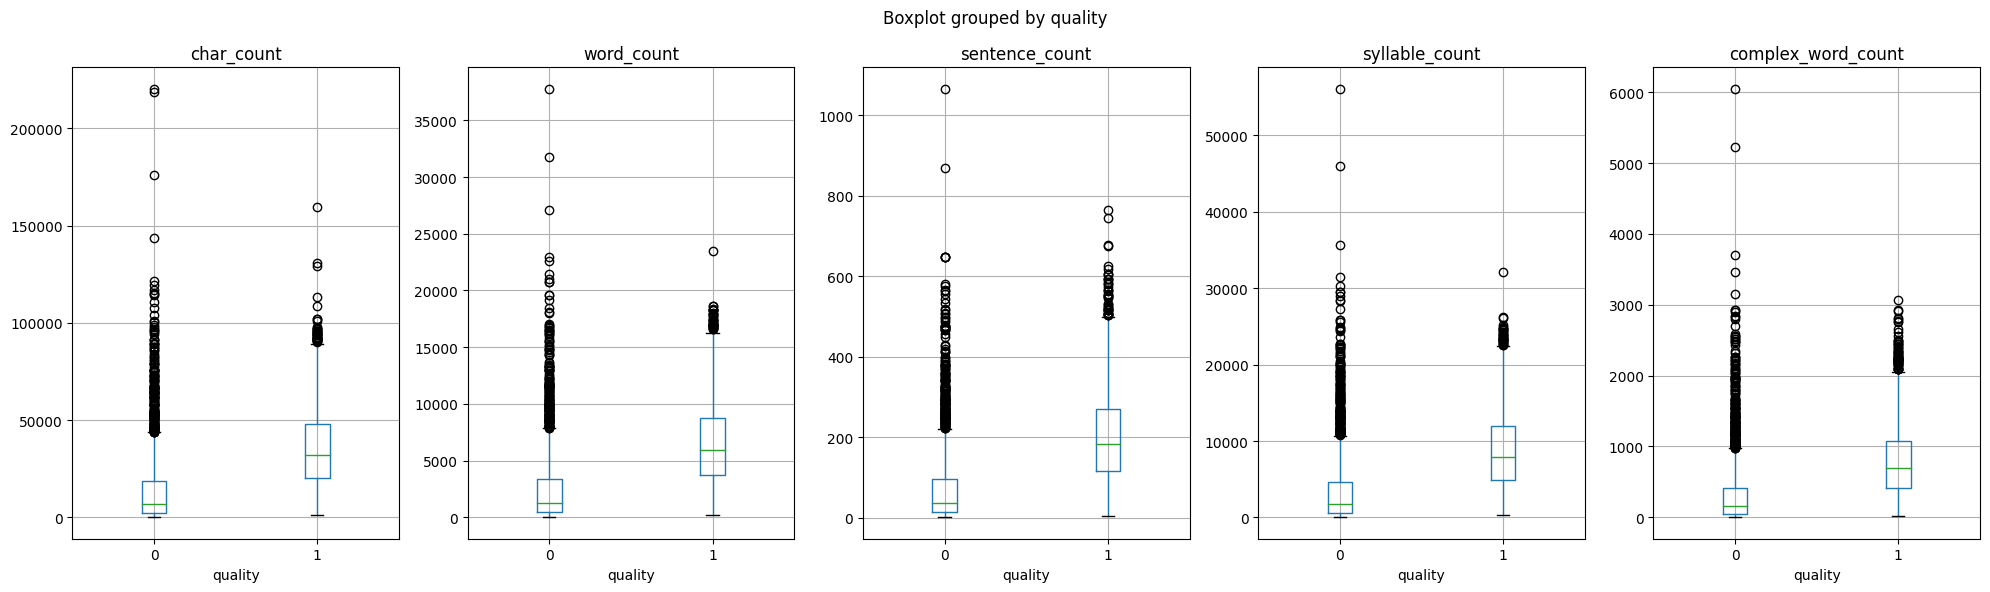

In [136]:
fig, axes = plt.subplots(1, 5, figsize=(20, 6), sharey=False)

for i, column in enumerate(df_length.columns[:-1]):
    df_length.boxplot(column=column, by='quality', ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

__structure features__

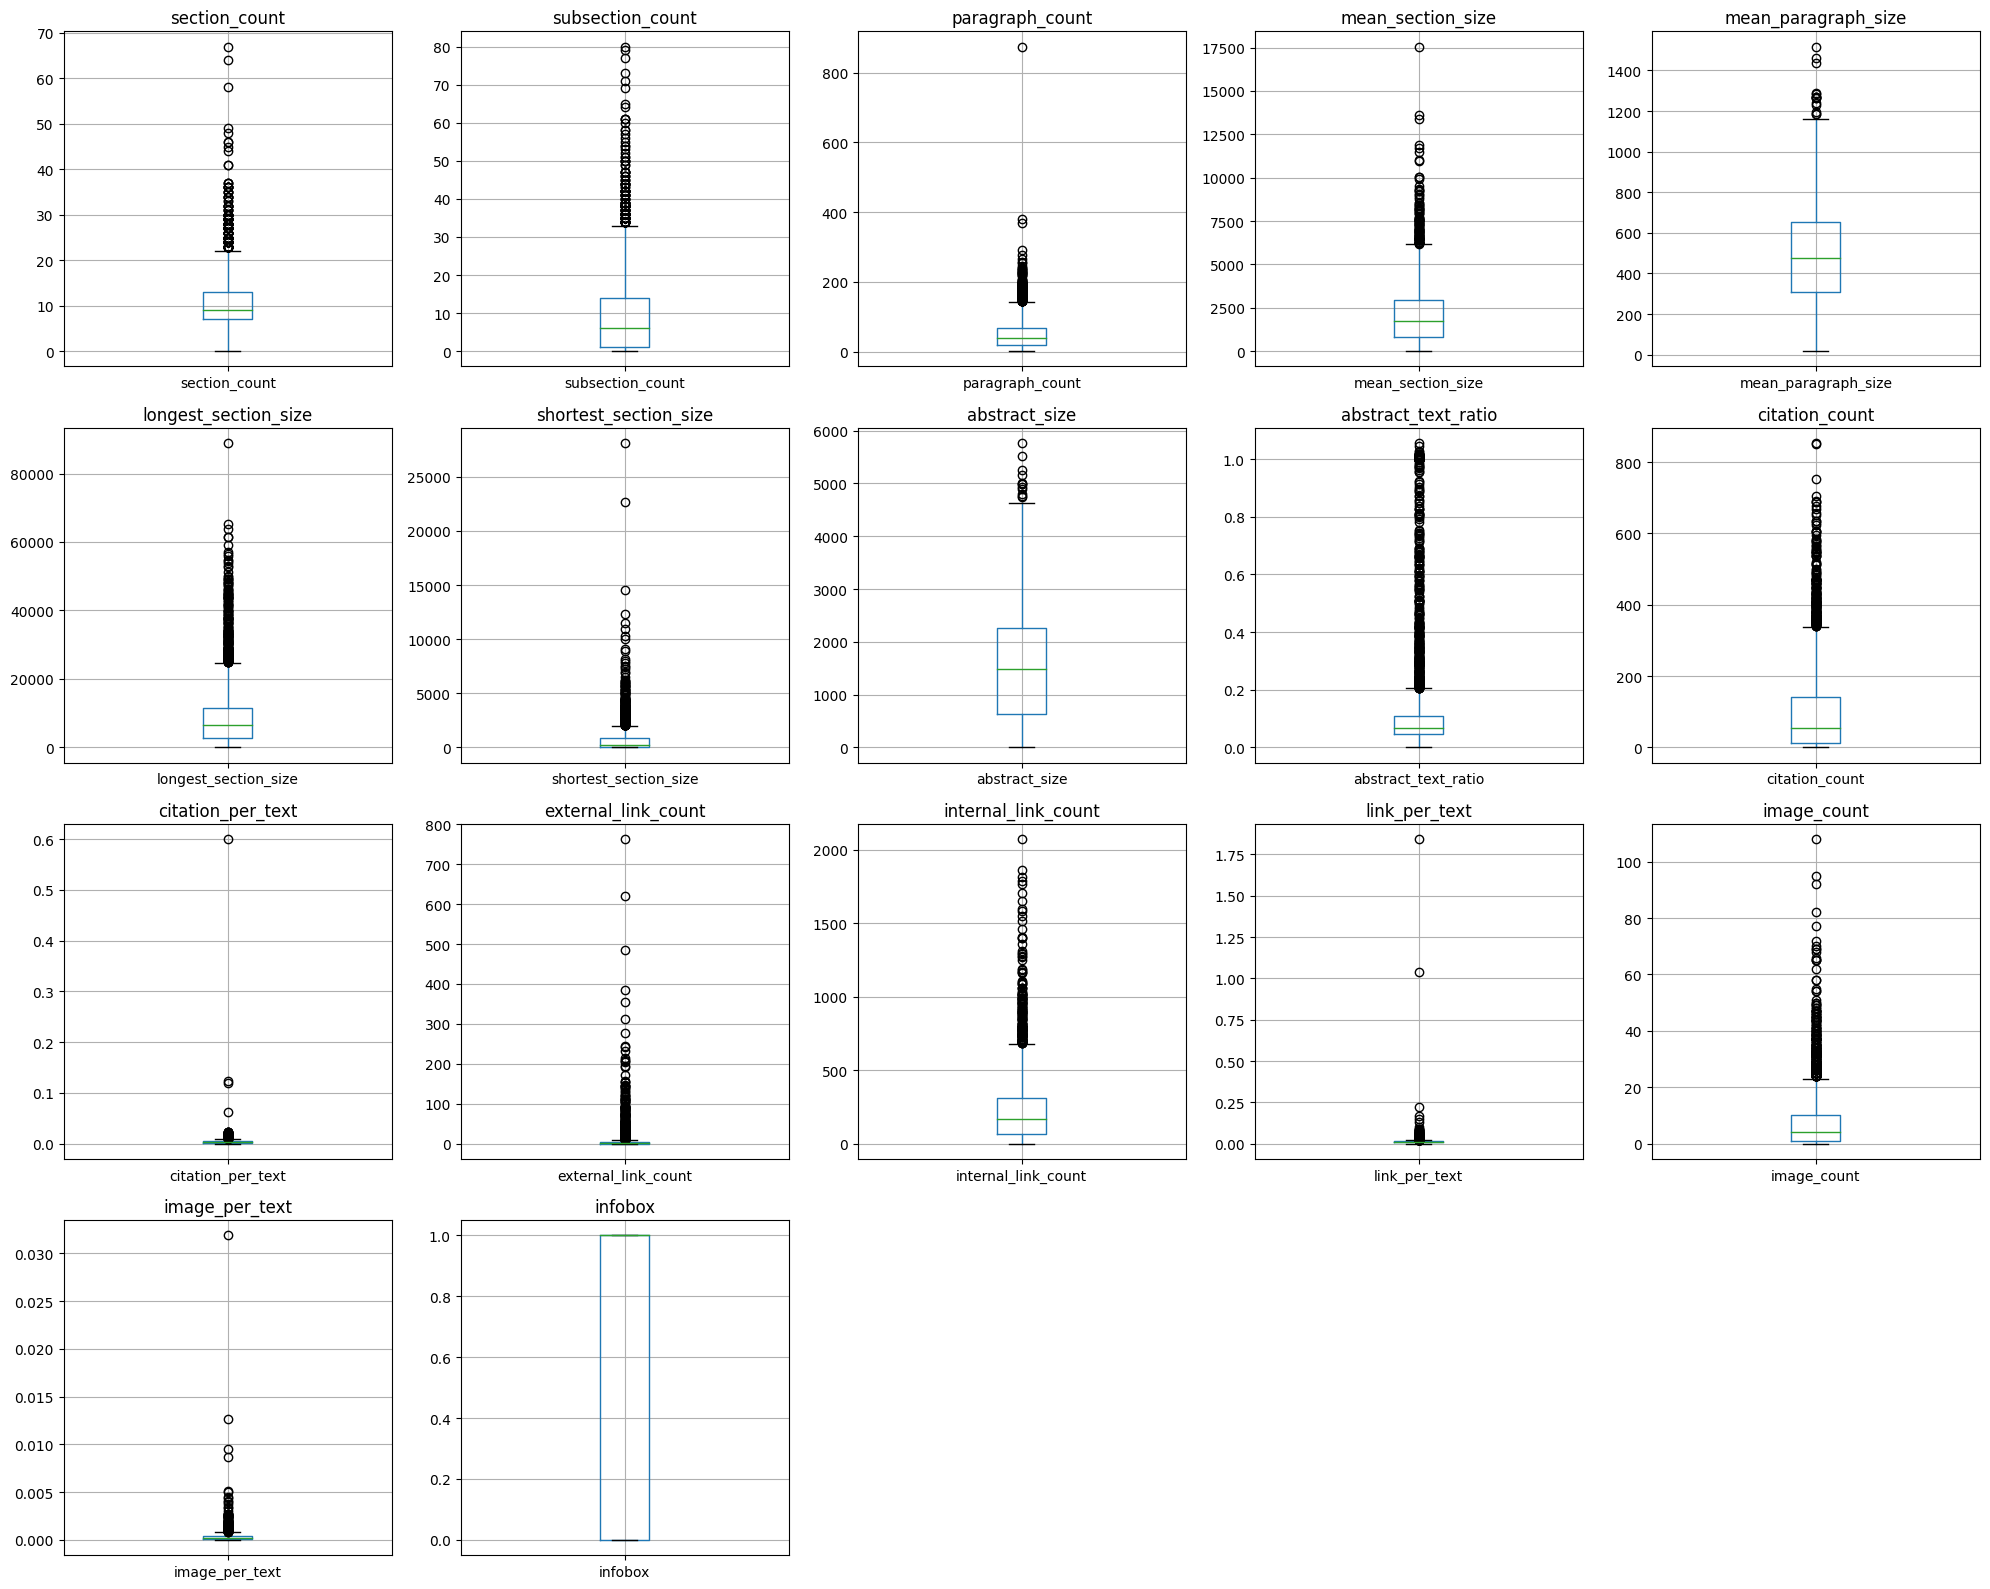

In [145]:
fig, axes = plt.subplots(4, 5, figsize=(20, 16), sharey=False)

axes = axes.flatten()

for i, column in enumerate(df_structure.iloc[:, :-1].columns):
    df_structure.iloc[:, :-1].boxplot(column=column, ax=axes[i])
    axes[i].set_title(column)

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

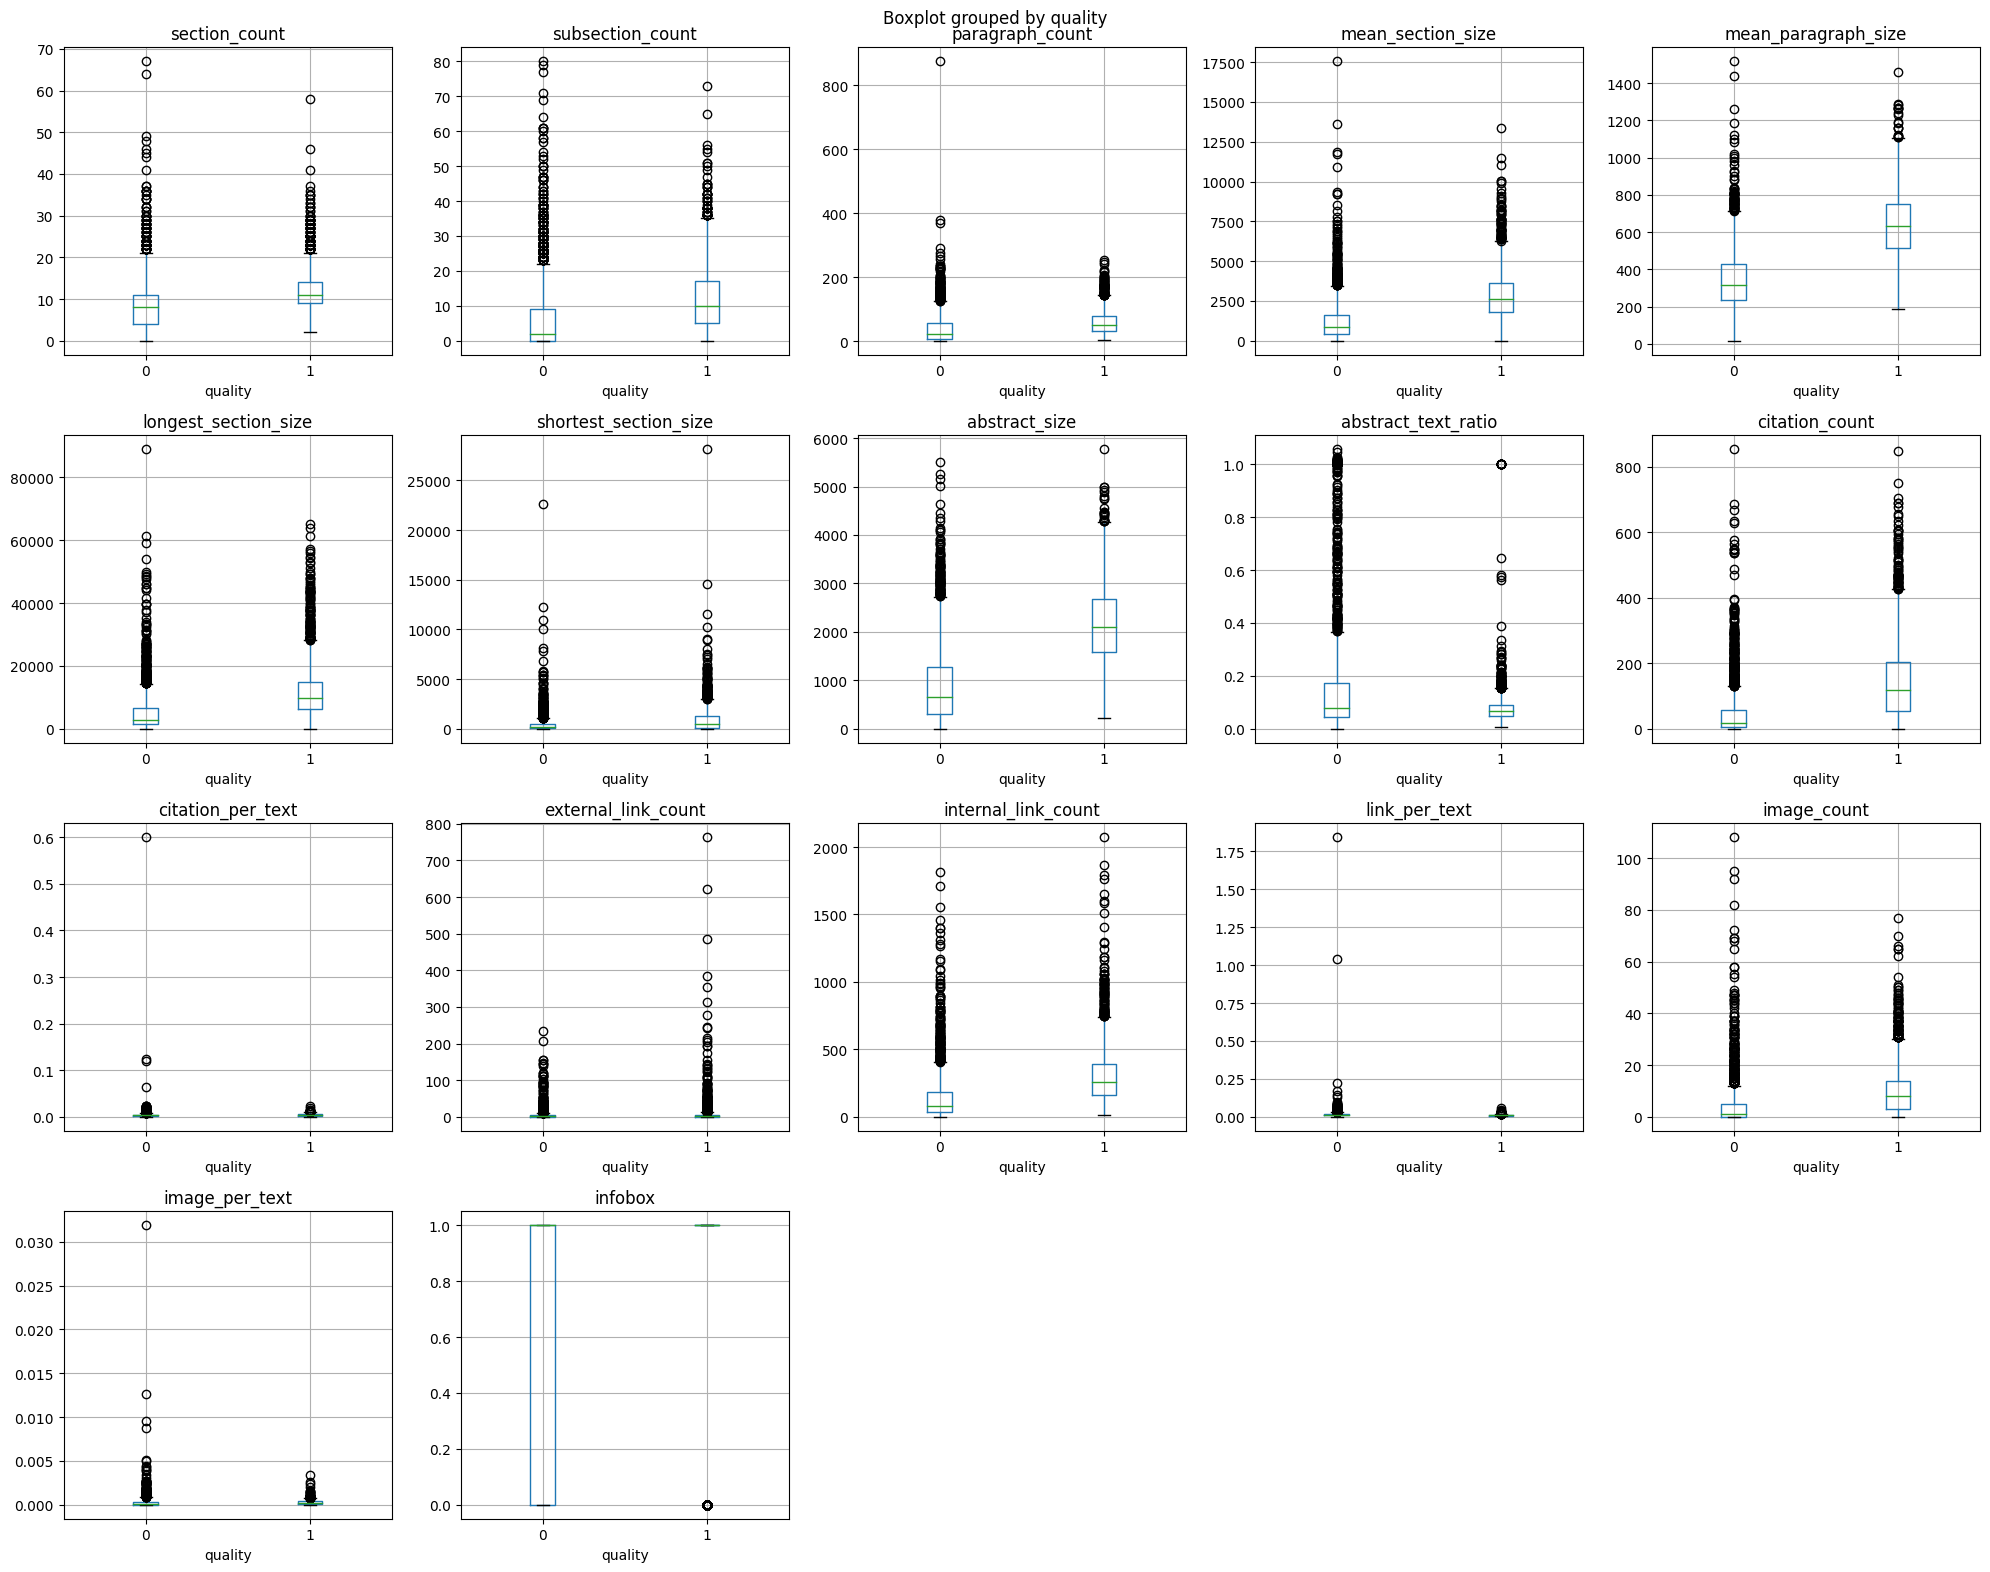

In [138]:
fig, axes = plt.subplots(4, 5, figsize=(20, 16), sharey=False)

axes = axes.flatten()

for i, column in enumerate(df_structure.columns[:-1]):
    df_structure.boxplot(column=column, by='quality', ax=axes[i])
    axes[i].set_title(column)

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

__style featues__

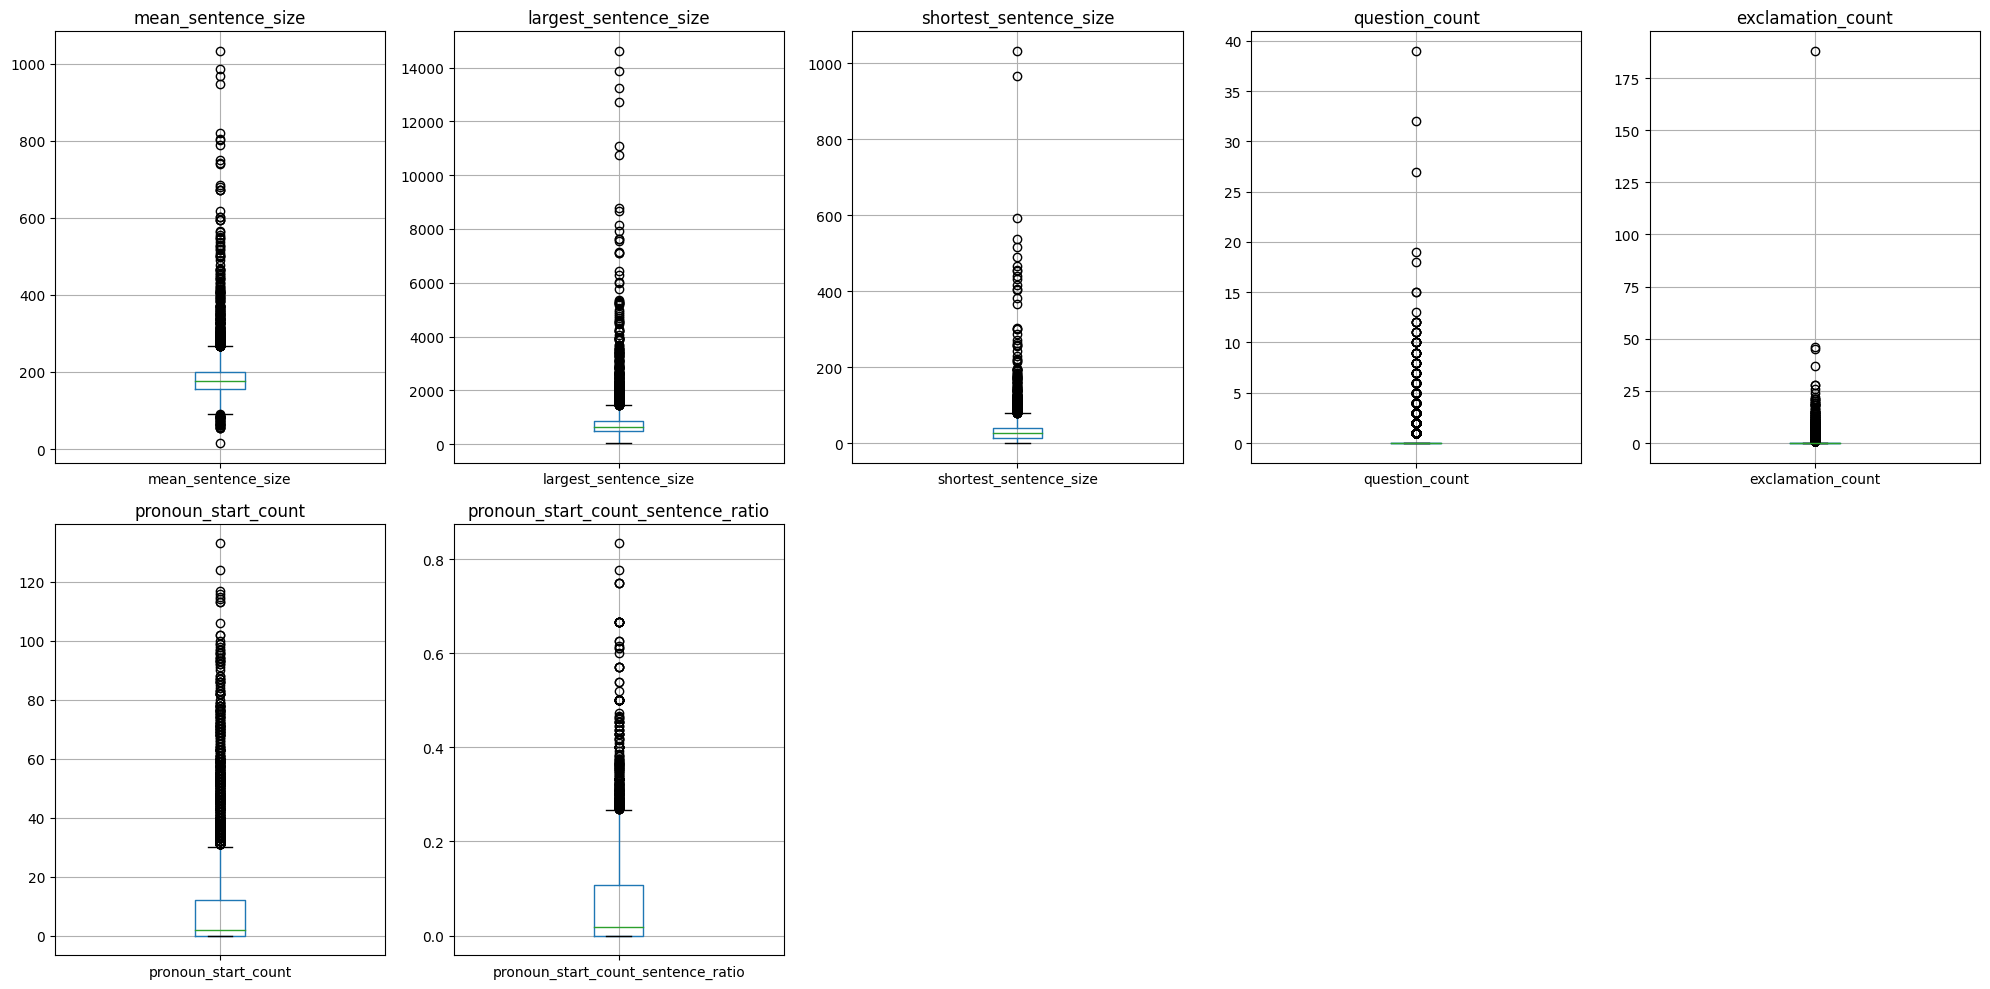

In [147]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10), sharey=False)

axes = axes.flatten()

for i, column in enumerate(df_style.iloc[:, :-1].columns):
    df_style.iloc[:, :-1].boxplot(column=column, ax=axes[i])
    axes[i].set_title(column)

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

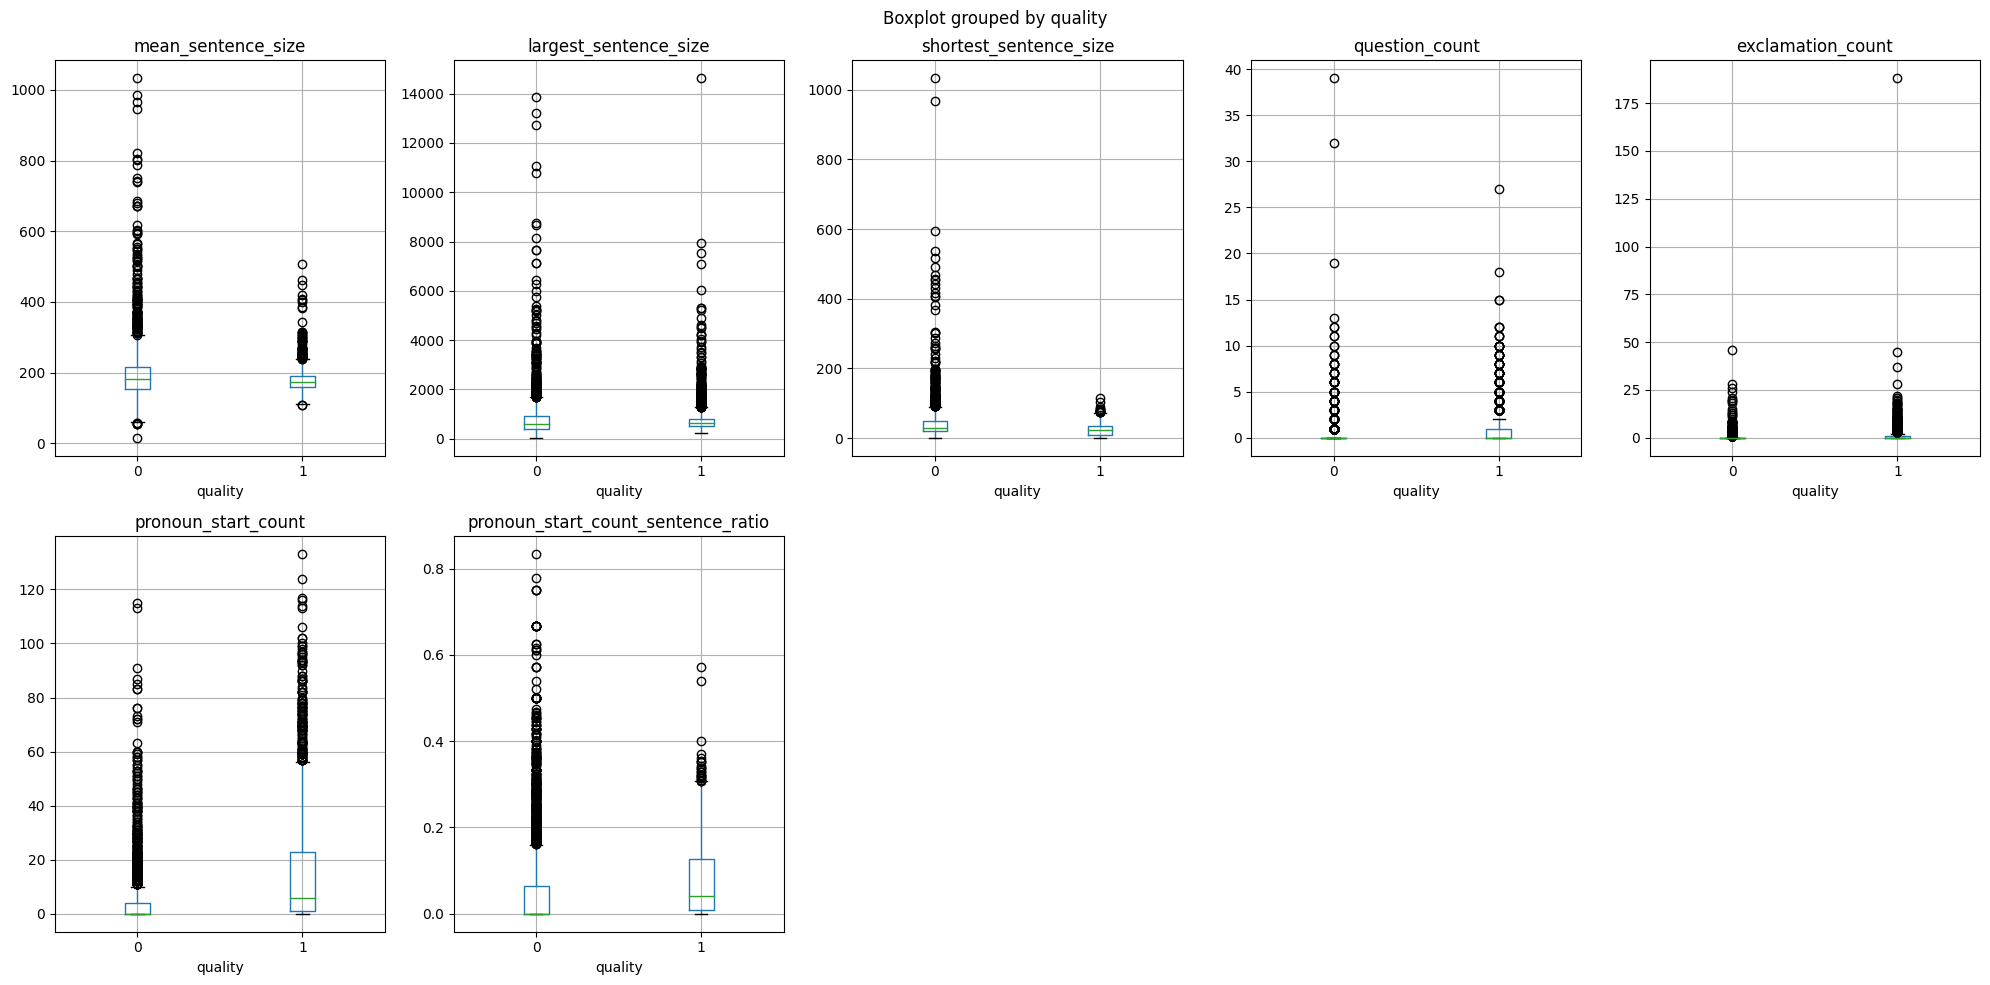

In [148]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10), sharey=False)

axes = axes.flatten()

for i, column in enumerate(df_style.columns[:-1]):
    df_style.boxplot(column=column, by='quality', ax=axes[i])
    axes[i].set_title(column)

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

__readability features__

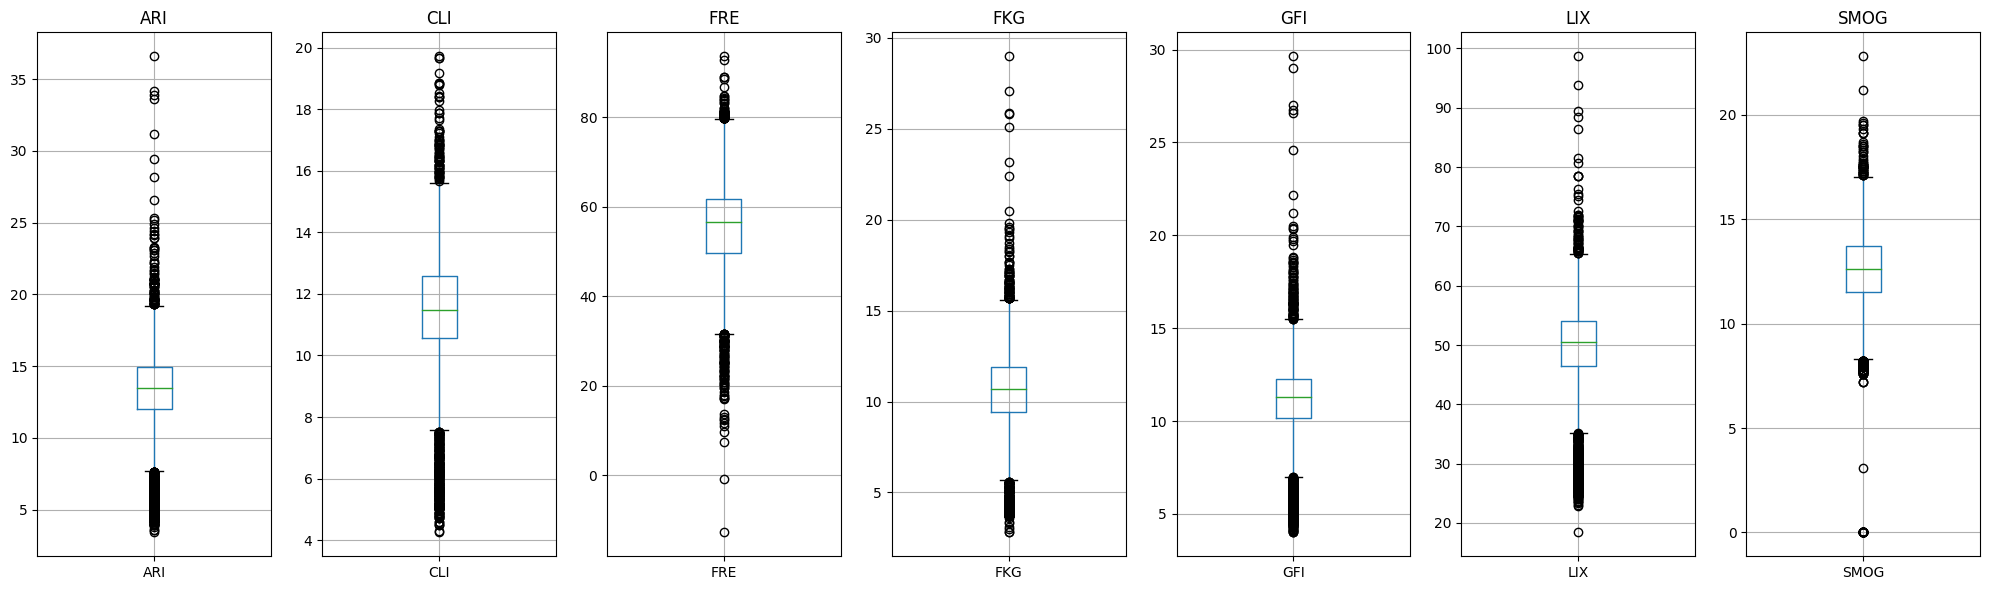

In [143]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10), sharey=False)

axes = axes.flatten()

for i, column in enumerate(df_readability.iloc[:, :-1].columns):
    df_readability.iloc[:, :-1].boxplot(column=column, ax=axes[i])
    axes[i].set_title(column)

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

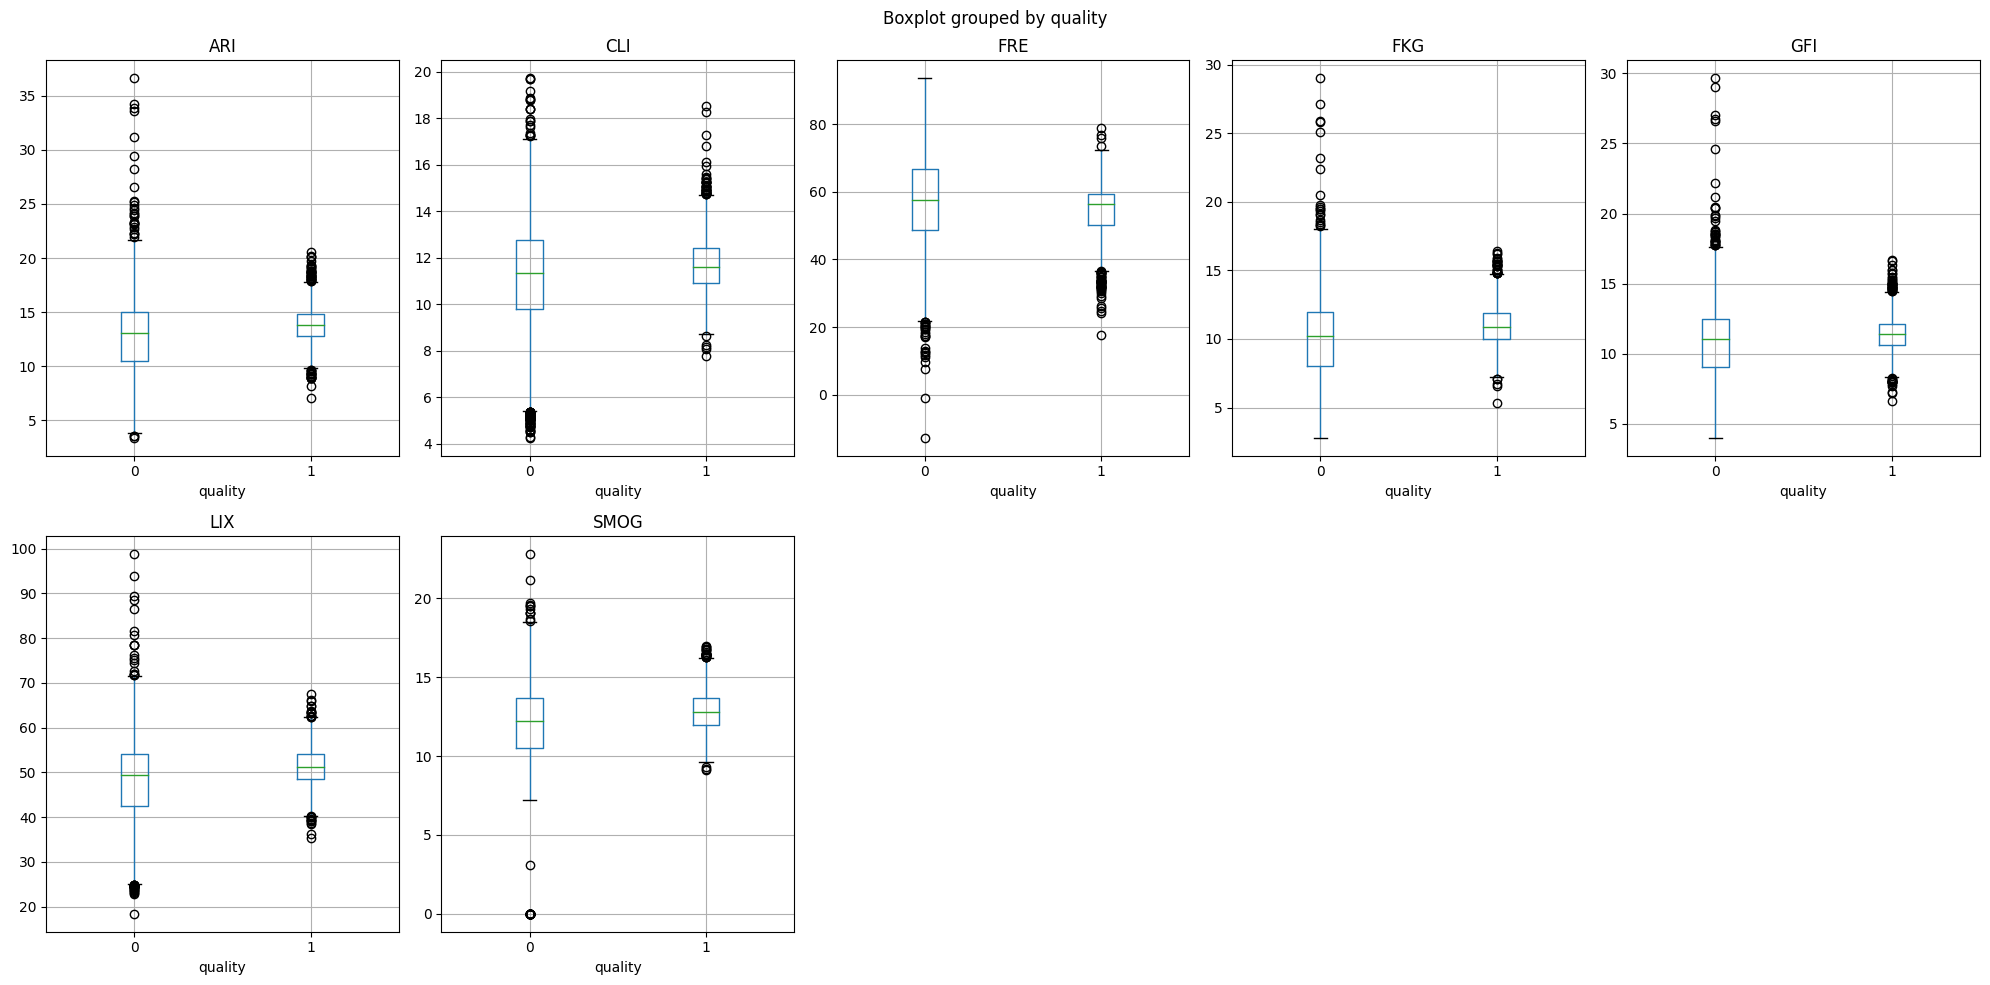

In [149]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10), sharey=False)

axes = axes.flatten()

for i, column in enumerate(df_readability.columns[:-1]):
    df_readability.boxplot(column=column, by='quality', ax=axes[i])
    axes[i].set_title(column)

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

__edit features__

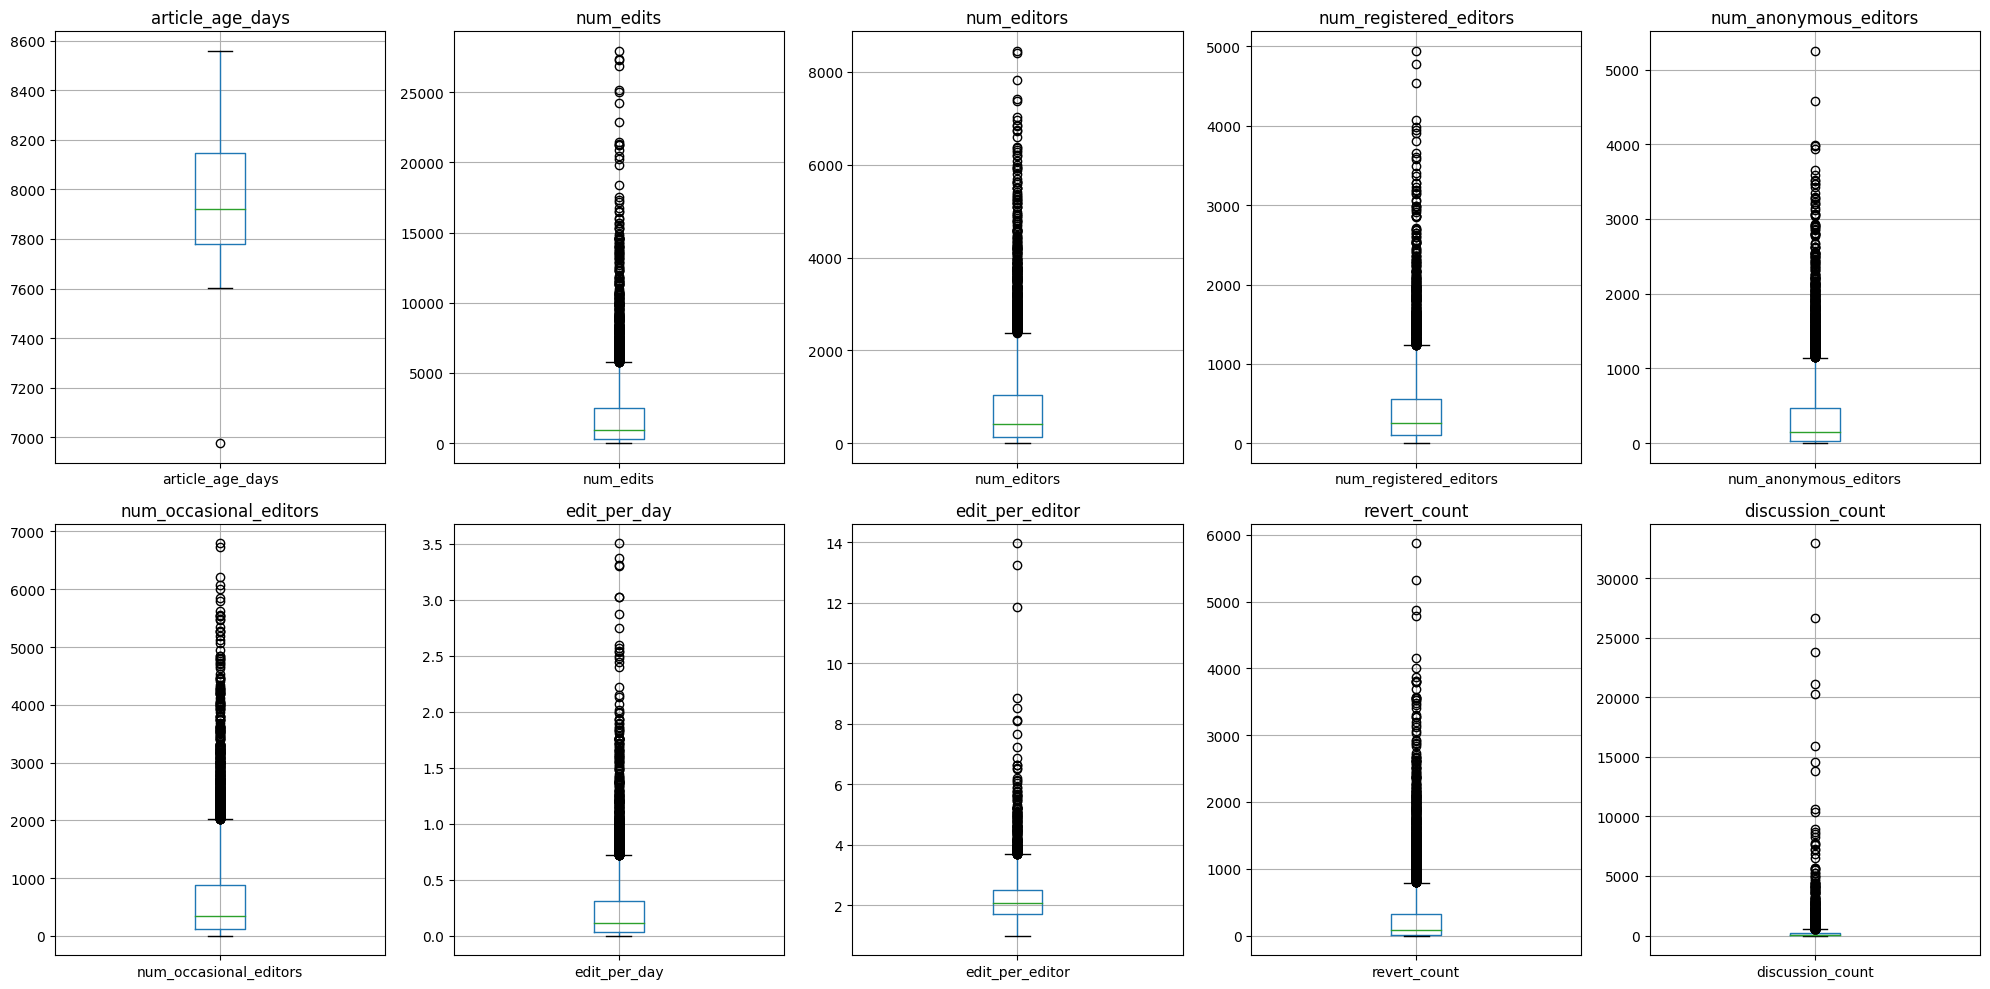

In [150]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10), sharey=False)

axes = axes.flatten()

for i, column in enumerate(df_edit.iloc[:, :-1].columns):
    df_edit.iloc[:, :-1].boxplot(column=column, ax=axes[i])
    axes[i].set_title(column)

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

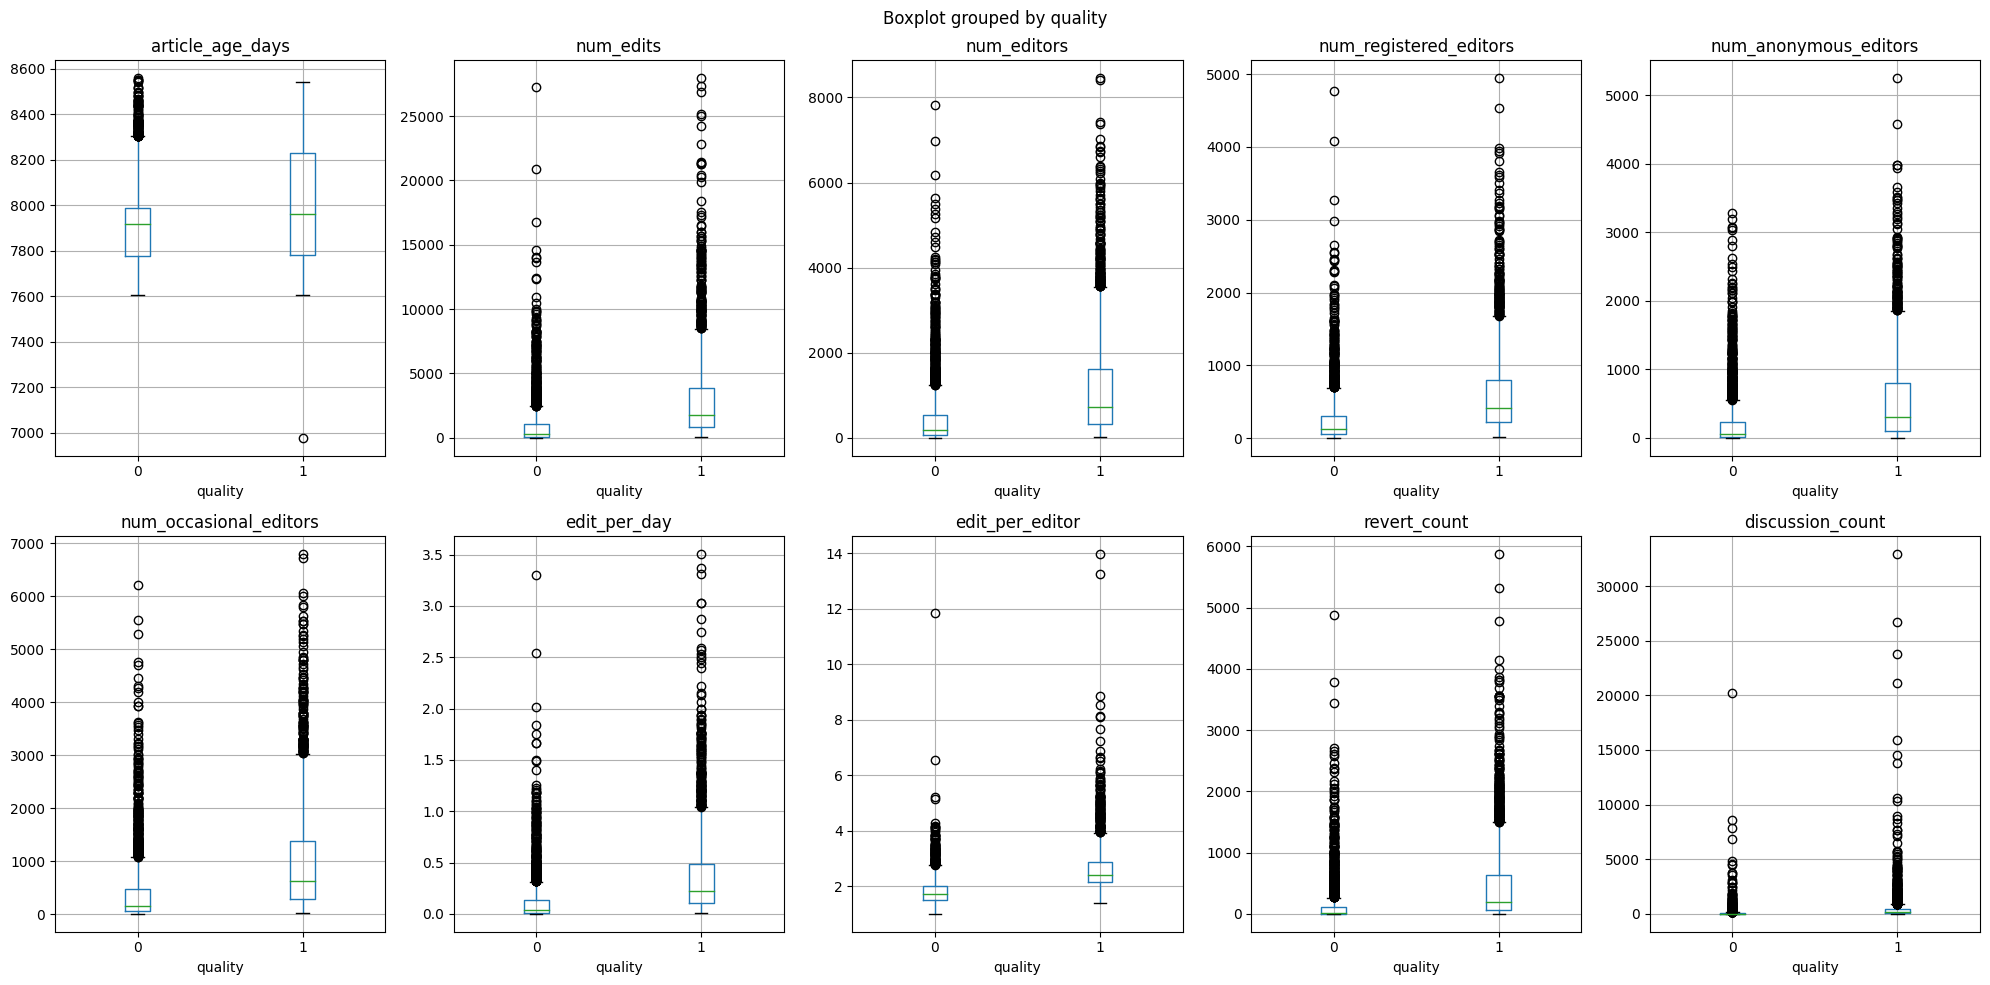

In [151]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10), sharey=False)

axes = axes.flatten()

for i, column in enumerate(df_edit.columns[:-1]):
    df_edit.boxplot(column=column, by='quality', ax=axes[i])
    axes[i].set_title(column)

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()